# Demo: Denoising of 2D simulation images

This notebook showcases the training of an SN2N 2DUnet model for a 2D denoising task using simulated MT data generated by ourselves.

In [1]:
import os
import sys
import numpy as np
from SN2N.datagen import generator2D
from SN2N.get_options import datagen2D

## Simulated data

We created microtubule-like structures by utilizing the insertShape function in MATLAB to draw multiple lines with random orientations. The simulation included the effects of incomplete labeling observed in practical experiments through the application of a small Gaussian mask and elastic deformation, mimicking the curviness of the cytoskeleton. The synthetic structures were convolved with a 150 nm size PSF and downsampled by 2-fold, resulting in 2048 x 2048 pixels with a 32.5 nm pixel size (simulated blurred ground-truth). Finally, the images were contaminated by 40% Poisson-Gaussian noise levels.

<p>
<img src='./imgs/simulation-workflow.png' align="left" width=500>
</p>

## Generating training data for SN2N

We first need to use raw_data to generate SN2N data pairs.  
When generating data pairs, we need to first confirm and <font color="red">set important parameters</font> related to data generation.

-----Parameters------  
<font color="red">=====Important==========</font>  
- <span style="color:blue">img_path:</span>  
    Path of raw images to train.  
- <span style="color:blue">P2Pmode(0 ~ 3):</span>  
    Augmentation mode for Patch2Patch.  
    0: NONE;  
    1: Direct interchange in t;  
    2: Interchange in single frame;  
    3: Interchange in multiple frame but in different regions;  
    {default: 0}  
- <span style="color:blue">P2Pup:</span>  
    Increase the dataset to its (1 + P2Pup) times size.  
    {default: 0}  
- <span style="color:blue">BAmode(0 ~ 2)</span>  
    Basic augmentation mode.  
    0: NONE;  
    1: double the dataset with random rotate&flip;  
    2: eightfold the dataset with random rotate&flip;  
    {default: 0}  
- <span style="color:blue">SWsize</span>  
    Interval pixel of sliding window for generating image pathes.  
    {default: 64}  
    
<font color="red">======Other parameters do not require modification; for details, refer to SN2N.get_options.datagen2D.========</font>  


#### Step 1: Define custom parameters.
We use 50 raw data images for training without basic augmentation and Patch2Patch augmentation to showcase performance.  
There is an ample amount of data, so we did not utilize any augmentation during data generation.

In [2]:
img_path = 'data/raw_data'
P2Pmode = '0'
P2Pup = '0'
BAmode = '0'
SWsize = '64' 


datagen2D_args = [
    '--img_path', img_path,
    '--P2Pmode', P2Pmode,
    '--P2Pup', P2Pup,
    '--BAmode', BAmode,
    '--SWsize', SWsize        
]

args = datagen2D(datagen2D_args)
print("Arguments received:", args)

Arguments received: Namespace(BAmode=0, P2P_patch='64', P2Pmode=0, P2Pup=0, SWfilter=1, SWmode=1, SWsize=64, ifx2=True, img_patch='128', img_path='data/raw_data', inter_mode='Fourier')


#### Step 2: Execute data generation.

The <font color="red">raw data</font> used for generating training data is stored in the <font color="red">'Path:/raw_data'</font> directory, and the generated <font color="red">training data pairs</font> are by default stored in the <font color="red">'Path:/datasets'</font>

In [3]:
d = generator2D(img_path=args.img_path, P2Pmode = args.P2Pmode, P2Pup = args.P2Pup, BAmode = args.BAmode, SWsize = args.SWsize)
d.execute()
print("Data generation completed.")

The path for the raw images used for training is located under:
data/raw_data
The training dataset is being saved under:
data\datasets
For number 1 frame
Saving training images: 100
Saving training images: 200
Saving training images: 300
For number 2 frame
Saving training images: 400
Saving training images: 500
Saving training images: 600
Saving training images: 700
For number 3 frame
Saving training images: 800
Saving training images: 900
Saving training images: 1000
For number 4 frame
Saving training images: 1100
Saving training images: 1200
Saving training images: 1300
Saving training images: 1400
For number 5 frame
Saving training images: 1500
Saving training images: 1600
Saving training images: 1700
For number 6 frame
Saving training images: 1800
Saving training images: 1900
Saving training images: 2000
Saving training images: 2100
For number 7 frame
Saving training images: 2200
Saving training images: 2300
Saving training images: 2400
For number 8 frame
Saving training images: 25

## Show some generated patches

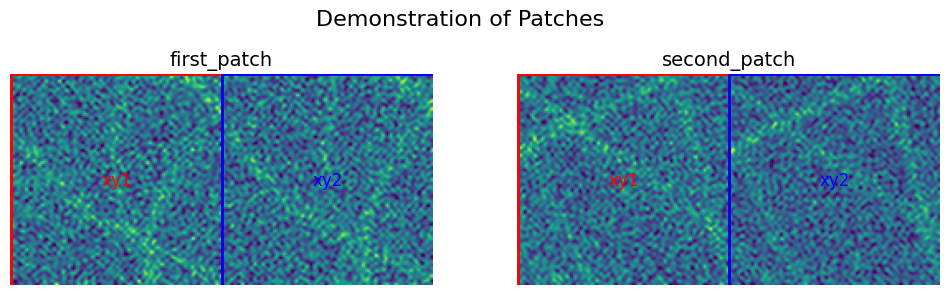

In [4]:
import tifffile
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

dataset_path = d.dataset_path
tif_files = [f for f in os.listdir(dataset_path) if f.endswith('.tif')]
first_patch = tifffile.imread(os.path.join(dataset_path, tif_files[0]))
second_patch = tifffile.imread(os.path.join(dataset_path, tif_files[1]))

fig, axs = plt.subplots(1, 2, figsize=(12, 3.5))


im1 = axs[0].imshow(first_patch)
axs[0].set_title('first_patch', fontsize=14)
axs[0].axis('off') 
axs[0].add_patch(Rectangle((0, 0), first_patch.shape[1] // 2, first_patch.shape[0], linewidth=2, edgecolor='r', facecolor='none'))
axs[0].add_patch(Rectangle((first_patch.shape[1] // 2, 0), first_patch.shape[1] // 2, first_patch.shape[0], linewidth=2, edgecolor='b', facecolor='none'))


axs[0].text(first_patch.shape[1] // 4, first_patch.shape[0] // 2, 'xy1', fontsize=12, color='r', ha='center', va='center')
axs[0].text(3 * first_patch.shape[1] // 4, first_patch.shape[0] // 2, 'xy2', fontsize=12, color='b', ha='center', va='center')


im2 = axs[1].imshow(second_patch)
axs[1].set_title('second_patch', fontsize=14)
axs[1].axis('off') 
axs[1].add_patch(Rectangle((0, 0), second_patch.shape[1] // 2, second_patch.shape[0], linewidth=2, edgecolor='r', facecolor='none'))
axs[1].add_patch(Rectangle((second_patch.shape[1] // 2, 0), second_patch.shape[1] // 2, second_patch.shape[0], linewidth=2, edgecolor='b', facecolor='none'))


axs[1].text(second_patch.shape[1] // 4, second_patch.shape[0] // 2, 'xy1', fontsize=12, color='r', ha='center', va='center')
axs[1].text(3 * second_patch.shape[1] // 4, second_patch.shape[0] // 2, 'xy2', fontsize=12, color='b', ha='center', va='center')


fig.suptitle('Demonstration of Patches', fontsize=16)


plt.show()

## Training data

We need to use training data pairs to train SN2N model.  
When training, we need to first confirm and <font color="red">set important parameters</font> related to trainers.

-----Parameters------  
<font color="red">=====Important==========</font>  
- <span style="color:blue">img_path:</span>  
    Path of raw images to train.  
- <span style="color:blue">sn2n_loss:</span>  
    Weight of self-constrained loss.  
    <span style="color:red">One of the most crucial parameters that needs adjustment， generally set to 0~2.</span>  
    A higher sn2n_loss weight implies relatively better denoising and more pronounced smoothing effects.  
    {default: 1}  
- <span style="color:blue">bs:</span>  
    Training batch size.  
    {default: 32}  
- <span style="color:blue">lr</span>  
    Learning rate.       
    {default: 2e-4}  
- <span style="color:blue">epochs</span>  
    Total number of training epochs.  
    {default: 100}  
    
<font color="red">======Other parameters do not require modification; for details, refer to SN2N.get_options.trainer2D.========</font>  

#### Step 1: Define custom parameters.

In [5]:
from SN2N.trainer import net2D
from SN2N.get_options import trainer2D

img_path = 'data/raw_data'
sn2n_loss = '1'
bs = '32'
lr = '2e-4'
epochs = '50'

trainer2D_args = [
    '--img_path', img_path,
    '--sn2n_loss', sn2n_loss,
    '--bs', bs,
    '--lr', lr,
    '--epochs', epochs
]

args = trainer2D(trainer2D_args)
print("Arguments received:", args)

Arguments received: Namespace(bs=32, epochs=50, if_alr=True, img_patch='128', img_path='data/raw_data', lr=0.0002, sn2n_loss=1.0)


#### Step 2: Execute training.

The <font color="red">raw data</font> used for generating training data is stored in the <font color="red">'Path:/raw_data'</font> directory  
the <font color="red">models</font> are by default stored in the <font color="red">'Path:/models'</font>  
During the training process, we also performed real-time predictions for the first image in the raw_data for each epoch as predicted images. The <font color="red">images</font> results are by default stored in the <font color="red">'Path:/images'</font> directory.

In [6]:
sn2nunet = net2D(img_path = args.img_path, sn2n_loss = args.sn2n_loss, bs = args.bs, lr = args.lr, epochs = args.epochs)
sn2nunet.train()
print("Training completed.")

The path for the raw images used for training is located under:
data/raw_data
The training dataset is being saved under:
data\datasets
Models is being saved under:
data\models
Training temporary prediction images is being saved under:
data\images
[Epoch 0/50] [Batch 0/559] [loss:15.772511] time:0:00:00.450139
[Epoch 0/50] [Batch 1/559] [loss:14.718968] time:0:00:01.086807
[Epoch 0/50] [Batch 2/559] [loss:12.625390] time:0:00:01.674971
[Epoch 0/50] [Batch 3/559] [loss:13.021450] time:0:00:02.291919
[Epoch 0/50] [Batch 4/559] [loss:12.762360] time:0:00:02.920150
[Epoch 0/50] [Batch 5/559] [loss:11.793544] time:0:00:03.563555
[Epoch 0/50] [Batch 6/559] [loss:11.169282] time:0:00:04.173023
[Epoch 0/50] [Batch 7/559] [loss:11.350717] time:0:00:04.862450
[Epoch 0/50] [Batch 8/559] [loss:10.376843] time:0:00:05.447492
[Epoch 0/50] [Batch 9/559] [loss:10.451785] time:0:00:06.035039
[Epoch 0/50] [Batch 10/559] [loss:10.353132] time:0:00:06.654966
[Epoch 0/50] [Batch 11/559] [loss:10.324318] tim

[Epoch 0/50] [Batch 124/559] [loss:8.203698] time:0:01:16.400677
[Epoch 0/50] [Batch 125/559] [loss:8.449174] time:0:01:16.968777
[Epoch 0/50] [Batch 126/559] [loss:8.121014] time:0:01:17.542409
[Epoch 0/50] [Batch 127/559] [loss:7.893894] time:0:01:18.151808
[Epoch 0/50] [Batch 128/559] [loss:8.233788] time:0:01:18.712442
[Epoch 0/50] [Batch 129/559] [loss:8.078274] time:0:01:19.272933
[Epoch 0/50] [Batch 130/559] [loss:8.442502] time:0:01:19.865278
[Epoch 0/50] [Batch 131/559] [loss:8.252033] time:0:01:20.491696
[Epoch 0/50] [Batch 132/559] [loss:7.940423] time:0:01:21.110628
[Epoch 0/50] [Batch 133/559] [loss:8.301378] time:0:01:21.686701
[Epoch 0/50] [Batch 134/559] [loss:8.052719] time:0:01:22.280225
[Epoch 0/50] [Batch 135/559] [loss:8.534806] time:0:01:22.882725
[Epoch 0/50] [Batch 136/559] [loss:8.104348] time:0:01:23.455870
[Epoch 0/50] [Batch 137/559] [loss:7.969542] time:0:01:24.022211
[Epoch 0/50] [Batch 138/559] [loss:8.043644] time:0:01:24.624469
[Epoch 0/50] [Batch 139/5

[Epoch 0/50] [Batch 251/559] [loss:8.105945] time:0:02:32.552219
[Epoch 0/50] [Batch 252/559] [loss:8.093905] time:0:02:33.229957
[Epoch 0/50] [Batch 253/559] [loss:8.651047] time:0:02:33.792077
[Epoch 0/50] [Batch 254/559] [loss:8.178815] time:0:02:34.351356
[Epoch 0/50] [Batch 255/559] [loss:8.074412] time:0:02:34.910390
[Epoch 0/50] [Batch 256/559] [loss:8.079473] time:0:02:35.508389
[Epoch 0/50] [Batch 257/559] [loss:8.007114] time:0:02:36.122231
[Epoch 0/50] [Batch 258/559] [loss:7.945494] time:0:02:36.785536
[Epoch 0/50] [Batch 259/559] [loss:8.652940] time:0:02:37.345359
[Epoch 0/50] [Batch 260/559] [loss:8.230076] time:0:02:37.910278
[Epoch 0/50] [Batch 261/559] [loss:8.289614] time:0:02:38.466417
[Epoch 0/50] [Batch 262/559] [loss:8.884349] time:0:02:39.085724
[Epoch 0/50] [Batch 263/559] [loss:7.822707] time:0:02:39.676130
[Epoch 0/50] [Batch 264/559] [loss:8.687366] time:0:02:40.270888
[Epoch 0/50] [Batch 265/559] [loss:7.766680] time:0:02:40.865898
[Epoch 0/50] [Batch 266/5

[Epoch 0/50] [Batch 378/559] [loss:8.112959] time:0:03:47.224428
[Epoch 0/50] [Batch 379/559] [loss:7.868775] time:0:03:47.857180
[Epoch 0/50] [Batch 380/559] [loss:7.871511] time:0:03:48.462365
[Epoch 0/50] [Batch 381/559] [loss:8.076996] time:0:03:49.065731
[Epoch 0/50] [Batch 382/559] [loss:7.895214] time:0:03:49.685815
[Epoch 0/50] [Batch 383/559] [loss:8.043904] time:0:03:50.287072
[Epoch 0/50] [Batch 384/559] [loss:9.075744] time:0:03:50.904905
[Epoch 0/50] [Batch 385/559] [loss:7.818108] time:0:03:51.511405
[Epoch 0/50] [Batch 386/559] [loss:7.632629] time:0:03:52.112260
[Epoch 0/50] [Batch 387/559] [loss:8.195850] time:0:03:52.732549
[Epoch 0/50] [Batch 388/559] [loss:8.179539] time:0:03:53.328334
[Epoch 0/50] [Batch 389/559] [loss:7.592677] time:0:03:53.944699
[Epoch 0/50] [Batch 390/559] [loss:8.810467] time:0:03:54.566982
[Epoch 0/50] [Batch 391/559] [loss:7.822991] time:0:03:55.160936
[Epoch 0/50] [Batch 392/559] [loss:8.986322] time:0:03:55.777002
[Epoch 0/50] [Batch 393/5

[Epoch 0/50] [Batch 505/559] [loss:8.683338] time:0:05:02.414807
[Epoch 0/50] [Batch 506/559] [loss:8.050180] time:0:05:02.967957
[Epoch 0/50] [Batch 507/559] [loss:7.661813] time:0:05:03.526602
[Epoch 0/50] [Batch 508/559] [loss:8.873149] time:0:05:04.095158
[Epoch 0/50] [Batch 509/559] [loss:7.953257] time:0:05:04.663691
[Epoch 0/50] [Batch 510/559] [loss:8.461937] time:0:05:05.208130
[Epoch 0/50] [Batch 511/559] [loss:7.726722] time:0:05:05.772572
[Epoch 0/50] [Batch 512/559] [loss:7.770453] time:0:05:06.333350
[Epoch 0/50] [Batch 513/559] [loss:8.038787] time:0:05:06.892486
[Epoch 0/50] [Batch 514/559] [loss:7.635950] time:0:05:07.449113
[Epoch 0/50] [Batch 515/559] [loss:8.848488] time:0:05:08.009610
[Epoch 0/50] [Batch 516/559] [loss:7.964031] time:0:05:08.576440
[Epoch 0/50] [Batch 517/559] [loss:8.352236] time:0:05:09.145786
[Epoch 0/50] [Batch 518/559] [loss:7.866177] time:0:05:09.732431
[Epoch 0/50] [Batch 519/559] [loss:8.152405] time:0:05:10.303127
[Epoch 0/50] [Batch 520/5

[Epoch 1/50] [Batch 74/559] [loss:8.425293] time:0:06:27.448039
[Epoch 1/50] [Batch 75/559] [loss:7.971051] time:0:06:28.000904
[Epoch 1/50] [Batch 76/559] [loss:8.094946] time:0:06:28.565648
[Epoch 1/50] [Batch 77/559] [loss:7.633881] time:0:06:29.132666
[Epoch 1/50] [Batch 78/559] [loss:7.837327] time:0:06:29.706247
[Epoch 1/50] [Batch 79/559] [loss:8.142943] time:0:06:30.265633
[Epoch 1/50] [Batch 80/559] [loss:8.294306] time:0:06:30.822851
[Epoch 1/50] [Batch 81/559] [loss:7.517766] time:0:06:31.376490
[Epoch 1/50] [Batch 82/559] [loss:8.080381] time:0:06:31.921692
[Epoch 1/50] [Batch 83/559] [loss:8.382928] time:0:06:32.480833
[Epoch 1/50] [Batch 84/559] [loss:7.793593] time:0:06:33.041596
[Epoch 1/50] [Batch 85/559] [loss:7.479961] time:0:06:33.598733
[Epoch 1/50] [Batch 86/559] [loss:7.568788] time:0:06:34.154113
[Epoch 1/50] [Batch 87/559] [loss:8.383363] time:0:06:34.713739
[Epoch 1/50] [Batch 88/559] [loss:7.684069] time:0:06:35.269877
[Epoch 1/50] [Batch 89/559] [loss:8.4351

[Epoch 1/50] [Batch 201/559] [loss:8.044905] time:0:07:38.627606
[Epoch 1/50] [Batch 202/559] [loss:7.901669] time:0:07:39.215375
[Epoch 1/50] [Batch 203/559] [loss:7.918591] time:0:07:39.800223
[Epoch 1/50] [Batch 204/559] [loss:7.786687] time:0:07:40.385057
[Epoch 1/50] [Batch 205/559] [loss:8.460952] time:0:07:40.965337
[Epoch 1/50] [Batch 206/559] [loss:7.902025] time:0:07:41.563883
[Epoch 1/50] [Batch 207/559] [loss:7.605454] time:0:07:42.147642
[Epoch 1/50] [Batch 208/559] [loss:8.236895] time:0:07:42.753011
[Epoch 1/50] [Batch 209/559] [loss:7.538671] time:0:07:43.339985
[Epoch 1/50] [Batch 210/559] [loss:8.087739] time:0:07:43.935400
[Epoch 1/50] [Batch 211/559] [loss:7.709317] time:0:07:44.533618
[Epoch 1/50] [Batch 212/559] [loss:8.311858] time:0:07:45.129444
[Epoch 1/50] [Batch 213/559] [loss:8.133901] time:0:07:45.712418
[Epoch 1/50] [Batch 214/559] [loss:8.171635] time:0:07:46.301663
[Epoch 1/50] [Batch 215/559] [loss:8.121954] time:0:07:46.887472
[Epoch 1/50] [Batch 216/5

[Epoch 1/50] [Batch 328/559] [loss:7.910838] time:0:08:53.142399
[Epoch 1/50] [Batch 329/559] [loss:8.228241] time:0:08:53.729235
[Epoch 1/50] [Batch 330/559] [loss:8.253472] time:0:08:54.296945
[Epoch 1/50] [Batch 331/559] [loss:8.631316] time:0:08:54.868088
[Epoch 1/50] [Batch 332/559] [loss:7.401910] time:0:08:55.444579
[Epoch 1/50] [Batch 333/559] [loss:8.061524] time:0:08:56.022644
[Epoch 1/50] [Batch 334/559] [loss:7.890015] time:0:08:56.601894
[Epoch 1/50] [Batch 335/559] [loss:7.973764] time:0:08:57.176300
[Epoch 1/50] [Batch 336/559] [loss:8.509903] time:0:08:57.745776
[Epoch 1/50] [Batch 337/559] [loss:8.287036] time:0:08:58.326832
[Epoch 1/50] [Batch 338/559] [loss:8.002359] time:0:08:58.911392
[Epoch 1/50] [Batch 339/559] [loss:7.962451] time:0:08:59.487465
[Epoch 1/50] [Batch 340/559] [loss:7.856319] time:0:09:00.066510
[Epoch 1/50] [Batch 341/559] [loss:7.916421] time:0:09:00.644027
[Epoch 1/50] [Batch 342/559] [loss:7.601994] time:0:09:01.215248
[Epoch 1/50] [Batch 343/5

[Epoch 1/50] [Batch 455/559] [loss:7.906209] time:0:10:05.570025
[Epoch 1/50] [Batch 456/559] [loss:8.544450] time:0:10:06.170727
[Epoch 1/50] [Batch 457/559] [loss:7.804029] time:0:10:06.733358
[Epoch 1/50] [Batch 458/559] [loss:8.435530] time:0:10:07.289468
[Epoch 1/50] [Batch 459/559] [loss:8.039711] time:0:10:07.851872
[Epoch 1/50] [Batch 460/559] [loss:8.034130] time:0:10:08.404223
[Epoch 1/50] [Batch 461/559] [loss:7.275161] time:0:10:08.956695
[Epoch 1/50] [Batch 462/559] [loss:8.009825] time:0:10:09.501871
[Epoch 1/50] [Batch 463/559] [loss:8.547596] time:0:10:10.055212
[Epoch 1/50] [Batch 464/559] [loss:8.018518] time:0:10:10.616192
[Epoch 1/50] [Batch 465/559] [loss:8.368069] time:0:10:11.159354
[Epoch 1/50] [Batch 466/559] [loss:8.106931] time:0:10:11.707520
[Epoch 1/50] [Batch 467/559] [loss:7.524163] time:0:10:12.256431
[Epoch 1/50] [Batch 468/559] [loss:8.015438] time:0:10:12.815560
[Epoch 1/50] [Batch 469/559] [loss:8.441386] time:0:10:13.386649
[Epoch 1/50] [Batch 470/5

[Epoch 2/50] [Batch 23/559] [loss:7.761660] time:0:11:32.151564
[Epoch 2/50] [Batch 24/559] [loss:7.718381] time:0:11:32.751064
[Epoch 2/50] [Batch 25/559] [loss:8.107235] time:0:11:33.327546
[Epoch 2/50] [Batch 26/559] [loss:8.292046] time:0:11:33.924308
[Epoch 2/50] [Batch 27/559] [loss:8.627491] time:0:11:34.504397
[Epoch 2/50] [Batch 28/559] [loss:8.016195] time:0:11:35.076483
[Epoch 2/50] [Batch 29/559] [loss:8.503812] time:0:11:35.676252
[Epoch 2/50] [Batch 30/559] [loss:8.676808] time:0:11:36.253321
[Epoch 2/50] [Batch 31/559] [loss:7.474443] time:0:11:36.836799
[Epoch 2/50] [Batch 32/559] [loss:7.819531] time:0:11:37.410025
[Epoch 2/50] [Batch 33/559] [loss:7.498944] time:0:11:37.990906
[Epoch 2/50] [Batch 34/559] [loss:7.535309] time:0:11:38.568629
[Epoch 2/50] [Batch 35/559] [loss:7.728367] time:0:11:39.151302
[Epoch 2/50] [Batch 36/559] [loss:8.133148] time:0:11:39.739901
[Epoch 2/50] [Batch 37/559] [loss:7.927784] time:0:11:40.316043
[Epoch 2/50] [Batch 38/559] [loss:7.8050

[Epoch 2/50] [Batch 151/559] [loss:7.720285] time:0:12:46.478264
[Epoch 2/50] [Batch 152/559] [loss:7.693012] time:0:12:47.046094
[Epoch 2/50] [Batch 153/559] [loss:7.829890] time:0:12:47.635127
[Epoch 2/50] [Batch 154/559] [loss:8.336405] time:0:12:48.209695
[Epoch 2/50] [Batch 155/559] [loss:8.193103] time:0:12:48.786764
[Epoch 2/50] [Batch 156/559] [loss:7.714023] time:0:12:49.348202
[Epoch 2/50] [Batch 157/559] [loss:7.786933] time:0:12:49.924160
[Epoch 2/50] [Batch 158/559] [loss:7.443999] time:0:12:50.485545
[Epoch 2/50] [Batch 159/559] [loss:8.670814] time:0:12:51.055121
[Epoch 2/50] [Batch 160/559] [loss:7.510995] time:0:12:51.640845
[Epoch 2/50] [Batch 161/559] [loss:8.569387] time:0:12:52.220103
[Epoch 2/50] [Batch 162/559] [loss:7.741905] time:0:12:52.813667
[Epoch 2/50] [Batch 163/559] [loss:7.884178] time:0:12:53.386548
[Epoch 2/50] [Batch 164/559] [loss:8.148152] time:0:12:53.979567
[Epoch 2/50] [Batch 165/559] [loss:7.534390] time:0:12:54.561622
[Epoch 2/50] [Batch 166/5

[Epoch 2/50] [Batch 278/559] [loss:8.232871] time:0:13:59.454728
[Epoch 2/50] [Batch 279/559] [loss:7.765563] time:0:14:00.030847
[Epoch 2/50] [Batch 280/559] [loss:7.989458] time:0:14:00.585587
[Epoch 2/50] [Batch 281/559] [loss:7.586741] time:0:14:01.131399
[Epoch 2/50] [Batch 282/559] [loss:7.888969] time:0:14:01.708589
[Epoch 2/50] [Batch 283/559] [loss:8.213142] time:0:14:02.266280
[Epoch 2/50] [Batch 284/559] [loss:8.201042] time:0:14:02.841307
[Epoch 2/50] [Batch 285/559] [loss:8.038852] time:0:14:03.400847
[Epoch 2/50] [Batch 286/559] [loss:8.091691] time:0:14:03.979820
[Epoch 2/50] [Batch 287/559] [loss:7.990820] time:0:14:04.547259
[Epoch 2/50] [Batch 288/559] [loss:7.558776] time:0:14:05.105880
[Epoch 2/50] [Batch 289/559] [loss:8.275426] time:0:14:05.703419
[Epoch 2/50] [Batch 290/559] [loss:7.707237] time:0:14:06.259237
[Epoch 2/50] [Batch 291/559] [loss:8.787930] time:0:14:06.831732
[Epoch 2/50] [Batch 292/559] [loss:7.704886] time:0:14:07.388770
[Epoch 2/50] [Batch 293/5

[Epoch 2/50] [Batch 405/559] [loss:7.432824] time:0:15:10.690319
[Epoch 2/50] [Batch 406/559] [loss:7.919765] time:0:15:11.235572
[Epoch 2/50] [Batch 407/559] [loss:7.426689] time:0:15:11.787186
[Epoch 2/50] [Batch 408/559] [loss:8.448289] time:0:15:12.356310
[Epoch 2/50] [Batch 409/559] [loss:8.450409] time:0:15:12.919426
[Epoch 2/50] [Batch 410/559] [loss:7.658556] time:0:15:13.469560
[Epoch 2/50] [Batch 411/559] [loss:7.820451] time:0:15:14.025732
[Epoch 2/50] [Batch 412/559] [loss:7.664556] time:0:15:14.567030
[Epoch 2/50] [Batch 413/559] [loss:8.031493] time:0:15:15.114254
[Epoch 2/50] [Batch 414/559] [loss:8.097075] time:0:15:15.658674
[Epoch 2/50] [Batch 415/559] [loss:8.041253] time:0:15:16.210360
[Epoch 2/50] [Batch 416/559] [loss:7.360853] time:0:15:16.769279
[Epoch 2/50] [Batch 417/559] [loss:8.570793] time:0:15:17.328408
[Epoch 2/50] [Batch 418/559] [loss:8.359817] time:0:15:17.888674
[Epoch 2/50] [Batch 419/559] [loss:7.980397] time:0:15:18.456773
[Epoch 2/50] [Batch 420/5

[Epoch 2/50] [Batch 532/559] [loss:8.120444] time:0:16:21.146151
[Epoch 2/50] [Batch 533/559] [loss:7.506833] time:0:16:21.691327
[Epoch 2/50] [Batch 534/559] [loss:8.276428] time:0:16:22.252463
[Epoch 2/50] [Batch 535/559] [loss:8.241088] time:0:16:22.808736
[Epoch 2/50] [Batch 536/559] [loss:7.960964] time:0:16:23.369301
[Epoch 2/50] [Batch 537/559] [loss:8.583590] time:0:16:23.915923
[Epoch 2/50] [Batch 538/559] [loss:7.624280] time:0:16:24.469062
[Epoch 2/50] [Batch 539/559] [loss:7.915659] time:0:16:25.015957
[Epoch 2/50] [Batch 540/559] [loss:8.147965] time:0:16:25.558723
[Epoch 2/50] [Batch 541/559] [loss:8.102044] time:0:16:26.111850
[Epoch 2/50] [Batch 542/559] [loss:7.510603] time:0:16:26.659569
[Epoch 2/50] [Batch 543/559] [loss:7.891942] time:0:16:27.212957
[Epoch 2/50] [Batch 544/559] [loss:7.737317] time:0:16:27.759630
[Epoch 2/50] [Batch 545/559] [loss:7.931226] time:0:16:28.314772
[Epoch 2/50] [Batch 546/559] [loss:7.875360] time:0:16:28.878959
[Epoch 2/50] [Batch 547/5

[Epoch 3/50] [Batch 101/559] [loss:8.203595] time:0:17:42.152103
[Epoch 3/50] [Batch 102/559] [loss:7.558199] time:0:17:42.674674
[Epoch 3/50] [Batch 103/559] [loss:8.235176] time:0:17:43.200422
[Epoch 3/50] [Batch 104/559] [loss:8.383683] time:0:17:43.731821
[Epoch 3/50] [Batch 105/559] [loss:7.539138] time:0:17:44.270216
[Epoch 3/50] [Batch 106/559] [loss:8.332951] time:0:17:44.793308
[Epoch 3/50] [Batch 107/559] [loss:7.653163] time:0:17:45.331743
[Epoch 3/50] [Batch 108/559] [loss:7.802831] time:0:17:45.864520
[Epoch 3/50] [Batch 109/559] [loss:8.145404] time:0:17:46.395484
[Epoch 3/50] [Batch 110/559] [loss:8.280746] time:0:17:46.920183
[Epoch 3/50] [Batch 111/559] [loss:7.811407] time:0:17:47.450850
[Epoch 3/50] [Batch 112/559] [loss:7.666325] time:0:17:47.970171
[Epoch 3/50] [Batch 113/559] [loss:7.318779] time:0:17:48.507806
[Epoch 3/50] [Batch 114/559] [loss:7.826892] time:0:17:49.024934
[Epoch 3/50] [Batch 115/559] [loss:8.060681] time:0:17:49.556044
[Epoch 3/50] [Batch 116/5

[Epoch 3/50] [Batch 228/559] [loss:7.994694] time:0:18:49.439542
[Epoch 3/50] [Batch 229/559] [loss:7.923315] time:0:18:49.972968
[Epoch 3/50] [Batch 230/559] [loss:7.821845] time:0:18:50.500720
[Epoch 3/50] [Batch 231/559] [loss:7.994256] time:0:18:51.038579
[Epoch 3/50] [Batch 232/559] [loss:8.415088] time:0:18:51.577313
[Epoch 3/50] [Batch 233/559] [loss:7.355333] time:0:18:52.112724
[Epoch 3/50] [Batch 234/559] [loss:8.464507] time:0:18:52.638761
[Epoch 3/50] [Batch 235/559] [loss:8.195031] time:0:18:53.164975
[Epoch 3/50] [Batch 236/559] [loss:8.846939] time:0:18:53.691676
[Epoch 3/50] [Batch 237/559] [loss:8.099054] time:0:18:54.226302
[Epoch 3/50] [Batch 238/559] [loss:8.204579] time:0:18:54.753491
[Epoch 3/50] [Batch 239/559] [loss:7.909564] time:0:18:55.278140
[Epoch 3/50] [Batch 240/559] [loss:8.369601] time:0:18:55.806884
[Epoch 3/50] [Batch 241/559] [loss:8.108047] time:0:18:56.332152
[Epoch 3/50] [Batch 242/559] [loss:8.019757] time:0:18:56.859953
[Epoch 3/50] [Batch 243/5

[Epoch 3/50] [Batch 355/559] [loss:7.891922] time:0:19:56.854895
[Epoch 3/50] [Batch 356/559] [loss:8.743700] time:0:19:57.384213
[Epoch 3/50] [Batch 357/559] [loss:8.545425] time:0:19:57.904877
[Epoch 3/50] [Batch 358/559] [loss:7.917678] time:0:19:58.439523
[Epoch 3/50] [Batch 359/559] [loss:8.006250] time:0:19:58.972491
[Epoch 3/50] [Batch 360/559] [loss:7.944207] time:0:19:59.507947
[Epoch 3/50] [Batch 361/559] [loss:8.143394] time:0:20:00.032297
[Epoch 3/50] [Batch 362/559] [loss:8.462574] time:0:20:00.565084
[Epoch 3/50] [Batch 363/559] [loss:8.239599] time:0:20:01.094320
[Epoch 3/50] [Batch 364/559] [loss:8.299422] time:0:20:01.631034
[Epoch 3/50] [Batch 365/559] [loss:7.956430] time:0:20:02.160355
[Epoch 3/50] [Batch 366/559] [loss:8.234423] time:0:20:02.691577
[Epoch 3/50] [Batch 367/559] [loss:8.085229] time:0:20:03.225790
[Epoch 3/50] [Batch 368/559] [loss:8.563969] time:0:20:03.753029
[Epoch 3/50] [Batch 369/559] [loss:7.695061] time:0:20:04.274918
[Epoch 3/50] [Batch 370/5

[Epoch 3/50] [Batch 482/559] [loss:7.571780] time:0:21:04.047000
[Epoch 3/50] [Batch 483/559] [loss:8.552530] time:0:21:04.571256
[Epoch 3/50] [Batch 484/559] [loss:7.560919] time:0:21:05.100722
[Epoch 3/50] [Batch 485/559] [loss:8.165250] time:0:21:05.621697
[Epoch 3/50] [Batch 486/559] [loss:7.881013] time:0:21:06.142866
[Epoch 3/50] [Batch 487/559] [loss:7.684918] time:0:21:06.663128
[Epoch 3/50] [Batch 488/559] [loss:8.110697] time:0:21:07.192159
[Epoch 3/50] [Batch 489/559] [loss:8.534538] time:0:21:07.725881
[Epoch 3/50] [Batch 490/559] [loss:8.264508] time:0:21:08.255530
[Epoch 3/50] [Batch 491/559] [loss:8.447447] time:0:21:08.774793
[Epoch 3/50] [Batch 492/559] [loss:8.365756] time:0:21:09.301811
[Epoch 3/50] [Batch 493/559] [loss:7.879204] time:0:21:09.830251
[Epoch 3/50] [Batch 494/559] [loss:7.481883] time:0:21:10.358101
[Epoch 3/50] [Batch 495/559] [loss:8.149861] time:0:21:10.887827
[Epoch 3/50] [Batch 496/559] [loss:7.457050] time:0:21:11.420551
[Epoch 3/50] [Batch 497/5

[Epoch 4/50] [Batch 50/559] [loss:8.219319] time:0:22:23.718547
[Epoch 4/50] [Batch 51/559] [loss:8.394063] time:0:22:24.250277
[Epoch 4/50] [Batch 52/559] [loss:7.992138] time:0:22:24.782012
[Epoch 4/50] [Batch 53/559] [loss:8.727997] time:0:22:25.308865
[Epoch 4/50] [Batch 54/559] [loss:7.832666] time:0:22:25.834121
[Epoch 4/50] [Batch 55/559] [loss:7.971587] time:0:22:26.358533
[Epoch 4/50] [Batch 56/559] [loss:7.513669] time:0:22:26.890233
[Epoch 4/50] [Batch 57/559] [loss:8.329620] time:0:22:27.412245
[Epoch 4/50] [Batch 58/559] [loss:7.723706] time:0:22:27.931107
[Epoch 4/50] [Batch 59/559] [loss:8.067728] time:0:22:28.453644
[Epoch 4/50] [Batch 60/559] [loss:8.513039] time:0:22:28.987692
[Epoch 4/50] [Batch 61/559] [loss:7.690915] time:0:22:29.513741
[Epoch 4/50] [Batch 62/559] [loss:8.725218] time:0:22:30.032907
[Epoch 4/50] [Batch 63/559] [loss:8.549070] time:0:22:30.563432
[Epoch 4/50] [Batch 64/559] [loss:7.532103] time:0:22:31.088343
[Epoch 4/50] [Batch 65/559] [loss:7.7764

[Epoch 4/50] [Batch 177/559] [loss:8.051018] time:0:23:30.598299
[Epoch 4/50] [Batch 178/559] [loss:7.620911] time:0:23:31.120089
[Epoch 4/50] [Batch 179/559] [loss:7.442398] time:0:23:31.652312
[Epoch 4/50] [Batch 180/559] [loss:7.526493] time:0:23:32.178552
[Epoch 4/50] [Batch 181/559] [loss:8.683477] time:0:23:32.712033
[Epoch 4/50] [Batch 182/559] [loss:7.859040] time:0:23:33.240269
[Epoch 4/50] [Batch 183/559] [loss:8.061097] time:0:23:33.765599
[Epoch 4/50] [Batch 184/559] [loss:8.314643] time:0:23:34.304263
[Epoch 4/50] [Batch 185/559] [loss:7.456719] time:0:23:34.836482
[Epoch 4/50] [Batch 186/559] [loss:8.333985] time:0:23:35.362800
[Epoch 4/50] [Batch 187/559] [loss:7.995947] time:0:23:35.892534
[Epoch 4/50] [Batch 188/559] [loss:8.272870] time:0:23:36.419089
[Epoch 4/50] [Batch 189/559] [loss:7.435180] time:0:23:36.947951
[Epoch 4/50] [Batch 190/559] [loss:8.624256] time:0:23:37.473477
[Epoch 4/50] [Batch 191/559] [loss:7.764970] time:0:23:38.002939
[Epoch 4/50] [Batch 192/5

[Epoch 4/50] [Batch 304/559] [loss:7.609829] time:0:24:37.599547
[Epoch 4/50] [Batch 305/559] [loss:7.905772] time:0:24:38.137622
[Epoch 4/50] [Batch 306/559] [loss:8.427124] time:0:24:38.662898
[Epoch 4/50] [Batch 307/559] [loss:8.207202] time:0:24:39.192128
[Epoch 4/50] [Batch 308/559] [loss:7.587287] time:0:24:39.722476
[Epoch 4/50] [Batch 309/559] [loss:8.446474] time:0:24:40.255179
[Epoch 4/50] [Batch 310/559] [loss:8.269615] time:0:24:40.784396
[Epoch 4/50] [Batch 311/559] [loss:7.946575] time:0:24:41.312137
[Epoch 4/50] [Batch 312/559] [loss:7.666418] time:0:24:41.843363
[Epoch 4/50] [Batch 313/559] [loss:7.870882] time:0:24:42.366118
[Epoch 4/50] [Batch 314/559] [loss:7.398687] time:0:24:42.892902
[Epoch 4/50] [Batch 315/559] [loss:8.262154] time:0:24:43.415140
[Epoch 4/50] [Batch 316/559] [loss:8.330885] time:0:24:43.941223
[Epoch 4/50] [Batch 317/559] [loss:7.894821] time:0:24:44.468962
[Epoch 4/50] [Batch 318/559] [loss:7.713477] time:0:24:45.004608
[Epoch 4/50] [Batch 319/5

[Epoch 4/50] [Batch 431/559] [loss:7.679331] time:0:25:44.726405
[Epoch 4/50] [Batch 432/559] [loss:8.137157] time:0:25:45.255219
[Epoch 4/50] [Batch 433/559] [loss:8.032427] time:0:25:45.785770
[Epoch 4/50] [Batch 434/559] [loss:8.630940] time:0:25:46.320778
[Epoch 4/50] [Batch 435/559] [loss:7.964874] time:0:25:46.852206
[Epoch 4/50] [Batch 436/559] [loss:7.806390] time:0:25:47.381854
[Epoch 4/50] [Batch 437/559] [loss:8.021265] time:0:25:47.909946
[Epoch 4/50] [Batch 438/559] [loss:7.391601] time:0:25:48.447409
[Epoch 4/50] [Batch 439/559] [loss:7.605866] time:0:25:48.979329
[Epoch 4/50] [Batch 440/559] [loss:7.667608] time:0:25:49.508038
[Epoch 4/50] [Batch 441/559] [loss:8.705882] time:0:25:50.038412
[Epoch 4/50] [Batch 442/559] [loss:7.436369] time:0:25:50.563392
[Epoch 4/50] [Batch 443/559] [loss:8.205000] time:0:25:51.099862
[Epoch 4/50] [Batch 444/559] [loss:7.665206] time:0:25:51.629796
[Epoch 4/50] [Batch 445/559] [loss:7.984825] time:0:25:52.166002
[Epoch 4/50] [Batch 446/5

[Epoch 4/50] [Batch 558/559] [loss:7.895876] time:0:26:51.845353
[Epoch 5/50] [Batch 0/559] [loss:8.210481] time:0:27:05.115181
[Epoch 5/50] [Batch 1/559] [loss:7.124043] time:0:27:05.653221
[Epoch 5/50] [Batch 2/559] [loss:7.509030] time:0:27:06.176973
[Epoch 5/50] [Batch 3/559] [loss:7.458330] time:0:27:06.698191
[Epoch 5/50] [Batch 4/559] [loss:7.616273] time:0:27:07.220349
[Epoch 5/50] [Batch 5/559] [loss:7.180188] time:0:27:07.751922
[Epoch 5/50] [Batch 6/559] [loss:7.506787] time:0:27:08.282231
[Epoch 5/50] [Batch 7/559] [loss:7.817464] time:0:27:08.813454
[Epoch 5/50] [Batch 8/559] [loss:7.920309] time:0:27:09.345058
[Epoch 5/50] [Batch 9/559] [loss:7.422663] time:0:27:09.877552
[Epoch 5/50] [Batch 10/559] [loss:7.433719] time:0:27:10.409771
[Epoch 5/50] [Batch 11/559] [loss:7.946717] time:0:27:10.943504
[Epoch 5/50] [Batch 12/559] [loss:8.234091] time:0:27:11.466170
[Epoch 5/50] [Batch 13/559] [loss:7.309818] time:0:27:11.997393
[Epoch 5/50] [Batch 14/559] [loss:8.068231] time:

[Epoch 5/50] [Batch 127/559] [loss:7.755963] time:0:28:12.143050
[Epoch 5/50] [Batch 128/559] [loss:8.074623] time:0:28:12.668797
[Epoch 5/50] [Batch 129/559] [loss:8.611777] time:0:28:13.197030
[Epoch 5/50] [Batch 130/559] [loss:8.150364] time:0:28:13.728026
[Epoch 5/50] [Batch 131/559] [loss:8.076288] time:0:28:14.251840
[Epoch 5/50] [Batch 132/559] [loss:7.768106] time:0:28:14.778349
[Epoch 5/50] [Batch 133/559] [loss:8.288782] time:0:28:15.309572
[Epoch 5/50] [Batch 134/559] [loss:8.003335] time:0:28:15.835235
[Epoch 5/50] [Batch 135/559] [loss:7.887443] time:0:28:16.361474
[Epoch 5/50] [Batch 136/559] [loss:8.255436] time:0:28:16.895687
[Epoch 5/50] [Batch 137/559] [loss:7.967858] time:0:28:17.426651
[Epoch 5/50] [Batch 138/559] [loss:7.647358] time:0:28:17.958268
[Epoch 5/50] [Batch 139/559] [loss:7.598699] time:0:28:18.481517
[Epoch 5/50] [Batch 140/559] [loss:8.148400] time:0:28:19.004968
[Epoch 5/50] [Batch 141/559] [loss:7.697178] time:0:28:19.536359
[Epoch 5/50] [Batch 142/5

[Epoch 5/50] [Batch 254/559] [loss:7.632852] time:0:29:19.163077
[Epoch 5/50] [Batch 255/559] [loss:7.825110] time:0:29:19.686310
[Epoch 5/50] [Batch 256/559] [loss:8.161605] time:0:29:20.209478
[Epoch 5/50] [Batch 257/559] [loss:8.104303] time:0:29:20.733724
[Epoch 5/50] [Batch 258/559] [loss:7.789481] time:0:29:21.262706
[Epoch 5/50] [Batch 259/559] [loss:7.572792] time:0:29:21.792192
[Epoch 5/50] [Batch 260/559] [loss:8.503123] time:0:29:22.315897
[Epoch 5/50] [Batch 261/559] [loss:8.136466] time:0:29:22.838154
[Epoch 5/50] [Batch 262/559] [loss:8.198193] time:0:29:23.364260
[Epoch 5/50] [Batch 263/559] [loss:8.047185] time:0:29:23.891614
[Epoch 5/50] [Batch 264/559] [loss:7.912685] time:0:29:24.419656
[Epoch 5/50] [Batch 265/559] [loss:7.987774] time:0:29:24.949798
[Epoch 5/50] [Batch 266/559] [loss:7.674289] time:0:29:25.479102
[Epoch 5/50] [Batch 267/559] [loss:8.107908] time:0:29:26.001401
[Epoch 5/50] [Batch 268/559] [loss:7.486809] time:0:29:26.526678
[Epoch 5/50] [Batch 269/5

[Epoch 5/50] [Batch 381/559] [loss:9.036475] time:0:30:26.093882
[Epoch 5/50] [Batch 382/559] [loss:8.027235] time:0:30:26.624320
[Epoch 5/50] [Batch 383/559] [loss:7.739119] time:0:30:27.145573
[Epoch 5/50] [Batch 384/559] [loss:8.073293] time:0:30:27.672733
[Epoch 5/50] [Batch 385/559] [loss:7.646174] time:0:30:28.190002
[Epoch 5/50] [Batch 386/559] [loss:8.147082] time:0:30:28.720897
[Epoch 5/50] [Batch 387/559] [loss:7.431298] time:0:30:29.254495
[Epoch 5/50] [Batch 388/559] [loss:8.216938] time:0:30:29.789825
[Epoch 5/50] [Batch 389/559] [loss:8.398297] time:0:30:30.316649
[Epoch 5/50] [Batch 390/559] [loss:8.231033] time:0:30:30.840085
[Epoch 5/50] [Batch 391/559] [loss:7.662752] time:0:30:31.371446
[Epoch 5/50] [Batch 392/559] [loss:8.035585] time:0:30:31.895692
[Epoch 5/50] [Batch 393/559] [loss:7.690934] time:0:30:32.428053
[Epoch 5/50] [Batch 394/559] [loss:7.545862] time:0:30:32.956501
[Epoch 5/50] [Batch 395/559] [loss:8.020020] time:0:30:33.484242
[Epoch 5/50] [Batch 396/5

[Epoch 5/50] [Batch 508/559] [loss:8.048990] time:0:31:33.008879
[Epoch 5/50] [Batch 509/559] [loss:8.206753] time:0:31:33.534664
[Epoch 5/50] [Batch 510/559] [loss:7.580506] time:0:31:34.064430
[Epoch 5/50] [Batch 511/559] [loss:7.998819] time:0:31:34.593805
[Epoch 5/50] [Batch 512/559] [loss:7.761180] time:0:31:35.124701
[Epoch 5/50] [Batch 513/559] [loss:7.606397] time:0:31:35.656360
[Epoch 5/50] [Batch 514/559] [loss:8.475233] time:0:31:36.186586
[Epoch 5/50] [Batch 515/559] [loss:8.729474] time:0:31:36.708869
[Epoch 5/50] [Batch 516/559] [loss:7.655419] time:0:31:37.231769
[Epoch 5/50] [Batch 517/559] [loss:7.896733] time:0:31:37.761115
[Epoch 5/50] [Batch 518/559] [loss:8.025999] time:0:31:38.279439
[Epoch 5/50] [Batch 519/559] [loss:8.797741] time:0:31:38.803765
[Epoch 5/50] [Batch 520/559] [loss:8.026721] time:0:31:39.324972
[Epoch 5/50] [Batch 521/559] [loss:8.383396] time:0:31:39.853802
[Epoch 5/50] [Batch 522/559] [loss:7.967676] time:0:31:40.376399
[Epoch 5/50] [Batch 523/5

[Epoch 6/50] [Batch 77/559] [loss:8.304220] time:0:32:53.236051
[Epoch 6/50] [Batch 78/559] [loss:8.059662] time:0:32:53.769858
[Epoch 6/50] [Batch 79/559] [loss:8.453593] time:0:32:54.298414
[Epoch 6/50] [Batch 80/559] [loss:7.757602] time:0:32:54.827007
[Epoch 6/50] [Batch 81/559] [loss:7.386243] time:0:32:55.356237
[Epoch 6/50] [Batch 82/559] [loss:7.903927] time:0:32:55.879842
[Epoch 6/50] [Batch 83/559] [loss:7.355750] time:0:32:56.401597
[Epoch 6/50] [Batch 84/559] [loss:8.697296] time:0:32:56.923850
[Epoch 6/50] [Batch 85/559] [loss:8.374736] time:0:32:57.452649
[Epoch 6/50] [Batch 86/559] [loss:7.764836] time:0:32:57.987226
[Epoch 6/50] [Batch 87/559] [loss:7.963102] time:0:32:58.521878
[Epoch 6/50] [Batch 88/559] [loss:8.150686] time:0:32:59.055094
[Epoch 6/50] [Batch 89/559] [loss:8.167959] time:0:32:59.585153
[Epoch 6/50] [Batch 90/559] [loss:8.310492] time:0:33:00.110467
[Epoch 6/50] [Batch 91/559] [loss:7.985464] time:0:33:00.642639
[Epoch 6/50] [Batch 92/559] [loss:7.8355

[Epoch 6/50] [Batch 204/559] [loss:7.849717] time:0:34:00.592274
[Epoch 6/50] [Batch 205/559] [loss:8.081370] time:0:34:01.115933
[Epoch 6/50] [Batch 206/559] [loss:8.515508] time:0:34:01.636193
[Epoch 6/50] [Batch 207/559] [loss:8.120423] time:0:34:02.163434
[Epoch 6/50] [Batch 208/559] [loss:7.672698] time:0:34:02.683472
[Epoch 6/50] [Batch 209/559] [loss:7.985916] time:0:34:03.208715
[Epoch 6/50] [Batch 210/559] [loss:8.006323] time:0:34:03.733092
[Epoch 6/50] [Batch 211/559] [loss:8.072847] time:0:34:04.258245
[Epoch 6/50] [Batch 212/559] [loss:8.037577] time:0:34:04.785986
[Epoch 6/50] [Batch 213/559] [loss:7.969303] time:0:34:05.309037
[Epoch 6/50] [Batch 214/559] [loss:7.927895] time:0:34:05.826384
[Epoch 6/50] [Batch 215/559] [loss:7.819207] time:0:34:06.348410
[Epoch 6/50] [Batch 216/559] [loss:7.610725] time:0:34:06.868906
[Epoch 6/50] [Batch 217/559] [loss:7.925583] time:0:34:07.396495
[Epoch 6/50] [Batch 218/559] [loss:7.401597] time:0:34:07.924755
[Epoch 6/50] [Batch 219/5

[Epoch 6/50] [Batch 331/559] [loss:8.269414] time:0:35:07.642743
[Epoch 6/50] [Batch 332/559] [loss:8.130128] time:0:35:08.174396
[Epoch 6/50] [Batch 333/559] [loss:7.892757] time:0:35:08.693659
[Epoch 6/50] [Batch 334/559] [loss:7.780465] time:0:35:09.217516
[Epoch 6/50] [Batch 335/559] [loss:7.623004] time:0:35:09.744974
[Epoch 6/50] [Batch 336/559] [loss:7.787056] time:0:35:10.266230
[Epoch 6/50] [Batch 337/559] [loss:7.520042] time:0:35:10.802689
[Epoch 6/50] [Batch 338/559] [loss:7.331143] time:0:35:11.329553
[Epoch 6/50] [Batch 339/559] [loss:7.788442] time:0:35:11.861824
[Epoch 6/50] [Batch 340/559] [loss:7.790194] time:0:35:12.396019
[Epoch 6/50] [Batch 341/559] [loss:7.280458] time:0:35:12.920269
[Epoch 6/50] [Batch 342/559] [loss:8.503318] time:0:35:13.443510
[Epoch 6/50] [Batch 343/559] [loss:7.931808] time:0:35:13.965763
[Epoch 6/50] [Batch 344/559] [loss:8.067696] time:0:35:14.480042
[Epoch 6/50] [Batch 345/559] [loss:8.109793] time:0:35:15.003602
[Epoch 6/50] [Batch 346/5

[Epoch 6/50] [Batch 458/559] [loss:7.885628] time:0:36:14.637715
[Epoch 6/50] [Batch 459/559] [loss:8.327166] time:0:36:15.166452
[Epoch 6/50] [Batch 460/559] [loss:7.482740] time:0:36:15.692990
[Epoch 6/50] [Batch 461/559] [loss:7.445346] time:0:36:16.222227
[Epoch 6/50] [Batch 462/559] [loss:8.592526] time:0:36:16.751456
[Epoch 6/50] [Batch 463/559] [loss:7.272664] time:0:36:17.276773
[Epoch 6/50] [Batch 464/559] [loss:7.943467] time:0:36:17.809669
[Epoch 6/50] [Batch 465/559] [loss:7.662644] time:0:36:18.330925
[Epoch 6/50] [Batch 466/559] [loss:8.784156] time:0:36:18.859614
[Epoch 6/50] [Batch 467/559] [loss:8.238647] time:0:36:19.393744
[Epoch 6/50] [Batch 468/559] [loss:8.147644] time:0:36:19.920980
[Epoch 6/50] [Batch 469/559] [loss:7.868288] time:0:36:20.460209
[Epoch 6/50] [Batch 470/559] [loss:7.652471] time:0:36:20.984677
[Epoch 6/50] [Batch 471/559] [loss:7.739881] time:0:36:21.519505
[Epoch 6/50] [Batch 472/559] [loss:8.152780] time:0:36:22.048766
[Epoch 6/50] [Batch 473/5

[Epoch 7/50] [Batch 26/559] [loss:7.544639] time:0:37:34.529530
[Epoch 7/50] [Batch 27/559] [loss:8.017731] time:0:37:35.058148
[Epoch 7/50] [Batch 28/559] [loss:7.332499] time:0:37:35.579909
[Epoch 7/50] [Batch 29/559] [loss:7.752166] time:0:37:36.104940
[Epoch 7/50] [Batch 30/559] [loss:8.529509] time:0:37:36.630359
[Epoch 7/50] [Batch 31/559] [loss:8.207697] time:0:37:37.153802
[Epoch 7/50] [Batch 32/559] [loss:8.596034] time:0:37:37.682794
[Epoch 7/50] [Batch 33/559] [loss:7.192054] time:0:37:38.203265
[Epoch 7/50] [Batch 34/559] [loss:7.849693] time:0:37:38.736987
[Epoch 7/50] [Batch 35/559] [loss:7.951298] time:0:37:39.261368
[Epoch 7/50] [Batch 36/559] [loss:7.552752] time:0:37:39.785122
[Epoch 7/50] [Batch 37/559] [loss:7.729644] time:0:37:40.302391
[Epoch 7/50] [Batch 38/559] [loss:8.338546] time:0:37:40.828551
[Epoch 7/50] [Batch 39/559] [loss:8.264517] time:0:37:41.361377
[Epoch 7/50] [Batch 40/559] [loss:7.657488] time:0:37:41.891871
[Epoch 7/50] [Batch 41/559] [loss:7.6502

[Epoch 7/50] [Batch 154/559] [loss:8.507989] time:0:38:42.143273
[Epoch 7/50] [Batch 155/559] [loss:7.760388] time:0:38:42.666472
[Epoch 7/50] [Batch 156/559] [loss:7.041950] time:0:38:43.195309
[Epoch 7/50] [Batch 157/559] [loss:7.651230] time:0:38:43.719765
[Epoch 7/50] [Batch 158/559] [loss:7.768389] time:0:38:44.251241
[Epoch 7/50] [Batch 159/559] [loss:8.708205] time:0:38:44.784153
[Epoch 7/50] [Batch 160/559] [loss:8.042782] time:0:38:45.318325
[Epoch 7/50] [Batch 161/559] [loss:7.668161] time:0:38:45.848237
[Epoch 7/50] [Batch 162/559] [loss:8.228172] time:0:38:46.382050
[Epoch 7/50] [Batch 163/559] [loss:8.162951] time:0:38:46.906935
[Epoch 7/50] [Batch 164/559] [loss:7.964357] time:0:38:47.439164
[Epoch 7/50] [Batch 165/559] [loss:7.554423] time:0:38:47.971141
[Epoch 7/50] [Batch 166/559] [loss:8.235814] time:0:38:48.502150
[Epoch 7/50] [Batch 167/559] [loss:8.845759] time:0:38:49.033616
[Epoch 7/50] [Batch 168/559] [loss:8.108366] time:0:38:49.564114
[Epoch 7/50] [Batch 169/5

[Epoch 7/50] [Batch 281/559] [loss:7.531590] time:0:39:50.736297
[Epoch 7/50] [Batch 282/559] [loss:8.377251] time:0:39:51.298965
[Epoch 7/50] [Batch 283/559] [loss:8.193947] time:0:39:51.855820
[Epoch 7/50] [Batch 284/559] [loss:7.542115] time:0:39:52.395016
[Epoch 7/50] [Batch 285/559] [loss:8.093826] time:0:39:52.931669
[Epoch 7/50] [Batch 286/559] [loss:7.570955] time:0:39:53.473122
[Epoch 7/50] [Batch 287/559] [loss:7.562829] time:0:39:54.017302
[Epoch 7/50] [Batch 288/559] [loss:7.514029] time:0:39:54.563927
[Epoch 7/50] [Batch 289/559] [loss:8.014324] time:0:39:55.105116
[Epoch 7/50] [Batch 290/559] [loss:7.847346] time:0:39:55.645769
[Epoch 7/50] [Batch 291/559] [loss:7.611412] time:0:39:56.188262
[Epoch 7/50] [Batch 292/559] [loss:8.111478] time:0:39:56.734742
[Epoch 7/50] [Batch 293/559] [loss:8.798966] time:0:39:57.266893
[Epoch 7/50] [Batch 294/559] [loss:8.196849] time:0:39:57.809451
[Epoch 7/50] [Batch 295/559] [loss:7.869332] time:0:39:58.354905
[Epoch 7/50] [Batch 296/5

[Epoch 7/50] [Batch 408/559] [loss:7.643285] time:0:41:00.739155
[Epoch 7/50] [Batch 409/559] [loss:7.645743] time:0:41:01.294976
[Epoch 7/50] [Batch 410/559] [loss:7.626713] time:0:41:01.849660
[Epoch 7/50] [Batch 411/559] [loss:8.184701] time:0:41:02.407795
[Epoch 7/50] [Batch 412/559] [loss:7.909092] time:0:41:02.954048
[Epoch 7/50] [Batch 413/559] [loss:8.057644] time:0:41:03.490322
[Epoch 7/50] [Batch 414/559] [loss:7.763948] time:0:41:04.042138
[Epoch 7/50] [Batch 415/559] [loss:8.209455] time:0:41:04.582344
[Epoch 7/50] [Batch 416/559] [loss:7.842561] time:0:41:05.129160
[Epoch 7/50] [Batch 417/559] [loss:7.401229] time:0:41:05.677326
[Epoch 7/50] [Batch 418/559] [loss:7.746819] time:0:41:06.236144
[Epoch 7/50] [Batch 419/559] [loss:8.024444] time:0:41:06.795915
[Epoch 7/50] [Batch 420/559] [loss:7.623846] time:0:41:07.342327
[Epoch 7/50] [Batch 421/559] [loss:8.067078] time:0:41:07.893417
[Epoch 7/50] [Batch 422/559] [loss:7.520439] time:0:41:08.439285
[Epoch 7/50] [Batch 423/5

[Epoch 7/50] [Batch 535/559] [loss:8.375167] time:0:42:10.472099
[Epoch 7/50] [Batch 536/559] [loss:7.818077] time:0:42:11.021262
[Epoch 7/50] [Batch 537/559] [loss:7.607428] time:0:42:11.590100
[Epoch 7/50] [Batch 538/559] [loss:7.971048] time:0:42:12.144973
[Epoch 7/50] [Batch 539/559] [loss:8.691447] time:0:42:12.699119
[Epoch 7/50] [Batch 540/559] [loss:7.636841] time:0:42:13.259509
[Epoch 7/50] [Batch 541/559] [loss:8.140359] time:0:42:13.813473
[Epoch 7/50] [Batch 542/559] [loss:8.037028] time:0:42:14.351856
[Epoch 7/50] [Batch 543/559] [loss:7.868763] time:0:42:14.891319
[Epoch 7/50] [Batch 544/559] [loss:8.201855] time:0:42:15.436839
[Epoch 7/50] [Batch 545/559] [loss:8.386299] time:0:42:15.989078
[Epoch 7/50] [Batch 546/559] [loss:8.237293] time:0:42:16.535251
[Epoch 7/50] [Batch 547/559] [loss:8.274403] time:0:42:17.086407
[Epoch 7/50] [Batch 548/559] [loss:7.866506] time:0:42:17.646736
[Epoch 7/50] [Batch 549/559] [loss:8.232260] time:0:42:18.210413
[Epoch 7/50] [Batch 550/5

[Epoch 8/50] [Batch 104/559] [loss:7.495347] time:0:43:31.733197
[Epoch 8/50] [Batch 105/559] [loss:8.555642] time:0:43:32.264193
[Epoch 8/50] [Batch 106/559] [loss:7.768274] time:0:43:32.792426
[Epoch 8/50] [Batch 107/559] [loss:7.834759] time:0:43:33.321203
[Epoch 8/50] [Batch 108/559] [loss:7.783081] time:0:43:33.858436
[Epoch 8/50] [Batch 109/559] [loss:7.968118] time:0:43:34.379696
[Epoch 8/50] [Batch 110/559] [loss:7.589336] time:0:43:34.908217
[Epoch 8/50] [Batch 111/559] [loss:7.594398] time:0:43:35.430413
[Epoch 8/50] [Batch 112/559] [loss:7.586973] time:0:43:35.960417
[Epoch 8/50] [Batch 113/559] [loss:7.977175] time:0:43:36.489263
[Epoch 8/50] [Batch 114/559] [loss:7.525898] time:0:43:37.016449
[Epoch 8/50] [Batch 115/559] [loss:8.051834] time:0:43:37.545286
[Epoch 8/50] [Batch 116/559] [loss:7.840417] time:0:43:38.069891
[Epoch 8/50] [Batch 117/559] [loss:7.680678] time:0:43:38.597126
[Epoch 8/50] [Batch 118/559] [loss:8.655951] time:0:43:39.117930
[Epoch 8/50] [Batch 119/5

[Epoch 8/50] [Batch 231/559] [loss:7.664849] time:0:44:39.022130
[Epoch 8/50] [Batch 232/559] [loss:7.469311] time:0:44:39.546376
[Epoch 8/50] [Batch 233/559] [loss:7.728677] time:0:44:40.091552
[Epoch 8/50] [Batch 234/559] [loss:8.153489] time:0:44:40.621306
[Epoch 8/50] [Batch 235/559] [loss:7.758632] time:0:44:41.153874
[Epoch 8/50] [Batch 236/559] [loss:8.027768] time:0:44:41.684604
[Epoch 8/50] [Batch 237/559] [loss:8.093650] time:0:44:42.207852
[Epoch 8/50] [Batch 238/559] [loss:8.379173] time:0:44:42.740191
[Epoch 8/50] [Batch 239/559] [loss:8.100840] time:0:44:43.273396
[Epoch 8/50] [Batch 240/559] [loss:8.344123] time:0:44:43.809567
[Epoch 8/50] [Batch 241/559] [loss:7.717527] time:0:44:44.346114
[Epoch 8/50] [Batch 242/559] [loss:7.548559] time:0:44:44.882645
[Epoch 8/50] [Batch 243/559] [loss:7.715274] time:0:44:45.415405
[Epoch 8/50] [Batch 244/559] [loss:7.899933] time:0:44:45.951630
[Epoch 8/50] [Batch 245/559] [loss:7.481349] time:0:44:46.481043
[Epoch 8/50] [Batch 246/5

[Epoch 8/50] [Batch 358/559] [loss:8.284229] time:0:45:46.523109
[Epoch 8/50] [Batch 359/559] [loss:7.791555] time:0:45:47.047576
[Epoch 8/50] [Batch 360/559] [loss:8.229903] time:0:45:47.583831
[Epoch 8/50] [Batch 361/559] [loss:7.989804] time:0:45:48.111077
[Epoch 8/50] [Batch 362/559] [loss:8.179257] time:0:45:48.642044
[Epoch 8/50] [Batch 363/559] [loss:7.764985] time:0:45:49.170376
[Epoch 8/50] [Batch 364/559] [loss:8.162484] time:0:45:49.704217
[Epoch 8/50] [Batch 365/559] [loss:8.615132] time:0:45:50.239930
[Epoch 8/50] [Batch 366/559] [loss:8.479163] time:0:45:50.774693
[Epoch 8/50] [Batch 367/559] [loss:7.978160] time:0:45:51.302219
[Epoch 8/50] [Batch 368/559] [loss:7.797066] time:0:45:51.839684
[Epoch 8/50] [Batch 369/559] [loss:7.952221] time:0:45:52.368914
[Epoch 8/50] [Batch 370/559] [loss:8.140717] time:0:45:52.896328
[Epoch 8/50] [Batch 371/559] [loss:7.669464] time:0:45:53.423842
[Epoch 8/50] [Batch 372/559] [loss:8.344957] time:0:45:53.960023
[Epoch 8/50] [Batch 373/5

[Epoch 8/50] [Batch 485/559] [loss:8.349103] time:0:46:53.981732
[Epoch 8/50] [Batch 486/559] [loss:8.037786] time:0:46:54.512885
[Epoch 8/50] [Batch 487/559] [loss:8.264817] time:0:46:55.049631
[Epoch 8/50] [Batch 488/559] [loss:8.033360] time:0:46:55.578102
[Epoch 8/50] [Batch 489/559] [loss:7.412512] time:0:46:56.109222
[Epoch 8/50] [Batch 490/559] [loss:7.922717] time:0:46:56.643688
[Epoch 8/50] [Batch 491/559] [loss:8.359326] time:0:46:57.175987
[Epoch 8/50] [Batch 492/559] [loss:7.480089] time:0:46:57.708755
[Epoch 8/50] [Batch 493/559] [loss:7.440949] time:0:46:58.244355
[Epoch 8/50] [Batch 494/559] [loss:7.889707] time:0:46:58.775578
[Epoch 8/50] [Batch 495/559] [loss:8.589690] time:0:46:59.308387
[Epoch 8/50] [Batch 496/559] [loss:7.914413] time:0:46:59.840121
[Epoch 8/50] [Batch 497/559] [loss:7.514262] time:0:47:00.366863
[Epoch 8/50] [Batch 498/559] [loss:8.007746] time:0:47:00.898086
[Epoch 8/50] [Batch 499/559] [loss:7.453784] time:0:47:01.431834
[Epoch 8/50] [Batch 500/5

[Epoch 9/50] [Batch 54/559] [loss:7.679969] time:0:48:14.675826
[Epoch 9/50] [Batch 55/559] [loss:7.812726] time:0:48:15.202868
[Epoch 9/50] [Batch 56/559] [loss:8.262261] time:0:48:15.728638
[Epoch 9/50] [Batch 57/559] [loss:8.294208] time:0:48:16.251888
[Epoch 9/50] [Batch 58/559] [loss:7.662471] time:0:48:16.786112
[Epoch 9/50] [Batch 59/559] [loss:7.860493] time:0:48:17.319489
[Epoch 9/50] [Batch 60/559] [loss:7.599500] time:0:48:17.842381
[Epoch 9/50] [Batch 61/559] [loss:7.617339] time:0:48:18.375601
[Epoch 9/50] [Batch 62/559] [loss:7.842746] time:0:48:18.903273
[Epoch 9/50] [Batch 63/559] [loss:8.475140] time:0:48:19.435996
[Epoch 9/50] [Batch 64/559] [loss:8.166620] time:0:48:19.959936
[Epoch 9/50] [Batch 65/559] [loss:8.030920] time:0:48:20.485127
[Epoch 9/50] [Batch 66/559] [loss:8.050876] time:0:48:21.016750
[Epoch 9/50] [Batch 67/559] [loss:7.663685] time:0:48:21.558365
[Epoch 9/50] [Batch 68/559] [loss:7.947313] time:0:48:22.082934
[Epoch 9/50] [Batch 69/559] [loss:7.8795

[Epoch 9/50] [Batch 181/559] [loss:7.944595] time:0:49:22.158647
[Epoch 9/50] [Batch 182/559] [loss:7.518154] time:0:49:22.691271
[Epoch 9/50] [Batch 183/559] [loss:8.581200] time:0:49:23.227422
[Epoch 9/50] [Batch 184/559] [loss:7.508976] time:0:49:23.748406
[Epoch 9/50] [Batch 185/559] [loss:8.019734] time:0:49:24.274895
[Epoch 9/50] [Batch 186/559] [loss:8.081989] time:0:49:24.805121
[Epoch 9/50] [Batch 187/559] [loss:8.100099] time:0:49:25.339680
[Epoch 9/50] [Batch 188/559] [loss:7.798359] time:0:49:25.868408
[Epoch 9/50] [Batch 189/559] [loss:8.361095] time:0:49:26.394871
[Epoch 9/50] [Batch 190/559] [loss:7.697497] time:0:49:26.932377
[Epoch 9/50] [Batch 191/559] [loss:7.714242] time:0:49:27.456493
[Epoch 9/50] [Batch 192/559] [loss:7.633668] time:0:49:27.984947
[Epoch 9/50] [Batch 193/559] [loss:7.399332] time:0:49:28.522150
[Epoch 9/50] [Batch 194/559] [loss:8.162478] time:0:49:29.059188
[Epoch 9/50] [Batch 195/559] [loss:7.942473] time:0:49:29.588499
[Epoch 9/50] [Batch 196/5

[Epoch 9/50] [Batch 308/559] [loss:7.789267] time:0:50:29.678973
[Epoch 9/50] [Batch 309/559] [loss:7.584269] time:0:50:30.199334
[Epoch 9/50] [Batch 310/559] [loss:7.550830] time:0:50:30.732657
[Epoch 9/50] [Batch 311/559] [loss:8.372039] time:0:50:31.258897
[Epoch 9/50] [Batch 312/559] [loss:7.685808] time:0:50:31.782022
[Epoch 9/50] [Batch 313/559] [loss:7.694067] time:0:50:32.311008
[Epoch 9/50] [Batch 314/559] [loss:7.805060] time:0:50:32.837246
[Epoch 9/50] [Batch 315/559] [loss:8.144561] time:0:50:33.363484
[Epoch 9/50] [Batch 316/559] [loss:7.355525] time:0:50:33.892049
[Epoch 9/50] [Batch 317/559] [loss:8.330175] time:0:50:34.426956
[Epoch 9/50] [Batch 318/559] [loss:8.218727] time:0:50:34.955416
[Epoch 9/50] [Batch 319/559] [loss:7.721216] time:0:50:35.484497
[Epoch 9/50] [Batch 320/559] [loss:7.651945] time:0:50:36.017331
[Epoch 9/50] [Batch 321/559] [loss:8.025057] time:0:50:36.542574
[Epoch 9/50] [Batch 322/559] [loss:7.791385] time:0:50:37.066574
[Epoch 9/50] [Batch 323/5

[Epoch 9/50] [Batch 435/559] [loss:7.803688] time:0:51:36.958036
[Epoch 9/50] [Batch 436/559] [loss:7.406657] time:0:51:37.490080
[Epoch 9/50] [Batch 437/559] [loss:8.250266] time:0:51:38.018198
[Epoch 9/50] [Batch 438/559] [loss:8.484457] time:0:51:38.552071
[Epoch 9/50] [Batch 439/559] [loss:8.047067] time:0:51:39.074502
[Epoch 9/50] [Batch 440/559] [loss:7.781373] time:0:51:39.607077
[Epoch 9/50] [Batch 441/559] [loss:7.966564] time:0:51:40.141705
[Epoch 9/50] [Batch 442/559] [loss:7.812755] time:0:51:40.669931
[Epoch 9/50] [Batch 443/559] [loss:8.549124] time:0:51:41.196380
[Epoch 9/50] [Batch 444/559] [loss:7.850607] time:0:51:41.729999
[Epoch 9/50] [Batch 445/559] [loss:7.694786] time:0:51:42.258636
[Epoch 9/50] [Batch 446/559] [loss:7.449368] time:0:51:42.787865
[Epoch 9/50] [Batch 447/559] [loss:7.602929] time:0:51:43.323372
[Epoch 9/50] [Batch 448/559] [loss:7.852810] time:0:51:43.851657
[Epoch 9/50] [Batch 449/559] [loss:8.194548] time:0:51:44.380147
[Epoch 9/50] [Batch 450/5

[Epoch 10/50] [Batch 3/559] [loss:8.110788] time:0:52:57.449267
[Epoch 10/50] [Batch 4/559] [loss:7.989679] time:0:52:57.984348
[Epoch 10/50] [Batch 5/559] [loss:7.678075] time:0:52:58.522527
[Epoch 10/50] [Batch 6/559] [loss:8.258890] time:0:52:59.060424
[Epoch 10/50] [Batch 7/559] [loss:8.075286] time:0:52:59.594079
[Epoch 10/50] [Batch 8/559] [loss:7.386238] time:0:53:00.125908
[Epoch 10/50] [Batch 9/559] [loss:7.394323] time:0:53:00.666061
[Epoch 10/50] [Batch 10/559] [loss:7.830535] time:0:53:01.202279
[Epoch 10/50] [Batch 11/559] [loss:7.699077] time:0:53:01.729906
[Epoch 10/50] [Batch 12/559] [loss:7.759559] time:0:53:02.286057
[Epoch 10/50] [Batch 13/559] [loss:7.506771] time:0:53:02.821932
[Epoch 10/50] [Batch 14/559] [loss:7.683174] time:0:53:03.360120
[Epoch 10/50] [Batch 15/559] [loss:7.347959] time:0:53:03.892844
[Epoch 10/50] [Batch 16/559] [loss:7.684315] time:0:53:04.426060
[Epoch 10/50] [Batch 17/559] [loss:7.668629] time:0:53:04.956331
[Epoch 10/50] [Batch 18/559] [lo

[Epoch 10/50] [Batch 129/559] [loss:7.251211] time:0:54:04.675300
[Epoch 10/50] [Batch 130/559] [loss:7.663025] time:0:54:05.212877
[Epoch 10/50] [Batch 131/559] [loss:8.021926] time:0:54:05.742106
[Epoch 10/50] [Batch 132/559] [loss:7.934444] time:0:54:06.270772
[Epoch 10/50] [Batch 133/559] [loss:7.764479] time:0:54:06.805391
[Epoch 10/50] [Batch 134/559] [loss:7.706503] time:0:54:07.330634
[Epoch 10/50] [Batch 135/559] [loss:8.415255] time:0:54:07.868650
[Epoch 10/50] [Batch 136/559] [loss:8.301484] time:0:54:08.397325
[Epoch 10/50] [Batch 137/559] [loss:7.740901] time:0:54:08.927250
[Epoch 10/50] [Batch 138/559] [loss:8.415393] time:0:54:09.455483
[Epoch 10/50] [Batch 139/559] [loss:7.997835] time:0:54:09.985389
[Epoch 10/50] [Batch 140/559] [loss:7.909530] time:0:54:10.518484
[Epoch 10/50] [Batch 141/559] [loss:7.491914] time:0:54:11.048709
[Epoch 10/50] [Batch 142/559] [loss:8.006916] time:0:54:11.585420
[Epoch 10/50] [Batch 143/559] [loss:7.383478] time:0:54:12.115450
[Epoch 10/

[Epoch 10/50] [Batch 254/559] [loss:7.990629] time:0:55:11.673374
[Epoch 10/50] [Batch 255/559] [loss:7.474393] time:0:55:12.209580
[Epoch 10/50] [Batch 256/559] [loss:8.013813] time:0:55:12.741802
[Epoch 10/50] [Batch 257/559] [loss:7.822676] time:0:55:13.274493
[Epoch 10/50] [Batch 258/559] [loss:8.268858] time:0:55:13.800643
[Epoch 10/50] [Batch 259/559] [loss:7.524874] time:0:55:14.337709
[Epoch 10/50] [Batch 260/559] [loss:8.265104] time:0:55:14.867723
[Epoch 10/50] [Batch 261/559] [loss:8.262802] time:0:55:15.394633
[Epoch 10/50] [Batch 262/559] [loss:7.981504] time:0:55:15.922935
[Epoch 10/50] [Batch 263/559] [loss:7.509919] time:0:55:16.459141
[Epoch 10/50] [Batch 264/559] [loss:7.597823] time:0:55:16.987482
[Epoch 10/50] [Batch 265/559] [loss:7.800447] time:0:55:17.508412
[Epoch 10/50] [Batch 266/559] [loss:7.756527] time:0:55:18.031874
[Epoch 10/50] [Batch 267/559] [loss:7.301105] time:0:55:18.568904
[Epoch 10/50] [Batch 268/559] [loss:8.117713] time:0:55:19.102873
[Epoch 10/

[Epoch 10/50] [Batch 379/559] [loss:7.766829] time:0:56:18.140449
[Epoch 10/50] [Batch 380/559] [loss:8.015723] time:0:56:18.671991
[Epoch 10/50] [Batch 381/559] [loss:7.853247] time:0:56:19.200021
[Epoch 10/50] [Batch 382/559] [loss:8.337165] time:0:56:19.729754
[Epoch 10/50] [Batch 383/559] [loss:8.171377] time:0:56:20.260977
[Epoch 10/50] [Batch 384/559] [loss:7.649632] time:0:56:20.798828
[Epoch 10/50] [Batch 385/559] [loss:7.759020] time:0:56:21.340277
[Epoch 10/50] [Batch 386/559] [loss:7.631350] time:0:56:21.872497
[Epoch 10/50] [Batch 387/559] [loss:8.125689] time:0:56:22.408454
[Epoch 10/50] [Batch 388/559] [loss:7.968347] time:0:56:22.945166
[Epoch 10/50] [Batch 389/559] [loss:7.354819] time:0:56:23.474405
[Epoch 10/50] [Batch 390/559] [loss:7.832152] time:0:56:24.013797
[Epoch 10/50] [Batch 391/559] [loss:8.250541] time:0:56:24.546422
[Epoch 10/50] [Batch 392/559] [loss:7.310400] time:0:56:25.080665
[Epoch 10/50] [Batch 393/559] [loss:8.313463] time:0:56:25.610891
[Epoch 10/

[Epoch 10/50] [Batch 504/559] [loss:8.345684] time:0:57:24.646064
[Epoch 10/50] [Batch 505/559] [loss:8.350339] time:0:57:25.185763
[Epoch 10/50] [Batch 506/559] [loss:9.068020] time:0:57:25.725956
[Epoch 10/50] [Batch 507/559] [loss:7.963701] time:0:57:26.264659
[Epoch 10/50] [Batch 508/559] [loss:8.599666] time:0:57:26.798002
[Epoch 10/50] [Batch 509/559] [loss:8.651811] time:0:57:27.333833
[Epoch 10/50] [Batch 510/559] [loss:7.988620] time:0:57:27.874178
[Epoch 10/50] [Batch 511/559] [loss:7.566026] time:0:57:28.411891
[Epoch 10/50] [Batch 512/559] [loss:8.393665] time:0:57:28.948512
[Epoch 10/50] [Batch 513/559] [loss:8.060829] time:0:57:29.482130
[Epoch 10/50] [Batch 514/559] [loss:8.004796] time:0:57:30.014701
[Epoch 10/50] [Batch 515/559] [loss:7.733709] time:0:57:30.546710
[Epoch 10/50] [Batch 516/559] [loss:7.996156] time:0:57:31.075940
[Epoch 10/50] [Batch 517/559] [loss:7.892727] time:0:57:31.609742
[Epoch 10/50] [Batch 518/559] [loss:8.085414] time:0:57:32.143206
[Epoch 10/

[Epoch 11/50] [Batch 71/559] [loss:7.448315] time:0:58:44.182961
[Epoch 11/50] [Batch 72/559] [loss:7.516589] time:0:58:44.715685
[Epoch 11/50] [Batch 73/559] [loss:7.848189] time:0:58:45.248450
[Epoch 11/50] [Batch 74/559] [loss:8.271784] time:0:58:45.777690
[Epoch 11/50] [Batch 75/559] [loss:7.655001] time:0:58:46.310336
[Epoch 11/50] [Batch 76/559] [loss:7.514402] time:0:58:46.847313
[Epoch 11/50] [Batch 77/559] [loss:8.193522] time:0:58:47.374815
[Epoch 11/50] [Batch 78/559] [loss:8.299959] time:0:58:47.910532
[Epoch 11/50] [Batch 79/559] [loss:7.519609] time:0:58:48.440269
[Epoch 11/50] [Batch 80/559] [loss:8.329874] time:0:58:48.973097
[Epoch 11/50] [Batch 81/559] [loss:7.543462] time:0:58:49.503092
[Epoch 11/50] [Batch 82/559] [loss:7.937607] time:0:58:50.038556
[Epoch 11/50] [Batch 83/559] [loss:8.163954] time:0:58:50.574551
[Epoch 11/50] [Batch 84/559] [loss:7.626310] time:0:58:51.112139
[Epoch 11/50] [Batch 85/559] [loss:7.557102] time:0:58:51.648607
[Epoch 11/50] [Batch 86/5

[Epoch 11/50] [Batch 196/559] [loss:7.580652] time:0:59:50.521177
[Epoch 11/50] [Batch 197/559] [loss:8.053228] time:0:59:51.052369
[Epoch 11/50] [Batch 198/559] [loss:7.668260] time:0:59:51.580601
[Epoch 11/50] [Batch 199/559] [loss:7.611725] time:0:59:52.111373
[Epoch 11/50] [Batch 200/559] [loss:8.618148] time:0:59:52.647140
[Epoch 11/50] [Batch 201/559] [loss:7.409256] time:0:59:53.173967
[Epoch 11/50] [Batch 202/559] [loss:7.620177] time:0:59:53.706238
[Epoch 11/50] [Batch 203/559] [loss:7.588845] time:0:59:54.239736
[Epoch 11/50] [Batch 204/559] [loss:7.224896] time:0:59:54.768226
[Epoch 11/50] [Batch 205/559] [loss:8.020418] time:0:59:55.292469
[Epoch 11/50] [Batch 206/559] [loss:7.983456] time:0:59:55.816715
[Epoch 11/50] [Batch 207/559] [loss:7.748917] time:0:59:56.338894
[Epoch 11/50] [Batch 208/559] [loss:8.482441] time:0:59:56.861957
[Epoch 11/50] [Batch 209/559] [loss:7.645118] time:0:59:57.391186
[Epoch 11/50] [Batch 210/559] [loss:9.132040] time:0:59:57.918693
[Epoch 11/

[Epoch 11/50] [Batch 321/559] [loss:8.921997] time:1:00:56.488532
[Epoch 11/50] [Batch 322/559] [loss:8.771364] time:1:00:57.002788
[Epoch 11/50] [Batch 323/559] [loss:7.917316] time:1:00:57.514769
[Epoch 11/50] [Batch 324/559] [loss:7.827720] time:1:00:58.038118
[Epoch 11/50] [Batch 325/559] [loss:7.757647] time:1:00:58.555640
[Epoch 11/50] [Batch 326/559] [loss:8.005488] time:1:00:59.118000
[Epoch 11/50] [Batch 327/559] [loss:7.418979] time:1:00:59.706011
[Epoch 11/50] [Batch 328/559] [loss:8.096188] time:1:01:00.219206
[Epoch 11/50] [Batch 329/559] [loss:7.850564] time:1:01:00.738210
[Epoch 11/50] [Batch 330/559] [loss:8.263130] time:1:01:01.251222
[Epoch 11/50] [Batch 331/559] [loss:8.495416] time:1:01:01.816296
[Epoch 11/50] [Batch 332/559] [loss:7.976169] time:1:01:02.371205
[Epoch 11/50] [Batch 333/559] [loss:8.361685] time:1:01:02.886376
[Epoch 11/50] [Batch 334/559] [loss:8.343184] time:1:01:03.404273
[Epoch 11/50] [Batch 335/559] [loss:7.729634] time:1:01:03.926187
[Epoch 11/

[Epoch 11/50] [Batch 446/559] [loss:7.453940] time:1:02:05.208539
[Epoch 11/50] [Batch 447/559] [loss:8.812464] time:1:02:05.749837
[Epoch 11/50] [Batch 448/559] [loss:8.077032] time:1:02:06.327371
[Epoch 11/50] [Batch 449/559] [loss:8.289333] time:1:02:06.896655
[Epoch 11/50] [Batch 450/559] [loss:8.111909] time:1:02:07.442167
[Epoch 11/50] [Batch 451/559] [loss:8.027571] time:1:02:08.057183
[Epoch 11/50] [Batch 452/559] [loss:8.296456] time:1:02:08.610355
[Epoch 11/50] [Batch 453/559] [loss:7.594002] time:1:02:09.151550
[Epoch 11/50] [Batch 454/559] [loss:7.425851] time:1:02:09.682333
[Epoch 11/50] [Batch 455/559] [loss:7.568095] time:1:02:10.223809
[Epoch 11/50] [Batch 456/559] [loss:7.898257] time:1:02:10.796892
[Epoch 11/50] [Batch 457/559] [loss:7.383301] time:1:02:11.311925
[Epoch 11/50] [Batch 458/559] [loss:7.438142] time:1:02:11.825218
[Epoch 11/50] [Batch 459/559] [loss:8.072427] time:1:02:12.344481
[Epoch 11/50] [Batch 460/559] [loss:7.439566] time:1:02:12.916579
[Epoch 11/

[Epoch 12/50] [Batch 11/559] [loss:7.610819] time:1:03:26.126403
[Epoch 12/50] [Batch 12/559] [loss:8.083197] time:1:03:26.660124
[Epoch 12/50] [Batch 13/559] [loss:8.072682] time:1:03:27.263984
[Epoch 12/50] [Batch 14/559] [loss:7.986730] time:1:03:27.782820
[Epoch 12/50] [Batch 15/559] [loss:8.251978] time:1:03:28.291119
[Epoch 12/50] [Batch 16/559] [loss:7.641089] time:1:03:28.819860
[Epoch 12/50] [Batch 17/559] [loss:8.308546] time:1:03:29.362289
[Epoch 12/50] [Batch 18/559] [loss:7.647786] time:1:03:29.935975
[Epoch 12/50] [Batch 19/559] [loss:7.410540] time:1:03:30.499898
[Epoch 12/50] [Batch 20/559] [loss:8.518982] time:1:03:31.069990
[Epoch 12/50] [Batch 21/559] [loss:8.107815] time:1:03:31.614169
[Epoch 12/50] [Batch 22/559] [loss:8.551779] time:1:03:32.178574
[Epoch 12/50] [Batch 23/559] [loss:7.837407] time:1:03:32.716779
[Epoch 12/50] [Batch 24/559] [loss:8.047320] time:1:03:33.265941
[Epoch 12/50] [Batch 25/559] [loss:7.762520] time:1:03:33.864332
[Epoch 12/50] [Batch 26/5

[Epoch 12/50] [Batch 137/559] [loss:7.933397] time:1:04:36.097548
[Epoch 12/50] [Batch 138/559] [loss:7.547323] time:1:04:36.725759
[Epoch 12/50] [Batch 139/559] [loss:7.967094] time:1:04:37.225153
[Epoch 12/50] [Batch 140/559] [loss:7.839727] time:1:04:37.745386
[Epoch 12/50] [Batch 141/559] [loss:7.729759] time:1:04:38.263076
[Epoch 12/50] [Batch 142/559] [loss:8.038074] time:1:04:38.836791
[Epoch 12/50] [Batch 143/559] [loss:7.666748] time:1:04:39.408022
[Epoch 12/50] [Batch 144/559] [loss:7.853338] time:1:04:39.971145
[Epoch 12/50] [Batch 145/559] [loss:7.542858] time:1:04:40.520314
[Epoch 12/50] [Batch 146/559] [loss:7.563130] time:1:04:41.163163
[Epoch 12/50] [Batch 147/559] [loss:8.597621] time:1:04:41.804023
[Epoch 12/50] [Batch 148/559] [loss:7.911861] time:1:04:42.358818
[Epoch 12/50] [Batch 149/559] [loss:8.373915] time:1:04:42.913467
[Epoch 12/50] [Batch 150/559] [loss:8.034263] time:1:04:43.558978
[Epoch 12/50] [Batch 151/559] [loss:7.697069] time:1:04:44.077667
[Epoch 12/

[Epoch 12/50] [Batch 262/559] [loss:7.591831] time:1:05:45.554759
[Epoch 12/50] [Batch 263/559] [loss:8.624382] time:1:05:46.117577
[Epoch 12/50] [Batch 264/559] [loss:7.761524] time:1:05:46.724475
[Epoch 12/50] [Batch 265/559] [loss:7.361279] time:1:05:47.325126
[Epoch 12/50] [Batch 266/559] [loss:8.612269] time:1:05:47.876646
[Epoch 12/50] [Batch 267/559] [loss:7.992117] time:1:05:48.414856
[Epoch 12/50] [Batch 268/559] [loss:7.753424] time:1:05:48.983952
[Epoch 12/50] [Batch 269/559] [loss:8.235483] time:1:05:49.521522
[Epoch 12/50] [Batch 270/559] [loss:8.627779] time:1:05:50.146970
[Epoch 12/50] [Batch 271/559] [loss:8.368689] time:1:05:50.660252
[Epoch 12/50] [Batch 272/559] [loss:7.883102] time:1:05:51.166070
[Epoch 12/50] [Batch 273/559] [loss:7.983009] time:1:05:51.677373
[Epoch 12/50] [Batch 274/559] [loss:8.132922] time:1:05:52.231032
[Epoch 12/50] [Batch 275/559] [loss:8.218175] time:1:05:52.746308
[Epoch 12/50] [Batch 276/559] [loss:8.088892] time:1:05:53.322943
[Epoch 12/

[Epoch 12/50] [Batch 387/559] [loss:7.940637] time:1:06:54.981323
[Epoch 12/50] [Batch 388/559] [loss:7.960525] time:1:06:55.534473
[Epoch 12/50] [Batch 389/559] [loss:7.628828] time:1:06:56.174944
[Epoch 12/50] [Batch 390/559] [loss:8.123983] time:1:06:56.683252
[Epoch 12/50] [Batch 391/559] [loss:7.703727] time:1:06:57.200705
[Epoch 12/50] [Batch 392/559] [loss:7.953076] time:1:06:57.715518
[Epoch 12/50] [Batch 393/559] [loss:8.246235] time:1:06:58.265811
[Epoch 12/50] [Batch 394/559] [loss:7.882407] time:1:06:58.805008
[Epoch 12/50] [Batch 395/559] [loss:8.091046] time:1:06:59.358955
[Epoch 12/50] [Batch 396/559] [loss:8.085824] time:1:06:59.887134
[Epoch 12/50] [Batch 397/559] [loss:8.050456] time:1:07:00.404746
[Epoch 12/50] [Batch 398/559] [loss:7.827201] time:1:07:00.917031
[Epoch 12/50] [Batch 399/559] [loss:8.069311] time:1:07:01.445265
[Epoch 12/50] [Batch 400/559] [loss:7.618374] time:1:07:01.999990
[Epoch 12/50] [Batch 401/559] [loss:8.462698] time:1:07:02.564136
[Epoch 12/

[Epoch 12/50] [Batch 512/559] [loss:8.001486] time:1:08:04.215116
[Epoch 12/50] [Batch 513/559] [loss:8.272880] time:1:08:04.808506
[Epoch 12/50] [Batch 514/559] [loss:8.580025] time:1:08:05.399863
[Epoch 12/50] [Batch 515/559] [loss:8.153059] time:1:08:06.004062
[Epoch 12/50] [Batch 516/559] [loss:7.620826] time:1:08:06.521332
[Epoch 12/50] [Batch 517/559] [loss:7.645016] time:1:08:07.034718
[Epoch 12/50] [Batch 518/559] [loss:7.800191] time:1:08:07.548508
[Epoch 12/50] [Batch 519/559] [loss:7.674634] time:1:08:08.102857
[Epoch 12/50] [Batch 520/559] [loss:8.048304] time:1:08:08.649347
[Epoch 12/50] [Batch 521/559] [loss:8.398383] time:1:08:09.162914
[Epoch 12/50] [Batch 522/559] [loss:7.922374] time:1:08:09.681180
[Epoch 12/50] [Batch 523/559] [loss:7.586821] time:1:08:10.195469
[Epoch 12/50] [Batch 524/559] [loss:8.309881] time:1:08:10.743722
[Epoch 12/50] [Batch 525/559] [loss:8.295400] time:1:08:11.316856
[Epoch 12/50] [Batch 526/559] [loss:7.691554] time:1:08:11.912449
[Epoch 12/

[Epoch 13/50] [Batch 79/559] [loss:7.823426] time:1:09:25.730212
[Epoch 13/50] [Batch 80/559] [loss:7.718753] time:1:09:26.329180
[Epoch 13/50] [Batch 81/559] [loss:7.242780] time:1:09:26.853432
[Epoch 13/50] [Batch 82/559] [loss:8.283824] time:1:09:27.407582
[Epoch 13/50] [Batch 83/559] [loss:8.138734] time:1:09:27.966376
[Epoch 13/50] [Batch 84/559] [loss:7.619356] time:1:09:28.579325
[Epoch 13/50] [Batch 85/559] [loss:7.747734] time:1:09:29.214718
[Epoch 13/50] [Batch 86/559] [loss:8.155388] time:1:09:29.745945
[Epoch 13/50] [Batch 87/559] [loss:7.743043] time:1:09:30.264650
[Epoch 13/50] [Batch 88/559] [loss:7.863759] time:1:09:30.785906
[Epoch 13/50] [Batch 89/559] [loss:7.916421] time:1:09:31.310152
[Epoch 13/50] [Batch 90/559] [loss:8.417576] time:1:09:31.873733
[Epoch 13/50] [Batch 91/559] [loss:8.212654] time:1:09:32.423892
[Epoch 13/50] [Batch 92/559] [loss:7.931314] time:1:09:33.059770
[Epoch 13/50] [Batch 93/559] [loss:7.787856] time:1:09:33.606939
[Epoch 13/50] [Batch 94/5

[Epoch 13/50] [Batch 204/559] [loss:8.125919] time:1:10:35.218713
[Epoch 13/50] [Batch 205/559] [loss:7.743100] time:1:10:35.732999
[Epoch 13/50] [Batch 206/559] [loss:8.043659] time:1:10:36.282170
[Epoch 13/50] [Batch 207/559] [loss:8.350912] time:1:10:36.861447
[Epoch 13/50] [Batch 208/559] [loss:8.023015] time:1:10:37.412259
[Epoch 13/50] [Batch 209/559] [loss:8.653161] time:1:10:37.986840
[Epoch 13/50] [Batch 210/559] [loss:7.487531] time:1:10:38.561191
[Epoch 13/50] [Batch 211/559] [loss:7.726442] time:1:10:39.131292
[Epoch 13/50] [Batch 212/559] [loss:8.059434] time:1:10:39.684442
[Epoch 13/50] [Batch 213/559] [loss:7.174367] time:1:10:40.243681
[Epoch 13/50] [Batch 214/559] [loss:8.428063] time:1:10:40.803816
[Epoch 13/50] [Batch 215/559] [loss:7.461826] time:1:10:41.366947
[Epoch 13/50] [Batch 216/559] [loss:8.029465] time:1:10:41.914123
[Epoch 13/50] [Batch 217/559] [loss:7.729456] time:1:10:42.478235
[Epoch 13/50] [Batch 218/559] [loss:7.703475] time:1:10:43.110083
[Epoch 13/

[Epoch 13/50] [Batch 329/559] [loss:7.903577] time:1:11:45.837447
[Epoch 13/50] [Batch 330/559] [loss:8.531660] time:1:11:46.387154
[Epoch 13/50] [Batch 331/559] [loss:7.788792] time:1:11:46.953720
[Epoch 13/50] [Batch 332/559] [loss:8.058343] time:1:11:47.519301
[Epoch 13/50] [Batch 333/559] [loss:7.484097] time:1:11:48.109064
[Epoch 13/50] [Batch 334/559] [loss:7.846592] time:1:11:48.672431
[Epoch 13/50] [Batch 335/559] [loss:7.623439] time:1:11:49.230563
[Epoch 13/50] [Batch 336/559] [loss:8.025769] time:1:11:49.763040
[Epoch 13/50] [Batch 337/559] [loss:8.121075] time:1:11:50.296795
[Epoch 13/50] [Batch 338/559] [loss:7.595176] time:1:11:50.811081
[Epoch 13/50] [Batch 339/559] [loss:8.634332] time:1:11:51.486653
[Epoch 13/50] [Batch 340/559] [loss:7.802609] time:1:11:52.056025
[Epoch 13/50] [Batch 341/559] [loss:7.539936] time:1:11:52.656028
[Epoch 13/50] [Batch 342/559] [loss:8.071353] time:1:11:53.169844
[Epoch 13/50] [Batch 343/559] [loss:8.330151] time:1:11:53.687866
[Epoch 13/

[Epoch 13/50] [Batch 454/559] [loss:7.648946] time:1:12:55.404007
[Epoch 13/50] [Batch 455/559] [loss:7.860286] time:1:12:55.914299
[Epoch 13/50] [Batch 456/559] [loss:7.748659] time:1:12:56.432294
[Epoch 13/50] [Batch 457/559] [loss:7.781777] time:1:12:56.947571
[Epoch 13/50] [Batch 458/559] [loss:7.352051] time:1:12:57.492703
[Epoch 13/50] [Batch 459/559] [loss:8.315671] time:1:12:58.054018
[Epoch 13/50] [Batch 460/559] [loss:7.381741] time:1:12:58.627104
[Epoch 13/50] [Batch 461/559] [loss:7.164120] time:1:12:59.198315
[Epoch 13/50] [Batch 462/559] [loss:7.900847] time:1:12:59.746605
[Epoch 13/50] [Batch 463/559] [loss:8.099398] time:1:13:00.266417
[Epoch 13/50] [Batch 464/559] [loss:8.745909] time:1:13:00.787224
[Epoch 13/50] [Batch 465/559] [loss:7.836577] time:1:13:01.304031
[Epoch 13/50] [Batch 466/559] [loss:8.215126] time:1:13:01.864662
[Epoch 13/50] [Batch 467/559] [loss:7.643902] time:1:13:02.432649
[Epoch 13/50] [Batch 468/559] [loss:7.274508] time:1:13:02.971686
[Epoch 13/

[Epoch 14/50] [Batch 20/559] [loss:8.114808] time:1:14:17.169213
[Epoch 14/50] [Batch 21/559] [loss:8.005428] time:1:14:17.685660
[Epoch 14/50] [Batch 22/559] [loss:8.389941] time:1:14:18.256256
[Epoch 14/50] [Batch 23/559] [loss:7.447563] time:1:14:18.800416
[Epoch 14/50] [Batch 24/559] [loss:7.821438] time:1:14:19.348094
[Epoch 14/50] [Batch 25/559] [loss:8.484753] time:1:14:19.891340
[Epoch 14/50] [Batch 26/559] [loss:8.432066] time:1:14:20.447479
[Epoch 14/50] [Batch 27/559] [loss:8.492791] time:1:14:21.045162
[Epoch 14/50] [Batch 28/559] [loss:7.530325] time:1:14:21.558445
[Epoch 14/50] [Batch 29/559] [loss:7.565454] time:1:14:22.069738
[Epoch 14/50] [Batch 30/559] [loss:7.495087] time:1:14:22.593984
[Epoch 14/50] [Batch 31/559] [loss:7.498646] time:1:14:23.140157
[Epoch 14/50] [Batch 32/559] [loss:8.135941] time:1:14:23.693600
[Epoch 14/50] [Batch 33/559] [loss:8.600592] time:1:14:24.218382
[Epoch 14/50] [Batch 34/559] [loss:8.245678] time:1:14:24.757599
[Epoch 14/50] [Batch 35/5

[Epoch 14/50] [Batch 146/559] [loss:7.408688] time:1:15:27.040376
[Epoch 14/50] [Batch 147/559] [loss:8.190873] time:1:15:27.552480
[Epoch 14/50] [Batch 148/559] [loss:8.767974] time:1:15:28.118129
[Epoch 14/50] [Batch 149/559] [loss:7.554512] time:1:15:28.666194
[Epoch 14/50] [Batch 150/559] [loss:7.956886] time:1:15:29.184802
[Epoch 14/50] [Batch 151/559] [loss:7.735609] time:1:15:29.697097
[Epoch 14/50] [Batch 152/559] [loss:7.772644] time:1:15:30.216621
[Epoch 14/50] [Batch 153/559] [loss:8.664789] time:1:15:30.777743
[Epoch 14/50] [Batch 154/559] [loss:7.725858] time:1:15:31.334720
[Epoch 14/50] [Batch 155/559] [loss:7.594658] time:1:15:31.883491
[Epoch 14/50] [Batch 156/559] [loss:7.651745] time:1:15:32.514150
[Epoch 14/50] [Batch 157/559] [loss:8.252030] time:1:15:33.041853
[Epoch 14/50] [Batch 158/559] [loss:7.607256] time:1:15:33.558126
[Epoch 14/50] [Batch 159/559] [loss:8.451033] time:1:15:34.075395
[Epoch 14/50] [Batch 160/559] [loss:7.291826] time:1:15:34.594663
[Epoch 14/

[Epoch 14/50] [Batch 271/559] [loss:7.690163] time:1:16:36.811018
[Epoch 14/50] [Batch 272/559] [loss:8.126904] time:1:16:37.335531
[Epoch 14/50] [Batch 273/559] [loss:8.296640] time:1:16:37.886354
[Epoch 14/50] [Batch 274/559] [loss:7.818253] time:1:16:38.439096
[Epoch 14/50] [Batch 275/559] [loss:7.610754] time:1:16:39.002211
[Epoch 14/50] [Batch 276/559] [loss:7.529594] time:1:16:39.524464
[Epoch 14/50] [Batch 277/559] [loss:7.502823] time:1:16:40.078658
[Epoch 14/50] [Batch 278/559] [loss:7.765430] time:1:16:40.648750
[Epoch 14/50] [Batch 279/559] [loss:7.410330] time:1:16:41.302563
[Epoch 14/50] [Batch 280/559] [loss:7.605595] time:1:16:41.806876
[Epoch 14/50] [Batch 281/559] [loss:7.581674] time:1:16:42.318919
[Epoch 14/50] [Batch 282/559] [loss:7.791314] time:1:16:42.834295
[Epoch 14/50] [Batch 283/559] [loss:7.769660] time:1:16:43.348695
[Epoch 14/50] [Batch 284/559] [loss:7.836647] time:1:16:43.908824
[Epoch 14/50] [Batch 285/559] [loss:7.681710] time:1:16:44.468950
[Epoch 14/

[Epoch 14/50] [Batch 396/559] [loss:7.991444] time:1:17:46.234733
[Epoch 14/50] [Batch 397/559] [loss:7.815471] time:1:17:46.838715
[Epoch 14/50] [Batch 398/559] [loss:8.360607] time:1:17:47.358974
[Epoch 14/50] [Batch 399/559] [loss:8.176531] time:1:17:47.876316
[Epoch 14/50] [Batch 400/559] [loss:7.924411] time:1:17:48.390596
[Epoch 14/50] [Batch 401/559] [loss:7.585921] time:1:17:48.925805
[Epoch 14/50] [Batch 402/559] [loss:7.638959] time:1:17:49.507135
[Epoch 14/50] [Batch 403/559] [loss:7.788347] time:1:17:50.058570
[Epoch 14/50] [Batch 404/559] [loss:8.153128] time:1:17:50.635639
[Epoch 14/50] [Batch 405/559] [loss:7.928590] time:1:17:51.194769
[Epoch 14/50] [Batch 406/559] [loss:7.700963] time:1:17:51.757884
[Epoch 14/50] [Batch 407/559] [loss:7.682531] time:1:17:52.377449
[Epoch 14/50] [Batch 408/559] [loss:8.454939] time:1:17:52.954519
[Epoch 14/50] [Batch 409/559] [loss:7.838593] time:1:17:53.520120
[Epoch 14/50] [Batch 410/559] [loss:7.534414] time:1:17:54.059473
[Epoch 14/

[Epoch 14/50] [Batch 521/559] [loss:8.260622] time:1:18:56.171270
[Epoch 14/50] [Batch 522/559] [loss:8.076295] time:1:18:56.750332
[Epoch 14/50] [Batch 523/559] [loss:7.583936] time:1:18:57.320473
[Epoch 14/50] [Batch 524/559] [loss:8.307657] time:1:18:57.837084
[Epoch 14/50] [Batch 525/559] [loss:7.922540] time:1:18:58.352330
[Epoch 14/50] [Batch 526/559] [loss:8.220291] time:1:18:58.893992
[Epoch 14/50] [Batch 527/559] [loss:8.214288] time:1:18:59.451132
[Epoch 14/50] [Batch 528/559] [loss:7.744418] time:1:18:59.992311
[Epoch 14/50] [Batch 529/559] [loss:7.776288] time:1:19:00.514568
[Epoch 14/50] [Batch 530/559] [loss:7.416900] time:1:19:01.037831
[Epoch 14/50] [Batch 531/559] [loss:8.199479] time:1:19:01.576029
[Epoch 14/50] [Batch 532/559] [loss:7.564940] time:1:19:02.132169
[Epoch 14/50] [Batch 533/559] [loss:7.638310] time:1:19:02.710743
[Epoch 14/50] [Batch 534/559] [loss:7.723495] time:1:19:03.335960
[Epoch 14/50] [Batch 535/559] [loss:7.685823] time:1:19:03.932963
[Epoch 14/

[Epoch 15/50] [Batch 88/559] [loss:7.655396] time:1:20:18.426979
[Epoch 15/50] [Batch 89/559] [loss:7.908707] time:1:20:18.992094
[Epoch 15/50] [Batch 90/559] [loss:8.101796] time:1:20:19.584136
[Epoch 15/50] [Batch 91/559] [loss:7.907113] time:1:20:20.239942
[Epoch 15/50] [Batch 92/559] [loss:8.301770] time:1:20:20.754233
[Epoch 15/50] [Batch 93/559] [loss:7.494383] time:1:20:21.266519
[Epoch 15/50] [Batch 94/559] [loss:8.153772] time:1:20:21.785782
[Epoch 15/50] [Batch 95/559] [loss:7.997322] time:1:20:22.332401
[Epoch 15/50] [Batch 96/559] [loss:7.789873] time:1:20:22.871597
[Epoch 15/50] [Batch 97/559] [loss:8.034214] time:1:20:23.427978
[Epoch 15/50] [Batch 98/559] [loss:7.720405] time:1:20:23.981635
[Epoch 15/50] [Batch 99/559] [loss:8.023918] time:1:20:24.626001
[Epoch 15/50] [Batch 100/559] [loss:8.177070] time:1:20:25.145263
[Epoch 15/50] [Batch 101/559] [loss:7.859211] time:1:20:25.658552
[Epoch 15/50] [Batch 102/559] [loss:7.894946] time:1:20:26.179323
[Epoch 15/50] [Batch 1

[Epoch 15/50] [Batch 213/559] [loss:7.453033] time:1:21:27.681074
[Epoch 15/50] [Batch 214/559] [loss:7.859483] time:1:21:28.255699
[Epoch 15/50] [Batch 215/559] [loss:8.008090] time:1:21:28.766499
[Epoch 15/50] [Batch 216/559] [loss:8.024275] time:1:21:29.282772
[Epoch 15/50] [Batch 217/559] [loss:7.686127] time:1:21:29.815987
[Epoch 15/50] [Batch 218/559] [loss:8.358643] time:1:21:30.367148
[Epoch 15/50] [Batch 219/559] [loss:7.710717] time:1:21:30.898371
[Epoch 15/50] [Batch 220/559] [loss:7.385971] time:1:21:31.429604
[Epoch 15/50] [Batch 221/559] [loss:8.391894] time:1:21:31.975388
[Epoch 15/50] [Batch 222/559] [loss:8.421117] time:1:21:32.648644
[Epoch 15/50] [Batch 223/559] [loss:7.961150] time:1:21:33.212281
[Epoch 15/50] [Batch 224/559] [loss:7.851784] time:1:21:33.781376
[Epoch 15/50] [Batch 225/559] [loss:7.757095] time:1:21:34.371558
[Epoch 15/50] [Batch 226/559] [loss:7.807901] time:1:21:34.969557
[Epoch 15/50] [Batch 227/559] [loss:7.500614] time:1:21:35.525698
[Epoch 15/

[Epoch 15/50] [Batch 338/559] [loss:7.585467] time:1:22:37.156389
[Epoch 15/50] [Batch 339/559] [loss:7.797388] time:1:22:37.714231
[Epoch 15/50] [Batch 340/559] [loss:8.044838] time:1:22:38.268371
[Epoch 15/50] [Batch 341/559] [loss:8.218295] time:1:22:38.824510
[Epoch 15/50] [Batch 342/559] [loss:7.621814] time:1:22:39.381646
[Epoch 15/50] [Batch 343/559] [loss:7.655920] time:1:22:39.935794
[Epoch 15/50] [Batch 344/559] [loss:8.149640] time:1:22:40.515854
[Epoch 15/50] [Batch 345/559] [loss:7.479010] time:1:22:41.068510
[Epoch 15/50] [Batch 346/559] [loss:7.606024] time:1:22:41.620375
[Epoch 15/50] [Batch 347/559] [loss:7.780305] time:1:22:42.192461
[Epoch 15/50] [Batch 348/559] [loss:8.055924] time:1:22:42.761102
[Epoch 15/50] [Batch 349/559] [loss:7.999045] time:1:22:43.318924
[Epoch 15/50] [Batch 350/559] [loss:8.378188] time:1:22:43.882148
[Epoch 15/50] [Batch 351/559] [loss:7.777299] time:1:22:44.439785
[Epoch 15/50] [Batch 352/559] [loss:7.869804] time:1:22:45.008884
[Epoch 15/

[Epoch 15/50] [Batch 463/559] [loss:7.664889] time:1:23:46.780380
[Epoch 15/50] [Batch 464/559] [loss:7.911894] time:1:23:47.331048
[Epoch 15/50] [Batch 465/559] [loss:7.831942] time:1:23:47.877455
[Epoch 15/50] [Batch 466/559] [loss:7.759431] time:1:23:48.500348
[Epoch 15/50] [Batch 467/559] [loss:8.444083] time:1:23:49.019151
[Epoch 15/50] [Batch 468/559] [loss:8.263630] time:1:23:49.533895
[Epoch 15/50] [Batch 469/559] [loss:8.155081] time:1:23:50.073129
[Epoch 15/50] [Batch 470/559] [loss:7.777784] time:1:23:50.662669
[Epoch 15/50] [Batch 471/559] [loss:8.232840] time:1:23:51.223792
[Epoch 15/50] [Batch 472/559] [loss:7.374921] time:1:23:51.788906
[Epoch 15/50] [Batch 473/559] [loss:8.033162] time:1:23:52.349032
[Epoch 15/50] [Batch 474/559] [loss:7.871401] time:1:23:52.970958
[Epoch 15/50] [Batch 475/559] [loss:8.141933] time:1:23:53.545039
[Epoch 15/50] [Batch 476/559] [loss:7.637537] time:1:23:54.066301
[Epoch 15/50] [Batch 477/559] [loss:7.402478] time:1:23:54.587870
[Epoch 15/

[Epoch 16/50] [Batch 29/559] [loss:8.021648] time:1:25:07.915295
[Epoch 16/50] [Batch 30/559] [loss:8.222421] time:1:25:08.539208
[Epoch 16/50] [Batch 31/559] [loss:7.699602] time:1:25:09.175080
[Epoch 16/50] [Batch 32/559] [loss:8.017687] time:1:25:09.736203
[Epoch 16/50] [Batch 33/559] [loss:7.591426] time:1:25:10.383009
[Epoch 16/50] [Batch 34/559] [loss:8.133811] time:1:25:10.902717
[Epoch 16/50] [Batch 35/559] [loss:7.882129] time:1:25:11.421980
[Epoch 16/50] [Batch 36/559] [loss:8.586212] time:1:25:11.937256
[Epoch 16/50] [Batch 37/559] [loss:8.217654] time:1:25:12.486924
[Epoch 16/50] [Batch 38/559] [loss:7.938628] time:1:25:13.050430
[Epoch 16/50] [Batch 39/559] [loss:7.556954] time:1:25:13.612555
[Epoch 16/50] [Batch 40/559] [loss:7.816982] time:1:25:14.154742
[Epoch 16/50] [Batch 41/559] [loss:8.271644] time:1:25:14.729821
[Epoch 16/50] [Batch 42/559] [loss:8.216798] time:1:25:15.288047
[Epoch 16/50] [Batch 43/559] [loss:7.869489] time:1:25:15.888906
[Epoch 16/50] [Batch 44/5

[Epoch 16/50] [Batch 155/559] [loss:7.577264] time:1:26:18.428842
[Epoch 16/50] [Batch 156/559] [loss:7.997867] time:1:26:19.033807
[Epoch 16/50] [Batch 157/559] [loss:7.609662] time:1:26:19.577697
[Epoch 16/50] [Batch 158/559] [loss:7.980792] time:1:26:20.123870
[Epoch 16/50] [Batch 159/559] [loss:7.423945] time:1:26:20.668190
[Epoch 16/50] [Batch 160/559] [loss:7.945580] time:1:26:21.262206
[Epoch 16/50] [Batch 161/559] [loss:7.928807] time:1:26:21.827335
[Epoch 16/50] [Batch 162/559] [loss:8.002372] time:1:26:22.388463
[Epoch 16/50] [Batch 163/559] [loss:7.913732] time:1:26:22.961551
[Epoch 16/50] [Batch 164/559] [loss:8.230159] time:1:26:23.528654
[Epoch 16/50] [Batch 165/559] [loss:8.474117] time:1:26:24.066839
[Epoch 16/50] [Batch 166/559] [loss:8.026320] time:1:26:24.707894
[Epoch 16/50] [Batch 167/559] [loss:8.072010] time:1:26:25.221177
[Epoch 16/50] [Batch 168/559] [loss:8.007973] time:1:26:25.736459
[Epoch 16/50] [Batch 169/559] [loss:8.203357] time:1:26:26.255230
[Epoch 16/

[Epoch 16/50] [Batch 280/559] [loss:7.567244] time:1:27:28.414752
[Epoch 16/50] [Batch 281/559] [loss:7.713497] time:1:27:28.973391
[Epoch 16/50] [Batch 282/559] [loss:8.554718] time:1:27:29.526540
[Epoch 16/50] [Batch 283/559] [loss:7.751899] time:1:27:30.054779
[Epoch 16/50] [Batch 284/559] [loss:7.371769] time:1:27:30.629855
[Epoch 16/50] [Batch 285/559] [loss:8.208721] time:1:27:31.182008
[Epoch 16/50] [Batch 286/559] [loss:7.604691] time:1:27:31.754532
[Epoch 16/50] [Batch 287/559] [loss:7.918842] time:1:27:32.320645
[Epoch 16/50] [Batch 288/559] [loss:8.285797] time:1:27:32.952050
[Epoch 16/50] [Batch 289/559] [loss:7.955477] time:1:27:33.528374
[Epoch 16/50] [Batch 290/559] [loss:7.546593] time:1:27:34.124886
[Epoch 16/50] [Batch 291/559] [loss:7.824145] time:1:27:34.633186
[Epoch 16/50] [Batch 292/559] [loss:7.794783] time:1:27:35.142557
[Epoch 16/50] [Batch 293/559] [loss:8.487461] time:1:27:35.651860
[Epoch 16/50] [Batch 294/559] [loss:7.876821] time:1:27:36.161163
[Epoch 16/

[Epoch 16/50] [Batch 405/559] [loss:8.005493] time:1:28:38.164178
[Epoch 16/50] [Batch 406/559] [loss:7.471248] time:1:28:38.737089
[Epoch 16/50] [Batch 407/559] [loss:7.686417] time:1:28:39.302198
[Epoch 16/50] [Batch 408/559] [loss:7.698610] time:1:28:39.898925
[Epoch 16/50] [Batch 409/559] [loss:7.745715] time:1:28:40.555228
[Epoch 16/50] [Batch 410/559] [loss:7.967968] time:1:28:41.097546
[Epoch 16/50] [Batch 411/559] [loss:8.088604] time:1:28:41.680595
[Epoch 16/50] [Batch 412/559] [loss:7.771511] time:1:28:42.285867
[Epoch 16/50] [Batch 413/559] [loss:8.546046] time:1:28:42.823063
[Epoch 16/50] [Batch 414/559] [loss:7.829232] time:1:28:43.493784
[Epoch 16/50] [Batch 415/559] [loss:8.291919] time:1:28:44.007067
[Epoch 16/50] [Batch 416/559] [loss:7.727733] time:1:28:44.522343
[Epoch 16/50] [Batch 417/559] [loss:7.119472] time:1:28:45.037626
[Epoch 16/50] [Batch 418/559] [loss:8.042195] time:1:28:45.605869
[Epoch 16/50] [Batch 419/559] [loss:8.349546] time:1:28:46.158878
[Epoch 16/

[Epoch 16/50] [Batch 530/559] [loss:7.288174] time:1:29:47.527945
[Epoch 16/50] [Batch 531/559] [loss:7.797030] time:1:29:48.171885
[Epoch 16/50] [Batch 532/559] [loss:8.175979] time:1:29:48.725476
[Epoch 16/50] [Batch 533/559] [loss:8.724786] time:1:29:49.280140
[Epoch 16/50] [Batch 534/559] [loss:8.080412] time:1:29:49.908826
[Epoch 16/50] [Batch 535/559] [loss:7.569992] time:1:29:50.475004
[Epoch 16/50] [Batch 536/559] [loss:7.856587] time:1:29:51.041110
[Epoch 16/50] [Batch 537/559] [loss:8.329460] time:1:29:51.610206
[Epoch 16/50] [Batch 538/559] [loss:7.494640] time:1:29:52.187661
[Epoch 16/50] [Batch 539/559] [loss:7.420325] time:1:29:52.774155
[Epoch 16/50] [Batch 540/559] [loss:8.010352] time:1:29:53.329301
[Epoch 16/50] [Batch 541/559] [loss:7.509201] time:1:29:53.894923
[Epoch 16/50] [Batch 542/559] [loss:7.775304] time:1:29:54.469505
[Epoch 16/50] [Batch 543/559] [loss:8.244642] time:1:29:55.081461
[Epoch 16/50] [Batch 544/559] [loss:8.187030] time:1:29:55.609694
[Epoch 16/

[Epoch 17/50] [Batch 97/559] [loss:8.558033] time:1:31:09.485145
[Epoch 17/50] [Batch 98/559] [loss:7.413183] time:1:31:10.043286
[Epoch 17/50] [Batch 99/559] [loss:8.284121] time:1:31:10.563544
[Epoch 17/50] [Batch 100/559] [loss:7.524386] time:1:31:11.079204
[Epoch 17/50] [Batch 101/559] [loss:7.854301] time:1:31:11.617404
[Epoch 17/50] [Batch 102/559] [loss:7.544973] time:1:31:12.168333
[Epoch 17/50] [Batch 103/559] [loss:7.864437] time:1:31:12.726465
[Epoch 17/50] [Batch 104/559] [loss:7.815760] time:1:31:13.295953
[Epoch 17/50] [Batch 105/559] [loss:7.850147] time:1:31:13.900940
[Epoch 17/50] [Batch 106/559] [loss:8.340953] time:1:31:14.461066
[Epoch 17/50] [Batch 107/559] [loss:7.850467] time:1:31:14.996750
[Epoch 17/50] [Batch 108/559] [loss:7.953081] time:1:31:15.605713
[Epoch 17/50] [Batch 109/559] [loss:7.970334] time:1:31:16.188441
[Epoch 17/50] [Batch 110/559] [loss:7.849554] time:1:31:16.732621
[Epoch 17/50] [Batch 111/559] [loss:8.144451] time:1:31:17.333610
[Epoch 17/50]

[Epoch 17/50] [Batch 222/559] [loss:7.688478] time:1:32:19.776656
[Epoch 17/50] [Batch 223/559] [loss:8.295885] time:1:32:20.318993
[Epoch 17/50] [Batch 224/559] [loss:7.327160] time:1:32:20.872156
[Epoch 17/50] [Batch 225/559] [loss:8.482578] time:1:32:21.536897
[Epoch 17/50] [Batch 226/559] [loss:7.668597] time:1:32:22.087560
[Epoch 17/50] [Batch 227/559] [loss:8.355070] time:1:32:22.733403
[Epoch 17/50] [Batch 228/559] [loss:7.809205] time:1:32:23.279823
[Epoch 17/50] [Batch 229/559] [loss:7.608674] time:1:32:23.899749
[Epoch 17/50] [Batch 230/559] [loss:7.984669] time:1:32:24.469846
[Epoch 17/50] [Batch 231/559] [loss:8.295283] time:1:32:25.089774
[Epoch 17/50] [Batch 232/559] [loss:7.742748] time:1:32:25.605050
[Epoch 17/50] [Batch 233/559] [loss:8.060613] time:1:32:26.120809
[Epoch 17/50] [Batch 234/559] [loss:7.715832] time:1:32:26.636086
[Epoch 17/50] [Batch 235/559] [loss:7.952382] time:1:32:27.209633
[Epoch 17/50] [Batch 236/559] [loss:7.780397] time:1:32:27.770949
[Epoch 17/

[Epoch 17/50] [Batch 347/559] [loss:7.676701] time:1:33:30.048756
[Epoch 17/50] [Batch 348/559] [loss:8.210517] time:1:33:30.561042
[Epoch 17/50] [Batch 349/559] [loss:8.358214] time:1:33:31.073328
[Epoch 17/50] [Batch 350/559] [loss:7.582281] time:1:33:31.601685
[Epoch 17/50] [Batch 351/559] [loss:8.069084] time:1:33:32.161811
[Epoch 17/50] [Batch 352/559] [loss:7.758541] time:1:33:32.706625
[Epoch 17/50] [Batch 353/559] [loss:7.571374] time:1:33:33.252799
[Epoch 17/50] [Batch 354/559] [loss:7.575087] time:1:33:33.833855
[Epoch 17/50] [Batch 355/559] [loss:7.616887] time:1:33:34.452786
[Epoch 17/50] [Batch 356/559] [loss:7.897570] time:1:33:35.013909
[Epoch 17/50] [Batch 357/559] [loss:8.067852] time:1:33:35.569052
[Epoch 17/50] [Batch 358/559] [loss:7.528254] time:1:33:36.180758
[Epoch 17/50] [Batch 359/559] [loss:8.290029] time:1:33:36.694420
[Epoch 17/50] [Batch 360/559] [loss:8.613899] time:1:33:37.212118
[Epoch 17/50] [Batch 361/559] [loss:7.698953] time:1:33:37.725158
[Epoch 17/

[Epoch 17/50] [Batch 472/559] [loss:7.910582] time:1:34:39.710061
[Epoch 17/50] [Batch 473/559] [loss:8.220962] time:1:34:40.226333
[Epoch 17/50] [Batch 474/559] [loss:7.882947] time:1:34:40.735860
[Epoch 17/50] [Batch 475/559] [loss:7.567681] time:1:34:41.281514
[Epoch 17/50] [Batch 476/559] [loss:8.123133] time:1:34:41.826690
[Epoch 17/50] [Batch 477/559] [loss:7.323995] time:1:34:42.395132
[Epoch 17/50] [Batch 478/559] [loss:7.360008] time:1:34:42.966262
[Epoch 17/50] [Batch 479/559] [loss:8.199839] time:1:34:43.520463
[Epoch 17/50] [Batch 480/559] [loss:7.264535] time:1:34:44.153892
[Epoch 17/50] [Batch 481/559] [loss:7.554047] time:1:34:44.728984
[Epoch 17/50] [Batch 482/559] [loss:7.391261] time:1:34:45.273163
[Epoch 17/50] [Batch 483/559] [loss:8.023433] time:1:34:45.827937
[Epoch 17/50] [Batch 484/559] [loss:7.933983] time:1:34:46.417515
[Epoch 17/50] [Batch 485/559] [loss:8.593705] time:1:34:46.929801
[Epoch 17/50] [Batch 486/559] [loss:7.907843] time:1:34:47.443306
[Epoch 17/

[Epoch 18/50] [Batch 38/559] [loss:7.512536] time:1:36:00.988080
[Epoch 18/50] [Batch 39/559] [loss:7.975550] time:1:36:01.505540
[Epoch 18/50] [Batch 40/559] [loss:8.571527] time:1:36:02.015342
[Epoch 18/50] [Batch 41/559] [loss:7.944005] time:1:36:02.577799
[Epoch 18/50] [Batch 42/559] [loss:7.704511] time:1:36:03.130948
[Epoch 18/50] [Batch 43/559] [loss:7.902317] time:1:36:03.680111
[Epoch 18/50] [Batch 44/559] [loss:7.761687] time:1:36:04.244728
[Epoch 18/50] [Batch 45/559] [loss:7.494113] time:1:36:04.840734
[Epoch 18/50] [Batch 46/559] [loss:7.954060] time:1:36:05.427861
[Epoch 18/50] [Batch 47/559] [loss:8.575031] time:1:36:05.984127
[Epoch 18/50] [Batch 48/559] [loss:7.810365] time:1:36:06.631440
[Epoch 18/50] [Batch 49/559] [loss:7.892825] time:1:36:07.203469
[Epoch 18/50] [Batch 50/559] [loss:8.599695] time:1:36:07.826753
[Epoch 18/50] [Batch 51/559] [loss:7.438408] time:1:36:08.347152
[Epoch 18/50] [Batch 52/559] [loss:7.746018] time:1:36:08.866004
[Epoch 18/50] [Batch 53/5

[Epoch 18/50] [Batch 164/559] [loss:7.666070] time:1:37:10.835805
[Epoch 18/50] [Batch 165/559] [loss:7.887766] time:1:37:11.384217
[Epoch 18/50] [Batch 166/559] [loss:8.364671] time:1:37:11.927270
[Epoch 18/50] [Batch 167/559] [loss:8.068251] time:1:37:12.542093
[Epoch 18/50] [Batch 168/559] [loss:7.917452] time:1:37:13.085361
[Epoch 18/50] [Batch 169/559] [loss:8.102083] time:1:37:13.661436
[Epoch 18/50] [Batch 170/559] [loss:8.173116] time:1:37:14.276154
[Epoch 18/50] [Batch 171/559] [loss:7.520150] time:1:37:14.865690
[Epoch 18/50] [Batch 172/559] [loss:8.371064] time:1:37:15.457974
[Epoch 18/50] [Batch 173/559] [loss:7.599808] time:1:37:16.107577
[Epoch 18/50] [Batch 174/559] [loss:7.668342] time:1:37:16.630831
[Epoch 18/50] [Batch 175/559] [loss:7.837433] time:1:37:17.146900
[Epoch 18/50] [Batch 176/559] [loss:7.814671] time:1:37:17.658866
[Epoch 18/50] [Batch 177/559] [loss:7.455581] time:1:37:18.191086
[Epoch 18/50] [Batch 178/559] [loss:8.045027] time:1:37:18.756002
[Epoch 18/

[Epoch 18/50] [Batch 289/559] [loss:8.496597] time:1:38:20.529750
[Epoch 18/50] [Batch 290/559] [loss:7.806311] time:1:38:21.041324
[Epoch 18/50] [Batch 291/559] [loss:8.195033] time:1:38:21.556703
[Epoch 18/50] [Batch 292/559] [loss:7.554148] time:1:38:22.066995
[Epoch 18/50] [Batch 293/559] [loss:7.835604] time:1:38:22.610810
[Epoch 18/50] [Batch 294/559] [loss:7.802765] time:1:38:23.157510
[Epoch 18/50] [Batch 295/559] [loss:8.099313] time:1:38:23.701690
[Epoch 18/50] [Batch 296/559] [loss:7.670710] time:1:38:24.246376
[Epoch 18/50] [Batch 297/559] [loss:8.299950] time:1:38:24.853065
[Epoch 18/50] [Batch 298/559] [loss:7.198720] time:1:38:25.415185
[Epoch 18/50] [Batch 299/559] [loss:7.554583] time:1:38:26.004000
[Epoch 18/50] [Batch 300/559] [loss:8.245887] time:1:38:26.591082
[Epoch 18/50] [Batch 301/559] [loss:8.261382] time:1:38:27.133959
[Epoch 18/50] [Batch 302/559] [loss:7.479924] time:1:38:27.772709
[Epoch 18/50] [Batch 303/559] [loss:8.253200] time:1:38:28.323867
[Epoch 18/

[Epoch 18/50] [Batch 414/559] [loss:7.990412] time:1:39:30.386135
[Epoch 18/50] [Batch 415/559] [loss:7.334029] time:1:39:30.987568
[Epoch 18/50] [Batch 416/559] [loss:8.618003] time:1:39:31.545060
[Epoch 18/50] [Batch 417/559] [loss:8.016429] time:1:39:32.094223
[Epoch 18/50] [Batch 418/559] [loss:7.687747] time:1:39:32.659358
[Epoch 18/50] [Batch 419/559] [loss:8.714539] time:1:39:33.219637
[Epoch 18/50] [Batch 420/559] [loss:7.641087] time:1:39:33.781148
[Epoch 18/50] [Batch 421/559] [loss:7.885432] time:1:39:34.350244
[Epoch 18/50] [Batch 422/559] [loss:8.161936] time:1:39:34.960140
[Epoch 18/50] [Batch 423/559] [loss:8.796900] time:1:39:35.516293
[Epoch 18/50] [Batch 424/559] [loss:8.434773] time:1:39:36.101335
[Epoch 18/50] [Batch 425/559] [loss:7.709668] time:1:39:36.618202
[Epoch 18/50] [Batch 426/559] [loss:7.850493] time:1:39:37.130180
[Epoch 18/50] [Batch 427/559] [loss:8.311612] time:1:39:37.643254
[Epoch 18/50] [Batch 428/559] [loss:7.920181] time:1:39:38.167911
[Epoch 18/

[Epoch 18/50] [Batch 539/559] [loss:7.339608] time:1:40:40.426926
[Epoch 18/50] [Batch 540/559] [loss:7.627323] time:1:40:40.982575
[Epoch 18/50] [Batch 541/559] [loss:7.468423] time:1:40:41.549678
[Epoch 18/50] [Batch 542/559] [loss:8.222771] time:1:40:42.134712
[Epoch 18/50] [Batch 543/559] [loss:7.706403] time:1:40:42.647489
[Epoch 18/50] [Batch 544/559] [loss:7.668936] time:1:40:43.160264
[Epoch 18/50] [Batch 545/559] [loss:7.834715] time:1:40:43.669565
[Epoch 18/50] [Batch 546/559] [loss:7.389210] time:1:40:44.229691
[Epoch 18/50] [Batch 547/559] [loss:7.922230] time:1:40:44.769154
[Epoch 18/50] [Batch 548/559] [loss:8.055450] time:1:40:45.319871
[Epoch 18/50] [Batch 549/559] [loss:7.589220] time:1:40:45.916244
[Epoch 18/50] [Batch 550/559] [loss:8.049340] time:1:40:46.526199
[Epoch 18/50] [Batch 551/559] [loss:7.971346] time:1:40:47.042472
[Epoch 18/50] [Batch 552/559] [loss:7.623918] time:1:40:47.559300
[Epoch 18/50] [Batch 553/559] [loss:8.036508] time:1:40:48.079297
[Epoch 18/

[Epoch 19/50] [Batch 106/559] [loss:7.873905] time:1:41:58.605869
[Epoch 19/50] [Batch 107/559] [loss:8.407747] time:1:41:59.115166
[Epoch 19/50] [Batch 108/559] [loss:7.582232] time:1:41:59.625639
[Epoch 19/50] [Batch 109/559] [loss:7.791825] time:1:42:00.161845
[Epoch 19/50] [Batch 110/559] [loss:7.471148] time:1:42:00.677099
[Epoch 19/50] [Batch 111/559] [loss:7.866221] time:1:42:01.208444
[Epoch 19/50] [Batch 112/559] [loss:7.604971] time:1:42:01.710763
[Epoch 19/50] [Batch 113/559] [loss:8.181811] time:1:42:02.229029
[Epoch 19/50] [Batch 114/559] [loss:8.300356] time:1:42:02.745822
[Epoch 19/50] [Batch 115/559] [loss:8.074866] time:1:42:03.261101
[Epoch 19/50] [Batch 116/559] [loss:7.408760] time:1:42:03.772602
[Epoch 19/50] [Batch 117/559] [loss:7.727956] time:1:42:04.279905
[Epoch 19/50] [Batch 118/559] [loss:8.590739] time:1:42:04.790205
[Epoch 19/50] [Batch 119/559] [loss:7.738435] time:1:42:05.296511
[Epoch 19/50] [Batch 120/559] [loss:8.015951] time:1:42:05.809162
[Epoch 19/

[Epoch 19/50] [Batch 231/559] [loss:7.795904] time:1:43:03.360692
[Epoch 19/50] [Batch 232/559] [loss:7.382751] time:1:43:03.875128
[Epoch 19/50] [Batch 233/559] [loss:7.635073] time:1:43:04.391007
[Epoch 19/50] [Batch 234/559] [loss:7.297614] time:1:43:04.938385
[Epoch 19/50] [Batch 235/559] [loss:7.431392] time:1:43:05.452464
[Epoch 19/50] [Batch 236/559] [loss:7.399907] time:1:43:05.971726
[Epoch 19/50] [Batch 237/559] [loss:8.586401] time:1:43:06.505447
[Epoch 19/50] [Batch 238/559] [loss:7.782807] time:1:43:07.054711
[Epoch 19/50] [Batch 239/559] [loss:8.352112] time:1:43:07.563011
[Epoch 19/50] [Batch 240/559] [loss:8.852955] time:1:43:08.089774
[Epoch 19/50] [Batch 241/559] [loss:8.489243] time:1:43:08.625980
[Epoch 19/50] [Batch 242/559] [loss:7.754161] time:1:43:09.155057
[Epoch 19/50] [Batch 243/559] [loss:8.186231] time:1:43:09.673323
[Epoch 19/50] [Batch 244/559] [loss:8.277662] time:1:43:10.182619
[Epoch 19/50] [Batch 245/559] [loss:7.873489] time:1:43:10.688996
[Epoch 19/

[Epoch 19/50] [Batch 356/559] [loss:7.752845] time:1:44:08.062530
[Epoch 19/50] [Batch 357/559] [loss:7.756385] time:1:44:08.583786
[Epoch 19/50] [Batch 358/559] [loss:7.832525] time:1:44:09.094526
[Epoch 19/50] [Batch 359/559] [loss:8.585590] time:1:44:09.608806
[Epoch 19/50] [Batch 360/559] [loss:8.366012] time:1:44:10.124082
[Epoch 19/50] [Batch 361/559] [loss:7.790521] time:1:44:10.639737
[Epoch 19/50] [Batch 362/559] [loss:8.717117] time:1:44:11.161990
[Epoch 19/50] [Batch 363/559] [loss:8.074314] time:1:44:11.679260
[Epoch 19/50] [Batch 364/559] [loss:8.277681] time:1:44:12.191984
[Epoch 19/50] [Batch 365/559] [loss:8.320818] time:1:44:12.707431
[Epoch 19/50] [Batch 366/559] [loss:8.447536] time:1:44:13.219023
[Epoch 19/50] [Batch 367/559] [loss:7.860865] time:1:44:13.738619
[Epoch 19/50] [Batch 368/559] [loss:7.744128] time:1:44:14.251462
[Epoch 19/50] [Batch 369/559] [loss:7.763075] time:1:44:14.765835
[Epoch 19/50] [Batch 370/559] [loss:7.885984] time:1:44:15.285098
[Epoch 19/

[Epoch 19/50] [Batch 481/559] [loss:7.688487] time:1:45:12.689005
[Epoch 19/50] [Batch 482/559] [loss:7.577670] time:1:45:13.198301
[Epoch 19/50] [Batch 483/559] [loss:8.530876] time:1:45:13.714079
[Epoch 19/50] [Batch 484/559] [loss:8.314200] time:1:45:14.228359
[Epoch 19/50] [Batch 485/559] [loss:8.190297] time:1:45:14.733671
[Epoch 19/50] [Batch 486/559] [loss:7.839904] time:1:45:15.245958
[Epoch 19/50] [Batch 487/559] [loss:7.876277] time:1:45:15.759987
[Epoch 19/50] [Batch 488/559] [loss:7.468698] time:1:45:16.274778
[Epoch 19/50] [Batch 489/559] [loss:7.927671] time:1:45:16.779139
[Epoch 19/50] [Batch 490/559] [loss:7.728384] time:1:45:17.290887
[Epoch 19/50] [Batch 491/559] [loss:7.806145] time:1:45:17.802864
[Epoch 19/50] [Batch 492/559] [loss:7.928271] time:1:45:18.315150
[Epoch 19/50] [Batch 493/559] [loss:8.323278] time:1:45:18.822742
[Epoch 19/50] [Batch 494/559] [loss:7.722721] time:1:45:19.341008
[Epoch 19/50] [Batch 495/559] [loss:8.201347] time:1:45:19.861545
[Epoch 19/

[Epoch 20/50] [Batch 47/559] [loss:7.516808] time:1:46:29.067463
[Epoch 20/50] [Batch 48/559] [loss:7.407676] time:1:46:29.585219
[Epoch 20/50] [Batch 49/559] [loss:8.091807] time:1:46:30.092521
[Epoch 20/50] [Batch 50/559] [loss:7.969732] time:1:46:30.634093
[Epoch 20/50] [Batch 51/559] [loss:7.811029] time:1:46:31.149373
[Epoch 20/50] [Batch 52/559] [loss:7.696033] time:1:46:31.662656
[Epoch 20/50] [Batch 53/559] [loss:8.290293] time:1:46:32.173948
[Epoch 20/50] [Batch 54/559] [loss:7.433381] time:1:46:32.695211
[Epoch 20/50] [Batch 55/559] [loss:7.896034] time:1:46:33.207497
[Epoch 20/50] [Batch 56/559] [loss:8.252906] time:1:46:33.720290
[Epoch 20/50] [Batch 57/559] [loss:8.239271] time:1:46:34.231580
[Epoch 20/50] [Batch 58/559] [loss:7.673534] time:1:46:34.745869
[Epoch 20/50] [Batch 59/559] [loss:7.629042] time:1:46:35.269624
[Epoch 20/50] [Batch 60/559] [loss:7.717290] time:1:46:35.783903
[Epoch 20/50] [Batch 61/559] [loss:7.756568] time:1:46:36.296367
[Epoch 20/50] [Batch 62/5

[Epoch 20/50] [Batch 172/559] [loss:7.597118] time:1:47:33.699376
[Epoch 20/50] [Batch 173/559] [loss:7.850666] time:1:47:34.218997
[Epoch 20/50] [Batch 174/559] [loss:7.789736] time:1:47:34.740954
[Epoch 20/50] [Batch 175/559] [loss:7.463188] time:1:47:35.261211
[Epoch 20/50] [Batch 176/559] [loss:7.922053] time:1:47:35.783464
[Epoch 20/50] [Batch 177/559] [loss:7.614111] time:1:47:36.295820
[Epoch 20/50] [Batch 178/559] [loss:8.095765] time:1:47:36.822556
[Epoch 20/50] [Batch 179/559] [loss:8.010211] time:1:47:37.371718
[Epoch 20/50] [Batch 180/559] [loss:7.464181] time:1:47:37.895052
[Epoch 20/50] [Batch 181/559] [loss:7.425258] time:1:47:38.418301
[Epoch 20/50] [Batch 182/559] [loss:7.855985] time:1:47:38.939913
[Epoch 20/50] [Batch 183/559] [loss:7.692962] time:1:47:39.456995
[Epoch 20/50] [Batch 184/559] [loss:7.641112] time:1:47:39.970673
[Epoch 20/50] [Batch 185/559] [loss:7.612031] time:1:47:40.485255
[Epoch 20/50] [Batch 186/559] [loss:7.861879] time:1:47:40.998538
[Epoch 20/

[Epoch 20/50] [Batch 297/559] [loss:7.373861] time:1:48:38.588755
[Epoch 20/50] [Batch 298/559] [loss:8.459344] time:1:48:39.102043
[Epoch 20/50] [Batch 299/559] [loss:7.776960] time:1:48:39.612839
[Epoch 20/50] [Batch 300/559] [loss:7.917654] time:1:48:40.123131
[Epoch 20/50] [Batch 301/559] [loss:8.205136] time:1:48:40.632933
[Epoch 20/50] [Batch 302/559] [loss:7.677092] time:1:48:41.151198
[Epoch 20/50] [Batch 303/559] [loss:8.168250] time:1:48:41.661436
[Epoch 20/50] [Batch 304/559] [loss:8.323736] time:1:48:42.200632
[Epoch 20/50] [Batch 305/559] [loss:8.499303] time:1:48:42.720896
[Epoch 20/50] [Batch 306/559] [loss:7.701168] time:1:48:43.234691
[Epoch 20/50] [Batch 307/559] [loss:7.443914] time:1:48:43.766910
[Epoch 20/50] [Batch 308/559] [loss:7.719875] time:1:48:44.303116
[Epoch 20/50] [Batch 309/559] [loss:7.964776] time:1:48:44.817899
[Epoch 20/50] [Batch 310/559] [loss:7.498101] time:1:48:45.329189
[Epoch 20/50] [Batch 311/559] [loss:7.972810] time:1:48:45.837063
[Epoch 20/

[Epoch 20/50] [Batch 422/559] [loss:7.365403] time:1:49:43.401676
[Epoch 20/50] [Batch 423/559] [loss:8.298302] time:1:49:43.921936
[Epoch 20/50] [Batch 424/559] [loss:7.841083] time:1:49:44.463132
[Epoch 20/50] [Batch 425/559] [loss:8.081277] time:1:49:44.989371
[Epoch 20/50] [Batch 426/559] [loss:8.064480] time:1:49:45.502226
[Epoch 20/50] [Batch 427/559] [loss:7.969835] time:1:49:46.026577
[Epoch 20/50] [Batch 428/559] [loss:7.710455] time:1:49:46.551892
[Epoch 20/50] [Batch 429/559] [loss:7.609501] time:1:49:47.075497
[Epoch 20/50] [Batch 430/559] [loss:7.616078] time:1:49:47.594760
[Epoch 20/50] [Batch 431/559] [loss:7.779539] time:1:49:48.106261
[Epoch 20/50] [Batch 432/559] [loss:7.939470] time:1:49:48.634720
[Epoch 20/50] [Batch 433/559] [loss:7.614356] time:1:49:49.151990
[Epoch 20/50] [Batch 434/559] [loss:8.560497] time:1:49:49.679226
[Epoch 20/50] [Batch 435/559] [loss:7.418526] time:1:49:50.191511
[Epoch 20/50] [Batch 436/559] [loss:7.330658] time:1:49:50.705587
[Epoch 20/

[Epoch 20/50] [Batch 547/559] [loss:7.298095] time:1:50:48.535645
[Epoch 20/50] [Batch 548/559] [loss:7.297243] time:1:50:49.081817
[Epoch 20/50] [Batch 549/559] [loss:7.441653] time:1:50:49.595100
[Epoch 20/50] [Batch 550/559] [loss:8.383587] time:1:50:50.102413
[Epoch 20/50] [Batch 551/559] [loss:7.548407] time:1:50:50.617230
[Epoch 20/50] [Batch 552/559] [loss:7.961754] time:1:50:51.127035
[Epoch 20/50] [Batch 553/559] [loss:8.329011] time:1:50:51.644054
[Epoch 20/50] [Batch 554/559] [loss:7.674970] time:1:50:52.169297
[Epoch 20/50] [Batch 555/559] [loss:7.816561] time:1:50:52.690607
[Epoch 20/50] [Batch 556/559] [loss:7.970408] time:1:50:53.205882
[Epoch 20/50] [Batch 557/559] [loss:8.030821] time:1:50:53.740096
[Epoch 20/50] [Batch 558/559] [loss:7.648463] time:1:50:54.231957
[Epoch 21/50] [Batch 0/559] [loss:8.240236] time:1:51:06.566851
[Epoch 21/50] [Batch 1/559] [loss:7.589952] time:1:51:07.081123
[Epoch 21/50] [Batch 2/559] [loss:7.678503] time:1:51:07.614423
[Epoch 21/50] [B

[Epoch 21/50] [Batch 114/559] [loss:8.181182] time:1:52:05.678863
[Epoch 21/50] [Batch 115/559] [loss:8.495680] time:1:52:06.190152
[Epoch 21/50] [Batch 116/559] [loss:8.007479] time:1:52:06.699952
[Epoch 21/50] [Batch 117/559] [loss:7.986832] time:1:52:07.217221
[Epoch 21/50] [Batch 118/559] [loss:7.796567] time:1:52:07.730243
[Epoch 21/50] [Batch 119/559] [loss:7.879917] time:1:52:08.256483
[Epoch 21/50] [Batch 120/559] [loss:7.598268] time:1:52:08.768789
[Epoch 21/50] [Batch 121/559] [loss:7.614840] time:1:52:09.277133
[Epoch 21/50] [Batch 122/559] [loss:8.132132] time:1:52:09.797392
[Epoch 21/50] [Batch 123/559] [loss:8.110344] time:1:52:10.309890
[Epoch 21/50] [Batch 124/559] [loss:8.156460] time:1:52:10.831146
[Epoch 21/50] [Batch 125/559] [loss:7.801058] time:1:52:11.344429
[Epoch 21/50] [Batch 126/559] [loss:8.432624] time:1:52:11.877645
[Epoch 21/50] [Batch 127/559] [loss:8.024723] time:1:52:12.402482
[Epoch 21/50] [Batch 128/559] [loss:7.949125] time:1:52:12.912851
[Epoch 21/

[Epoch 21/50] [Batch 239/559] [loss:7.697091] time:1:53:10.758806
[Epoch 21/50] [Batch 240/559] [loss:8.323965] time:1:53:11.279065
[Epoch 21/50] [Batch 241/559] [loss:8.480086] time:1:53:11.796447
[Epoch 21/50] [Batch 242/559] [loss:7.912238] time:1:53:12.337636
[Epoch 21/50] [Batch 243/559] [loss:7.525607] time:1:53:12.853909
[Epoch 21/50] [Batch 244/559] [loss:7.528702] time:1:53:13.369386
[Epoch 21/50] [Batch 245/559] [loss:8.374944] time:1:53:13.879938
[Epoch 21/50] [Batch 246/559] [loss:8.025029] time:1:53:14.406680
[Epoch 21/50] [Batch 247/559] [loss:7.637996] time:1:53:14.921175
[Epoch 21/50] [Batch 248/559] [loss:7.931658] time:1:53:15.436758
[Epoch 21/50] [Batch 249/559] [loss:7.289517] time:1:53:15.955210
[Epoch 21/50] [Batch 250/559] [loss:8.352694] time:1:53:16.510625
[Epoch 21/50] [Batch 251/559] [loss:7.827848] time:1:53:17.028055
[Epoch 21/50] [Batch 252/559] [loss:7.490833] time:1:53:17.542827
[Epoch 21/50] [Batch 253/559] [loss:7.935276] time:1:53:18.084680
[Epoch 21/

[Epoch 21/50] [Batch 364/559] [loss:7.650492] time:1:54:15.830421
[Epoch 21/50] [Batch 365/559] [loss:8.094872] time:1:54:16.346694
[Epoch 21/50] [Batch 366/559] [loss:7.486521] time:1:54:16.872934
[Epoch 21/50] [Batch 367/559] [loss:7.792098] time:1:54:17.386216
[Epoch 21/50] [Batch 368/559] [loss:7.991927] time:1:54:17.900657
[Epoch 21/50] [Batch 369/559] [loss:8.150258] time:1:54:18.444914
[Epoch 21/50] [Batch 370/559] [loss:7.615580] time:1:54:18.973146
[Epoch 21/50] [Batch 371/559] [loss:7.845370] time:1:54:19.485432
[Epoch 21/50] [Batch 372/559] [loss:7.561707] time:1:54:19.999260
[Epoch 21/50] [Batch 373/559] [loss:7.915594] time:1:54:20.520519
[Epoch 21/50] [Batch 374/559] [loss:7.491039] time:1:54:21.030066
[Epoch 21/50] [Batch 375/559] [loss:8.146101] time:1:54:21.569872
[Epoch 21/50] [Batch 376/559] [loss:8.561913] time:1:54:22.109880
[Epoch 21/50] [Batch 377/559] [loss:8.457005] time:1:54:22.620781
[Epoch 21/50] [Batch 378/559] [loss:8.155044] time:1:54:23.139046
[Epoch 21/

[Epoch 21/50] [Batch 489/559] [loss:8.079591] time:1:55:21.017619
[Epoch 21/50] [Batch 490/559] [loss:7.548233] time:1:55:21.542861
[Epoch 21/50] [Batch 491/559] [loss:8.260272] time:1:55:22.049876
[Epoch 21/50] [Batch 492/559] [loss:7.712226] time:1:55:22.574691
[Epoch 21/50] [Batch 493/559] [loss:7.643775] time:1:55:23.091960
[Epoch 21/50] [Batch 494/559] [loss:7.786905] time:1:55:23.605243
[Epoch 21/50] [Batch 495/559] [loss:8.155277] time:1:55:24.120519
[Epoch 21/50] [Batch 496/559] [loss:8.510563] time:1:55:24.635430
[Epoch 21/50] [Batch 497/559] [loss:8.032215] time:1:55:25.148713
[Epoch 21/50] [Batch 498/559] [loss:7.664093] time:1:55:25.661504
[Epoch 21/50] [Batch 499/559] [loss:7.870612] time:1:55:26.175050
[Epoch 21/50] [Batch 500/559] [loss:8.378308] time:1:55:26.689876
[Epoch 21/50] [Batch 501/559] [loss:8.158537] time:1:55:27.198175
[Epoch 21/50] [Batch 502/559] [loss:8.103235] time:1:55:27.766978
[Epoch 21/50] [Batch 503/559] [loss:7.336275] time:1:55:28.296207
[Epoch 21/

[Epoch 22/50] [Batch 56/559] [loss:7.598285] time:1:56:38.278408
[Epoch 22/50] [Batch 57/559] [loss:7.493524] time:1:56:38.818606
[Epoch 22/50] [Batch 58/559] [loss:7.143978] time:1:56:39.333881
[Epoch 22/50] [Batch 59/559] [loss:7.472344] time:1:56:39.871090
[Epoch 22/50] [Batch 60/559] [loss:7.758299] time:1:56:40.395341
[Epoch 22/50] [Batch 61/559] [loss:7.427295] time:1:56:40.946496
[Epoch 22/50] [Batch 62/559] [loss:8.370263] time:1:56:41.460776
[Epoch 22/50] [Batch 63/559] [loss:7.923966] time:1:56:41.973308
[Epoch 22/50] [Batch 64/559] [loss:7.491066] time:1:56:42.489581
[Epoch 22/50] [Batch 65/559] [loss:8.208311] time:1:56:43.025609
[Epoch 22/50] [Batch 66/559] [loss:7.143147] time:1:56:43.544613
[Epoch 22/50] [Batch 67/559] [loss:8.167598] time:1:56:44.057895
[Epoch 22/50] [Batch 68/559] [loss:7.500740] time:1:56:44.575169
[Epoch 22/50] [Batch 69/559] [loss:7.539266] time:1:56:45.084465
[Epoch 22/50] [Batch 70/559] [loss:8.124411] time:1:56:45.592330
[Epoch 22/50] [Batch 71/5

[Epoch 22/50] [Batch 181/559] [loss:8.544313] time:1:57:42.952445
[Epoch 22/50] [Batch 182/559] [loss:8.042190] time:1:57:43.467026
[Epoch 22/50] [Batch 183/559] [loss:7.986416] time:1:57:43.985292
[Epoch 22/50] [Batch 184/559] [loss:8.651385] time:1:57:44.505010
[Epoch 22/50] [Batch 185/559] [loss:7.648811] time:1:57:45.014307
[Epoch 22/50] [Batch 186/559] [loss:7.639366] time:1:57:45.533141
[Epoch 22/50] [Batch 187/559] [loss:7.425881] time:1:57:46.043980
[Epoch 22/50] [Batch 188/559] [loss:8.271963] time:1:57:46.564788
[Epoch 22/50] [Batch 189/559] [loss:7.615229] time:1:57:47.084349
[Epoch 22/50] [Batch 190/559] [loss:7.717553] time:1:57:47.602615
[Epoch 22/50] [Batch 191/559] [loss:8.554294] time:1:57:48.115589
[Epoch 22/50] [Batch 192/559] [loss:7.616612] time:1:57:48.627936
[Epoch 22/50] [Batch 193/559] [loss:8.023164] time:1:57:49.141401
[Epoch 22/50] [Batch 194/559] [loss:7.800930] time:1:57:49.663349
[Epoch 22/50] [Batch 195/559] [loss:8.511078] time:1:57:50.171649
[Epoch 22/

[Epoch 22/50] [Batch 306/559] [loss:7.886452] time:1:58:47.882103
[Epoch 22/50] [Batch 307/559] [loss:8.202062] time:1:58:48.395989
[Epoch 22/50] [Batch 308/559] [loss:7.429343] time:1:58:48.904323
[Epoch 22/50] [Batch 309/559] [loss:7.649795] time:1:58:49.418800
[Epoch 22/50] [Batch 310/559] [loss:7.656144] time:1:58:49.953517
[Epoch 22/50] [Batch 311/559] [loss:8.097106] time:1:58:50.468332
[Epoch 22/50] [Batch 312/559] [loss:7.687365] time:1:58:50.986598
[Epoch 22/50] [Batch 313/559] [loss:7.985367] time:1:58:51.498322
[Epoch 22/50] [Batch 314/559] [loss:8.320460] time:1:58:52.011877
[Epoch 22/50] [Batch 315/559] [loss:8.066069] time:1:58:52.527996
[Epoch 22/50] [Batch 316/559] [loss:7.895965] time:1:58:53.035850
[Epoch 22/50] [Batch 317/559] [loss:7.763249] time:1:58:53.542157
[Epoch 22/50] [Batch 318/559] [loss:8.112418] time:1:58:54.061849
[Epoch 22/50] [Batch 319/559] [loss:7.681355] time:1:58:54.579475
[Epoch 22/50] [Batch 320/559] [loss:7.354659] time:1:58:55.105389
[Epoch 22/

[Epoch 22/50] [Batch 431/559] [loss:8.081790] time:1:59:52.703854
[Epoch 22/50] [Batch 432/559] [loss:8.359308] time:1:59:53.220880
[Epoch 22/50] [Batch 433/559] [loss:8.134049] time:1:59:53.732687
[Epoch 22/50] [Batch 434/559] [loss:7.364617] time:1:59:54.249956
[Epoch 22/50] [Batch 435/559] [loss:7.668329] time:1:59:54.763239
[Epoch 22/50] [Batch 436/559] [loss:8.127024] time:1:59:55.274546
[Epoch 22/50] [Batch 437/559] [loss:7.633785] time:1:59:55.797800
[Epoch 22/50] [Batch 438/559] [loss:7.654170] time:1:59:56.335002
[Epoch 22/50] [Batch 439/559] [loss:8.088239] time:1:59:56.852277
[Epoch 22/50] [Batch 440/559] [loss:8.323281] time:1:59:57.363566
[Epoch 22/50] [Batch 441/559] [loss:7.396663] time:1:59:57.876294
[Epoch 22/50] [Batch 442/559] [loss:7.518620] time:1:59:58.385590
[Epoch 22/50] [Batch 443/559] [loss:8.648201] time:1:59:58.914819
[Epoch 22/50] [Batch 444/559] [loss:7.392848] time:1:59:59.421645
[Epoch 22/50] [Batch 445/559] [loss:7.668809] time:1:59:59.943410
[Epoch 22/

[Epoch 22/50] [Batch 556/559] [loss:8.038246] time:2:00:57.526646
[Epoch 22/50] [Batch 557/559] [loss:7.372542] time:2:00:58.033275
[Epoch 22/50] [Batch 558/559] [loss:8.620512] time:2:00:58.547554
[Epoch 23/50] [Batch 0/559] [loss:7.492750] time:2:01:10.890859
[Epoch 23/50] [Batch 1/559] [loss:7.536373] time:2:01:11.414305
[Epoch 23/50] [Batch 2/559] [loss:7.154179] time:2:01:11.940978
[Epoch 23/50] [Batch 3/559] [loss:7.721794] time:2:01:12.461238
[Epoch 23/50] [Batch 4/559] [loss:7.256008] time:2:01:12.968812
[Epoch 23/50] [Batch 5/559] [loss:8.217342] time:2:01:13.483092
[Epoch 23/50] [Batch 6/559] [loss:8.089641] time:2:01:14.005344
[Epoch 23/50] [Batch 7/559] [loss:7.198762] time:2:01:14.520347
[Epoch 23/50] [Batch 8/559] [loss:7.847547] time:2:01:15.029648
[Epoch 23/50] [Batch 9/559] [loss:8.304317] time:2:01:15.552416
[Epoch 23/50] [Batch 10/559] [loss:7.529655] time:2:01:16.073672
[Epoch 23/50] [Batch 11/559] [loss:8.200302] time:2:01:16.589945
[Epoch 23/50] [Batch 12/559] [lo

[Epoch 23/50] [Batch 123/559] [loss:7.718786] time:2:02:14.769316
[Epoch 23/50] [Batch 124/559] [loss:7.644358] time:2:02:15.286585
[Epoch 23/50] [Batch 125/559] [loss:7.666578] time:2:02:15.801380
[Epoch 23/50] [Batch 126/559] [loss:8.115099] time:2:02:16.329613
[Epoch 23/50] [Batch 127/559] [loss:8.499894] time:2:02:16.841176
[Epoch 23/50] [Batch 128/559] [loss:8.004040] time:2:02:17.363280
[Epoch 23/50] [Batch 129/559] [loss:7.711525] time:2:02:17.875194
[Epoch 23/50] [Batch 130/559] [loss:7.804824] time:2:02:18.383021
[Epoch 23/50] [Batch 131/559] [loss:7.801072] time:2:02:18.930190
[Epoch 23/50] [Batch 132/559] [loss:8.075409] time:2:02:19.447459
[Epoch 23/50] [Batch 133/559] [loss:7.209046] time:2:02:19.962243
[Epoch 23/50] [Batch 134/559] [loss:7.852323] time:2:02:20.470621
[Epoch 23/50] [Batch 135/559] [loss:7.786792] time:2:02:20.998332
[Epoch 23/50] [Batch 136/559] [loss:8.648535] time:2:02:21.511614
[Epoch 23/50] [Batch 137/559] [loss:8.030836] time:2:02:22.031873
[Epoch 23/

[Epoch 23/50] [Batch 248/559] [loss:7.701159] time:2:03:19.462714
[Epoch 23/50] [Batch 249/559] [loss:8.052420] time:2:03:20.013049
[Epoch 23/50] [Batch 250/559] [loss:8.006824] time:2:03:20.538292
[Epoch 23/50] [Batch 251/559] [loss:8.421957] time:2:03:21.065541
[Epoch 23/50] [Batch 252/559] [loss:8.418635] time:2:03:21.576830
[Epoch 23/50] [Batch 253/559] [loss:8.198083] time:2:03:22.094099
[Epoch 23/50] [Batch 254/559] [loss:7.440808] time:2:03:22.639295
[Epoch 23/50] [Batch 255/559] [loss:7.909133] time:2:03:23.152578
[Epoch 23/50] [Batch 256/559] [loss:7.895649] time:2:03:23.667858
[Epoch 23/50] [Batch 257/559] [loss:7.739415] time:2:03:24.177154
[Epoch 23/50] [Batch 258/559] [loss:7.961188] time:2:03:24.706390
[Epoch 23/50] [Batch 259/559] [loss:7.779160] time:2:03:25.232638
[Epoch 23/50] [Batch 260/559] [loss:7.672484] time:2:03:25.747914
[Epoch 23/50] [Batch 261/559] [loss:7.784066] time:2:03:26.273157
[Epoch 23/50] [Batch 262/559] [loss:7.352075] time:2:03:26.785447
[Epoch 23/

[Epoch 23/50] [Batch 373/559] [loss:7.456594] time:2:04:24.334166
[Epoch 23/50] [Batch 374/559] [loss:7.343681] time:2:04:24.847448
[Epoch 23/50] [Batch 375/559] [loss:8.193256] time:2:04:25.365724
[Epoch 23/50] [Batch 376/559] [loss:7.625955] time:2:04:25.886981
[Epoch 23/50] [Batch 377/559] [loss:7.793374] time:2:04:26.397248
[Epoch 23/50] [Batch 378/559] [loss:8.464405] time:2:04:26.926477
[Epoch 23/50] [Batch 379/559] [loss:8.515427] time:2:04:27.446737
[Epoch 23/50] [Batch 380/559] [loss:7.905074] time:2:04:27.951715
[Epoch 23/50] [Batch 381/559] [loss:8.461943] time:2:04:28.474932
[Epoch 23/50] [Batch 382/559] [loss:8.785862] time:2:04:29.015124
[Epoch 23/50] [Batch 383/559] [loss:7.581867] time:2:04:29.525428
[Epoch 23/50] [Batch 384/559] [loss:7.442624] time:2:04:30.033425
[Epoch 23/50] [Batch 385/559] [loss:8.384985] time:2:04:30.550187
[Epoch 23/50] [Batch 386/559] [loss:8.320631] time:2:04:31.059483
[Epoch 23/50] [Batch 387/559] [loss:7.422619] time:2:04:31.572766
[Epoch 23/

[Epoch 23/50] [Batch 498/559] [loss:7.709762] time:2:05:29.155012
[Epoch 23/50] [Batch 499/559] [loss:7.735122] time:2:05:29.686739
[Epoch 23/50] [Batch 500/559] [loss:7.677574] time:2:05:30.200024
[Epoch 23/50] [Batch 501/559] [loss:8.251769] time:2:05:30.740215
[Epoch 23/50] [Batch 502/559] [loss:7.393838] time:2:05:31.249165
[Epoch 23/50] [Batch 503/559] [loss:7.716122] time:2:05:31.761324
[Epoch 23/50] [Batch 504/559] [loss:7.541956] time:2:05:32.293084
[Epoch 23/50] [Batch 505/559] [loss:7.282027] time:2:05:32.815477
[Epoch 23/50] [Batch 506/559] [loss:7.591087] time:2:05:33.326454
[Epoch 23/50] [Batch 507/559] [loss:7.762725] time:2:05:33.845412
[Epoch 23/50] [Batch 508/559] [loss:7.542295] time:2:05:34.381618
[Epoch 23/50] [Batch 509/559] [loss:8.200252] time:2:05:34.894420
[Epoch 23/50] [Batch 510/559] [loss:8.413088] time:2:05:35.410791
[Epoch 23/50] [Batch 511/559] [loss:7.882530] time:2:05:35.920672
[Epoch 23/50] [Batch 512/559] [loss:7.778548] time:2:05:36.441170
[Epoch 23/

[Epoch 24/50] [Batch 65/559] [loss:7.140554] time:2:06:46.157604
[Epoch 24/50] [Batch 66/559] [loss:8.197077] time:2:06:46.679597
[Epoch 24/50] [Batch 67/559] [loss:8.131642] time:2:06:47.183173
[Epoch 24/50] [Batch 68/559] [loss:7.531378] time:2:06:47.693575
[Epoch 24/50] [Batch 69/559] [loss:8.859984] time:2:06:48.209861
[Epoch 24/50] [Batch 70/559] [loss:8.733345] time:2:06:48.751583
[Epoch 24/50] [Batch 71/559] [loss:7.934610] time:2:06:49.264867
[Epoch 24/50] [Batch 72/559] [loss:7.929815] time:2:06:49.781146
[Epoch 24/50] [Batch 73/559] [loss:7.427841] time:2:06:50.300409
[Epoch 24/50] [Batch 74/559] [loss:7.648629] time:2:06:50.826713
[Epoch 24/50] [Batch 75/559] [loss:8.122452] time:2:06:51.353144
[Epoch 24/50] [Batch 76/559] [loss:8.062996] time:2:06:51.865430
[Epoch 24/50] [Batch 77/559] [loss:7.843588] time:2:06:52.371250
[Epoch 24/50] [Batch 78/559] [loss:7.812288] time:2:06:52.891509
[Epoch 24/50] [Batch 79/559] [loss:7.860432] time:2:06:53.414758
[Epoch 24/50] [Batch 80/5

[Epoch 24/50] [Batch 190/559] [loss:7.914511] time:2:07:50.880236
[Epoch 24/50] [Batch 191/559] [loss:7.827571] time:2:07:51.388536
[Epoch 24/50] [Batch 192/559] [loss:8.840791] time:2:07:51.903812
[Epoch 24/50] [Batch 193/559] [loss:7.925782] time:2:07:52.415099
[Epoch 24/50] [Batch 194/559] [loss:7.276522] time:2:07:52.970242
[Epoch 24/50] [Batch 195/559] [loss:8.258891] time:2:07:53.498475
[Epoch 24/50] [Batch 196/559] [loss:7.443687] time:2:07:54.044156
[Epoch 24/50] [Batch 197/559] [loss:7.785147] time:2:07:54.567793
[Epoch 24/50] [Batch 198/559] [loss:7.879886] time:2:07:55.076183
[Epoch 24/50] [Batch 199/559] [loss:7.371717] time:2:07:55.594455
[Epoch 24/50] [Batch 200/559] [loss:7.788133] time:2:07:56.106741
[Epoch 24/50] [Batch 201/559] [loss:7.907254] time:2:07:56.623832
[Epoch 24/50] [Batch 202/559] [loss:7.611684] time:2:07:57.143431
[Epoch 24/50] [Batch 203/559] [loss:7.627972] time:2:07:57.657367
[Epoch 24/50] [Batch 204/559] [loss:8.082027] time:2:07:58.176629
[Epoch 24/

[Epoch 24/50] [Batch 315/559] [loss:7.814631] time:2:08:55.892299
[Epoch 24/50] [Batch 316/559] [loss:7.588106] time:2:08:56.412569
[Epoch 24/50] [Batch 317/559] [loss:7.436811] time:2:08:56.937812
[Epoch 24/50] [Batch 318/559] [loss:7.752930] time:2:08:57.458070
[Epoch 24/50] [Batch 319/559] [loss:8.519467] time:2:08:57.974296
[Epoch 24/50] [Batch 320/559] [loss:8.136494] time:2:08:58.481731
[Epoch 24/50] [Batch 321/559] [loss:7.390692] time:2:08:58.997023
[Epoch 24/50] [Batch 322/559] [loss:8.471023] time:2:08:59.517784
[Epoch 24/50] [Batch 323/559] [loss:7.641356] time:2:09:00.039510
[Epoch 24/50] [Batch 324/559] [loss:7.704875] time:2:09:00.550310
[Epoch 24/50] [Batch 325/559] [loss:7.569736] time:2:09:01.059198
[Epoch 24/50] [Batch 326/559] [loss:8.125914] time:2:09:01.572481
[Epoch 24/50] [Batch 327/559] [loss:7.511874] time:2:09:02.087317
[Epoch 24/50] [Batch 328/559] [loss:8.073132] time:2:09:02.601607
[Epoch 24/50] [Batch 329/559] [loss:7.626335] time:2:09:03.112901
[Epoch 24/

[Epoch 24/50] [Batch 440/559] [loss:8.263920] time:2:10:00.576292
[Epoch 24/50] [Batch 441/559] [loss:7.779472] time:2:10:01.095308
[Epoch 24/50] [Batch 442/559] [loss:7.804207] time:2:10:01.602610
[Epoch 24/50] [Batch 443/559] [loss:7.662562] time:2:10:02.135377
[Epoch 24/50] [Batch 444/559] [loss:8.330491] time:2:10:02.649657
[Epoch 24/50] [Batch 445/559] [loss:7.767413] time:2:10:03.157492
[Epoch 24/50] [Batch 446/559] [loss:7.160199] time:2:10:03.669333
[Epoch 24/50] [Batch 447/559] [loss:7.836283] time:2:10:04.185278
[Epoch 24/50] [Batch 448/559] [loss:8.761072] time:2:10:04.703598
[Epoch 24/50] [Batch 449/559] [loss:8.008740] time:2:10:05.210450
[Epoch 24/50] [Batch 450/559] [loss:7.354354] time:2:10:05.723349
[Epoch 24/50] [Batch 451/559] [loss:7.700969] time:2:10:06.263983
[Epoch 24/50] [Batch 452/559] [loss:7.572158] time:2:10:06.778769
[Epoch 24/50] [Batch 453/559] [loss:7.797151] time:2:10:07.292005
[Epoch 24/50] [Batch 454/559] [loss:7.641149] time:2:10:07.809042
[Epoch 24/

[Epoch 25/50] [Batch 6/559] [loss:8.251222] time:2:11:17.112532
[Epoch 25/50] [Batch 7/559] [loss:8.189646] time:2:11:17.635237
[Epoch 25/50] [Batch 8/559] [loss:8.435500] time:2:11:18.139550
[Epoch 25/50] [Batch 9/559] [loss:8.069021] time:2:11:18.667782
[Epoch 25/50] [Batch 10/559] [loss:8.068074] time:2:11:19.182062
[Epoch 25/50] [Batch 11/559] [loss:8.079778] time:2:11:19.691361
[Epoch 25/50] [Batch 12/559] [loss:8.003134] time:2:11:20.195674
[Epoch 25/50] [Batch 13/559] [loss:7.431985] time:2:11:20.715933
[Epoch 25/50] [Batch 14/559] [loss:7.541884] time:2:11:21.225686
[Epoch 25/50] [Batch 15/559] [loss:7.690664] time:2:11:21.738968
[Epoch 25/50] [Batch 16/559] [loss:7.321008] time:2:11:22.260321
[Epoch 25/50] [Batch 17/559] [loss:8.570114] time:2:11:22.769617
[Epoch 25/50] [Batch 18/559] [loss:7.703996] time:2:11:23.286887
[Epoch 25/50] [Batch 19/559] [loss:7.673433] time:2:11:23.809139
[Epoch 25/50] [Batch 20/559] [loss:7.664912] time:2:11:24.326408
[Epoch 25/50] [Batch 21/559] 

[Epoch 25/50] [Batch 132/559] [loss:7.964370] time:2:12:22.598537
[Epoch 25/50] [Batch 133/559] [loss:7.407767] time:2:12:23.110920
[Epoch 25/50] [Batch 134/559] [loss:8.454856] time:2:12:23.623979
[Epoch 25/50] [Batch 135/559] [loss:7.595713] time:2:12:24.140630
[Epoch 25/50] [Batch 136/559] [loss:7.424373] time:2:12:24.657899
[Epoch 25/50] [Batch 137/559] [loss:7.611568] time:2:12:25.171335
[Epoch 25/50] [Batch 138/559] [loss:8.254565] time:2:12:25.689601
[Epoch 25/50] [Batch 139/559] [loss:7.850108] time:2:12:26.196232
[Epoch 25/50] [Batch 140/559] [loss:8.809691] time:2:12:26.701541
[Epoch 25/50] [Batch 141/559] [loss:7.664865] time:2:12:27.227182
[Epoch 25/50] [Batch 142/559] [loss:7.674922] time:2:12:27.739186
[Epoch 25/50] [Batch 143/559] [loss:8.136291] time:2:12:28.247733
[Epoch 25/50] [Batch 144/559] [loss:7.729907] time:2:12:28.804869
[Epoch 25/50] [Batch 145/559] [loss:8.071309] time:2:12:29.311175
[Epoch 25/50] [Batch 146/559] [loss:8.023746] time:2:12:29.822933
[Epoch 25/

[Epoch 25/50] [Batch 257/559] [loss:8.318704] time:2:13:27.288080
[Epoch 25/50] [Batch 258/559] [loss:7.886983] time:2:13:27.797783
[Epoch 25/50] [Batch 259/559] [loss:7.976129] time:2:13:28.306088
[Epoch 25/50] [Batch 260/559] [loss:8.181044] time:2:13:28.818374
[Epoch 25/50] [Batch 261/559] [loss:7.900061] time:2:13:29.319573
[Epoch 25/50] [Batch 262/559] [loss:8.403025] time:2:13:29.834413
[Epoch 25/50] [Batch 263/559] [loss:7.655362] time:2:13:30.334768
[Epoch 25/50] [Batch 264/559] [loss:7.586134] time:2:13:30.901383
[Epoch 25/50] [Batch 265/559] [loss:7.996789] time:2:13:31.422638
[Epoch 25/50] [Batch 266/559] [loss:7.674389] time:2:13:31.977906
[Epoch 25/50] [Batch 267/559] [loss:7.520115] time:2:13:32.495796
[Epoch 25/50] [Batch 268/559] [loss:7.639074] time:2:13:33.006609
[Epoch 25/50] [Batch 269/559] [loss:7.817207] time:2:13:33.514908
[Epoch 25/50] [Batch 270/559] [loss:8.061340] time:2:13:34.041148
[Epoch 25/50] [Batch 271/559] [loss:7.654385] time:2:13:34.551057
[Epoch 25/

[Epoch 25/50] [Batch 382/559] [loss:7.556460] time:2:14:32.199607
[Epoch 25/50] [Batch 383/559] [loss:8.076183] time:2:14:32.715997
[Epoch 25/50] [Batch 384/559] [loss:7.280447] time:2:14:33.225296
[Epoch 25/50] [Batch 385/559] [loss:7.514045] time:2:14:33.731602
[Epoch 25/50] [Batch 386/559] [loss:8.032708] time:2:14:34.250865
[Epoch 25/50] [Batch 387/559] [loss:7.203885] time:2:14:34.769131
[Epoch 25/50] [Batch 388/559] [loss:7.601294] time:2:14:35.309277
[Epoch 25/50] [Batch 389/559] [loss:8.271366] time:2:14:35.831531
[Epoch 25/50] [Batch 390/559] [loss:7.587308] time:2:14:36.343745
[Epoch 25/50] [Batch 391/559] [loss:7.388929] time:2:14:36.850051
[Epoch 25/50] [Batch 392/559] [loss:8.049569] time:2:14:37.360476
[Epoch 25/50] [Batch 393/559] [loss:8.438765] time:2:14:37.875756
[Epoch 25/50] [Batch 394/559] [loss:7.732717] time:2:14:38.399272
[Epoch 25/50] [Batch 395/559] [loss:8.235742] time:2:14:38.905611
[Epoch 25/50] [Batch 396/559] [loss:8.260415] time:2:14:39.415903
[Epoch 25/

[Epoch 25/50] [Batch 507/559] [loss:7.783870] time:2:15:37.211406
[Epoch 25/50] [Batch 508/559] [loss:8.257041] time:2:15:37.754064
[Epoch 25/50] [Batch 509/559] [loss:7.938480] time:2:15:38.280317
[Epoch 25/50] [Batch 510/559] [loss:7.302329] time:2:15:38.797645
[Epoch 25/50] [Batch 511/559] [loss:8.219428] time:2:15:39.317904
[Epoch 25/50] [Batch 512/559] [loss:8.167138] time:2:15:39.831193
[Epoch 25/50] [Batch 513/559] [loss:7.573169] time:2:15:40.344020
[Epoch 25/50] [Batch 514/559] [loss:7.998357] time:2:15:40.861289
[Epoch 25/50] [Batch 515/559] [loss:8.036725] time:2:15:41.406850
[Epoch 25/50] [Batch 516/559] [loss:7.354411] time:2:15:41.913156
[Epoch 25/50] [Batch 517/559] [loss:8.141133] time:2:15:42.430552
[Epoch 25/50] [Batch 518/559] [loss:7.930795] time:2:15:42.945828
[Epoch 25/50] [Batch 519/559] [loss:8.266113] time:2:15:43.473064
[Epoch 25/50] [Batch 520/559] [loss:7.717974] time:2:15:43.997486
[Epoch 25/50] [Batch 521/559] [loss:8.637581] time:2:15:44.520735
[Epoch 25/

[Epoch 26/50] [Batch 74/559] [loss:8.887243] time:2:16:54.201666
[Epoch 26/50] [Batch 75/559] [loss:7.627315] time:2:16:54.747843
[Epoch 26/50] [Batch 76/559] [loss:7.782833] time:2:16:55.263122
[Epoch 26/50] [Batch 77/559] [loss:8.189044] time:2:16:55.777906
[Epoch 26/50] [Batch 78/559] [loss:8.072660] time:2:16:56.290188
[Epoch 26/50] [Batch 79/559] [loss:8.149899] time:2:16:56.800481
[Epoch 26/50] [Batch 80/559] [loss:7.566161] time:2:16:57.314760
[Epoch 26/50] [Batch 81/559] [loss:7.239295] time:2:16:57.823147
[Epoch 26/50] [Batch 82/559] [loss:8.109302] time:2:16:58.345147
[Epoch 26/50] [Batch 83/559] [loss:7.718429] time:2:16:58.869641
[Epoch 26/50] [Batch 84/559] [loss:8.095885] time:2:16:59.378937
[Epoch 26/50] [Batch 85/559] [loss:8.029068] time:2:16:59.892219
[Epoch 26/50] [Batch 86/559] [loss:7.748267] time:2:17:00.405505
[Epoch 26/50] [Batch 87/559] [loss:8.310481] time:2:17:00.931249
[Epoch 26/50] [Batch 88/559] [loss:7.782730] time:2:17:01.444531
[Epoch 26/50] [Batch 89/5

[Epoch 26/50] [Batch 199/559] [loss:7.572497] time:2:17:59.110263
[Epoch 26/50] [Batch 200/559] [loss:7.741436] time:2:17:59.646469
[Epoch 26/50] [Batch 201/559] [loss:7.750091] time:2:18:00.159236
[Epoch 26/50] [Batch 202/559] [loss:8.666828] time:2:18:00.678359
[Epoch 26/50] [Batch 203/559] [loss:7.925519] time:2:18:01.194632
[Epoch 26/50] [Batch 204/559] [loss:7.929891] time:2:18:01.706263
[Epoch 26/50] [Batch 205/559] [loss:7.607727] time:2:18:02.210582
[Epoch 26/50] [Batch 206/559] [loss:7.407814] time:2:18:02.724861
[Epoch 26/50] [Batch 207/559] [loss:7.595655] time:2:18:03.235157
[Epoch 26/50] [Batch 208/559] [loss:8.128938] time:2:18:03.753423
[Epoch 26/50] [Batch 209/559] [loss:7.984779] time:2:18:04.257428
[Epoch 26/50] [Batch 210/559] [loss:8.328608] time:2:18:04.771440
[Epoch 26/50] [Batch 211/559] [loss:8.798430] time:2:18:05.288188
[Epoch 26/50] [Batch 212/559] [loss:7.787383] time:2:18:05.801021
[Epoch 26/50] [Batch 213/559] [loss:7.741175] time:2:18:06.309321
[Epoch 26/

[Epoch 26/50] [Batch 324/559] [loss:8.362290] time:2:19:04.013111
[Epoch 26/50] [Batch 325/559] [loss:8.031911] time:2:19:04.528122
[Epoch 26/50] [Batch 326/559] [loss:7.324320] time:2:19:05.035425
[Epoch 26/50] [Batch 327/559] [loss:7.528838] time:2:19:05.548251
[Epoch 26/50] [Batch 328/559] [loss:7.599599] time:2:19:06.065363
[Epoch 26/50] [Batch 329/559] [loss:7.264943] time:2:19:06.579170
[Epoch 26/50] [Batch 330/559] [loss:7.996826] time:2:19:07.098445
[Epoch 26/50] [Batch 331/559] [loss:8.305664] time:2:19:07.611728
[Epoch 26/50] [Batch 332/559] [loss:7.976328] time:2:19:08.123276
[Epoch 26/50] [Batch 333/559] [loss:8.019916] time:2:19:08.645874
[Epoch 26/50] [Batch 334/559] [loss:7.646000] time:2:19:09.184074
[Epoch 26/50] [Batch 335/559] [loss:7.122941] time:2:19:09.699983
[Epoch 26/50] [Batch 336/559] [loss:7.497857] time:2:19:10.217253
[Epoch 26/50] [Batch 337/559] [loss:7.437304] time:2:19:10.739505
[Epoch 26/50] [Batch 338/559] [loss:8.140004] time:2:19:11.257161
[Epoch 26/

[Epoch 26/50] [Batch 449/559] [loss:8.382556] time:2:20:08.612001
[Epoch 26/50] [Batch 450/559] [loss:7.958809] time:2:20:09.123290
[Epoch 26/50] [Batch 451/559] [loss:8.419027] time:2:20:09.650002
[Epoch 26/50] [Batch 452/559] [loss:7.418744] time:2:20:10.183722
[Epoch 26/50] [Batch 453/559] [loss:8.275256] time:2:20:10.697005
[Epoch 26/50] [Batch 454/559] [loss:7.507895] time:2:20:11.208826
[Epoch 26/50] [Batch 455/559] [loss:7.754935] time:2:20:11.716129
[Epoch 26/50] [Batch 456/559] [loss:8.312578] time:2:20:12.245014
[Epoch 26/50] [Batch 457/559] [loss:7.802755] time:2:20:12.796173
[Epoch 26/50] [Batch 458/559] [loss:7.942706] time:2:20:13.313442
[Epoch 26/50] [Batch 459/559] [loss:7.385630] time:2:20:13.870690
[Epoch 26/50] [Batch 460/559] [loss:7.892308] time:2:20:14.390952
[Epoch 26/50] [Batch 461/559] [loss:8.467698] time:2:20:14.908222
[Epoch 26/50] [Batch 462/559] [loss:8.119515] time:2:20:15.422281
[Epoch 26/50] [Batch 463/559] [loss:7.825915] time:2:20:15.934567
[Epoch 26/

[Epoch 27/50] [Batch 15/559] [loss:8.010215] time:2:21:25.462437
[Epoch 27/50] [Batch 16/559] [loss:7.646427] time:2:21:25.968743
[Epoch 27/50] [Batch 17/559] [loss:8.382518] time:2:21:26.478392
[Epoch 27/50] [Batch 18/559] [loss:7.842191] time:2:21:26.990678
[Epoch 27/50] [Batch 19/559] [loss:8.716109] time:2:21:27.502967
[Epoch 27/50] [Batch 20/559] [loss:8.581958] time:2:21:28.011680
[Epoch 27/50] [Batch 21/559] [loss:7.988896] time:2:21:28.521863
[Epoch 27/50] [Batch 22/559] [loss:7.596900] time:2:21:29.035091
[Epoch 27/50] [Batch 23/559] [loss:7.663535] time:2:21:29.547669
[Epoch 27/50] [Batch 24/559] [loss:7.737523] time:2:21:30.073493
[Epoch 27/50] [Batch 25/559] [loss:7.619619] time:2:21:30.586052
[Epoch 27/50] [Batch 26/559] [loss:7.807557] time:2:21:31.098338
[Epoch 27/50] [Batch 27/559] [loss:8.593970] time:2:21:31.609710
[Epoch 27/50] [Batch 28/559] [loss:7.708282] time:2:21:32.120003
[Epoch 27/50] [Batch 29/559] [loss:7.665243] time:2:21:32.652715
[Epoch 27/50] [Batch 30/5

[Epoch 27/50] [Batch 141/559] [loss:7.755239] time:2:22:30.595217
[Epoch 27/50] [Batch 142/559] [loss:8.337971] time:2:22:31.109497
[Epoch 27/50] [Batch 143/559] [loss:7.690472] time:2:22:31.616318
[Epoch 27/50] [Batch 144/559] [loss:8.049491] time:2:22:32.128604
[Epoch 27/50] [Batch 145/559] [loss:7.470886] time:2:22:32.684574
[Epoch 27/50] [Batch 146/559] [loss:8.684529] time:2:22:33.195863
[Epoch 27/50] [Batch 147/559] [loss:7.844128] time:2:22:33.716123
[Epoch 27/50] [Batch 148/559] [loss:8.432878] time:2:22:34.241365
[Epoch 27/50] [Batch 149/559] [loss:8.351371] time:2:22:34.748248
[Epoch 27/50] [Batch 150/559] [loss:8.140494] time:2:22:35.267510
[Epoch 27/50] [Batch 151/559] [loss:8.065634] time:2:22:35.778806
[Epoch 27/50] [Batch 152/559] [loss:7.733097] time:2:22:36.306042
[Epoch 27/50] [Batch 153/559] [loss:7.484839] time:2:22:36.828800
[Epoch 27/50] [Batch 154/559] [loss:7.358067] time:2:22:37.337103
[Epoch 27/50] [Batch 155/559] [loss:7.543167] time:2:22:37.860051
[Epoch 27/

[Epoch 27/50] [Batch 266/559] [loss:7.361893] time:2:23:35.341152
[Epoch 27/50] [Batch 267/559] [loss:8.130011] time:2:23:35.849253
[Epoch 27/50] [Batch 268/559] [loss:7.371961] time:2:23:36.359551
[Epoch 27/50] [Batch 269/559] [loss:7.963379] time:2:23:36.867974
[Epoch 27/50] [Batch 270/559] [loss:7.842354] time:2:23:37.411565
[Epoch 27/50] [Batch 271/559] [loss:7.927752] time:2:23:37.918379
[Epoch 27/50] [Batch 272/559] [loss:7.590874] time:2:23:38.431667
[Epoch 27/50] [Batch 273/559] [loss:7.302398] time:2:23:38.939966
[Epoch 27/50] [Batch 274/559] [loss:7.758494] time:2:23:39.452252
[Epoch 27/50] [Batch 275/559] [loss:7.546597] time:2:23:39.971029
[Epoch 27/50] [Batch 276/559] [loss:7.456677] time:2:23:40.483315
[Epoch 27/50] [Batch 277/559] [loss:7.062871] time:2:23:40.998610
[Epoch 27/50] [Batch 278/559] [loss:7.739694] time:2:23:41.512895
[Epoch 27/50] [Batch 279/559] [loss:7.972378] time:2:23:42.035147
[Epoch 27/50] [Batch 280/559] [loss:7.688029] time:2:23:42.560668
[Epoch 27/

[Epoch 27/50] [Batch 391/559] [loss:7.303197] time:2:24:40.347123
[Epoch 27/50] [Batch 392/559] [loss:8.062354] time:2:24:40.889324
[Epoch 27/50] [Batch 393/559] [loss:8.011691] time:2:24:41.409583
[Epoch 27/50] [Batch 394/559] [loss:8.251012] time:2:24:41.919881
[Epoch 27/50] [Batch 395/559] [loss:7.328440] time:2:24:42.448163
[Epoch 27/50] [Batch 396/559] [loss:7.472897] time:2:24:42.965528
[Epoch 27/50] [Batch 397/559] [loss:8.428159] time:2:24:43.495754
[Epoch 27/50] [Batch 398/559] [loss:7.391039] time:2:24:44.005565
[Epoch 27/50] [Batch 399/559] [loss:7.998140] time:2:24:44.521837
[Epoch 27/50] [Batch 400/559] [loss:7.459017] time:2:24:45.036985
[Epoch 27/50] [Batch 401/559] [loss:7.357929] time:2:24:45.581164
[Epoch 27/50] [Batch 402/559] [loss:8.418690] time:2:24:46.108460
[Epoch 27/50] [Batch 403/559] [loss:8.028796] time:2:24:46.628726
[Epoch 27/50] [Batch 404/559] [loss:7.454159] time:2:24:47.139591
[Epoch 27/50] [Batch 405/559] [loss:8.555119] time:2:24:47.655118
[Epoch 27/

[Epoch 27/50] [Batch 516/559] [loss:7.909960] time:2:25:45.146574
[Epoch 27/50] [Batch 517/559] [loss:7.911244] time:2:25:45.658435
[Epoch 27/50] [Batch 518/559] [loss:7.385552] time:2:25:46.164280
[Epoch 27/50] [Batch 519/559] [loss:8.204263] time:2:25:46.672852
[Epoch 27/50] [Batch 520/559] [loss:7.599057] time:2:25:47.180710
[Epoch 27/50] [Batch 521/559] [loss:7.505383] time:2:25:47.692424
[Epoch 27/50] [Batch 522/559] [loss:7.844391] time:2:25:48.256721
[Epoch 27/50] [Batch 523/559] [loss:8.249643] time:2:25:48.767558
[Epoch 27/50] [Batch 524/559] [loss:8.381817] time:2:25:49.284865
[Epoch 27/50] [Batch 525/559] [loss:7.663891] time:2:25:49.799685
[Epoch 27/50] [Batch 526/559] [loss:7.987222] time:2:25:50.327918
[Epoch 27/50] [Batch 527/559] [loss:7.732406] time:2:25:50.834945
[Epoch 27/50] [Batch 528/559] [loss:7.376715] time:2:25:51.344663
[Epoch 27/50] [Batch 529/559] [loss:7.880231] time:2:25:51.859267
[Epoch 27/50] [Batch 530/559] [loss:8.013675] time:2:25:52.381862
[Epoch 27/

[Epoch 28/50] [Batch 83/559] [loss:8.359391] time:2:27:02.282919
[Epoch 28/50] [Batch 84/559] [loss:7.847774] time:2:27:02.806249
[Epoch 28/50] [Batch 85/559] [loss:7.832552] time:2:27:03.312568
[Epoch 28/50] [Batch 86/559] [loss:8.131913] time:2:27:03.822870
[Epoch 28/50] [Batch 87/559] [loss:7.507512] time:2:27:04.341139
[Epoch 28/50] [Batch 88/559] [loss:7.815399] time:2:27:04.867384
[Epoch 28/50] [Batch 89/559] [loss:7.965866] time:2:27:05.376277
[Epoch 28/50] [Batch 90/559] [loss:7.330823] time:2:27:05.894088
[Epoch 28/50] [Batch 91/559] [loss:7.852361] time:2:27:06.402388
[Epoch 28/50] [Batch 92/559] [loss:7.893015] time:2:27:06.927645
[Epoch 28/50] [Batch 93/559] [loss:8.087378] time:2:27:07.441213
[Epoch 28/50] [Batch 94/559] [loss:7.744814] time:2:27:07.992554
[Epoch 28/50] [Batch 95/559] [loss:7.939860] time:2:27:08.549643
[Epoch 28/50] [Batch 96/559] [loss:7.925468] time:2:27:09.060932
[Epoch 28/50] [Batch 97/559] [loss:7.425823] time:2:27:09.574725
[Epoch 28/50] [Batch 98/5

[Epoch 28/50] [Batch 208/559] [loss:7.817070] time:2:28:07.115816
[Epoch 28/50] [Batch 209/559] [loss:7.236125] time:2:28:07.627346
[Epoch 28/50] [Batch 210/559] [loss:7.897536] time:2:28:08.138640
[Epoch 28/50] [Batch 211/559] [loss:7.762513] time:2:28:08.668557
[Epoch 28/50] [Batch 212/559] [loss:7.648005] time:2:28:09.182837
[Epoch 28/50] [Batch 213/559] [loss:8.166251] time:2:28:09.692276
[Epoch 28/50] [Batch 214/559] [loss:7.523868] time:2:28:10.204562
[Epoch 28/50] [Batch 215/559] [loss:7.884298] time:2:28:10.714855
[Epoch 28/50] [Batch 216/559] [loss:8.530042] time:2:28:11.228167
[Epoch 28/50] [Batch 217/559] [loss:8.143217] time:2:28:11.739456
[Epoch 28/50] [Batch 218/559] [loss:7.625600] time:2:28:12.251167
[Epoch 28/50] [Batch 219/559] [loss:7.855337] time:2:28:12.778402
[Epoch 28/50] [Batch 220/559] [loss:7.832814] time:2:28:13.293679
[Epoch 28/50] [Batch 221/559] [loss:7.401333] time:2:28:13.804974
[Epoch 28/50] [Batch 222/559] [loss:8.344422] time:2:28:14.315266
[Epoch 28/

[Epoch 28/50] [Batch 333/559] [loss:7.632001] time:2:29:11.932194
[Epoch 28/50] [Batch 334/559] [loss:7.908281] time:2:29:12.447483
[Epoch 28/50] [Batch 335/559] [loss:7.472519] time:2:29:12.957295
[Epoch 28/50] [Batch 336/559] [loss:7.748207] time:2:29:13.491508
[Epoch 28/50] [Batch 337/559] [loss:8.408993] time:2:29:14.025053
[Epoch 28/50] [Batch 338/559] [loss:7.767226] time:2:29:14.541326
[Epoch 28/50] [Batch 339/559] [loss:7.665160] time:2:29:15.048636
[Epoch 28/50] [Batch 340/559] [loss:7.875734] time:2:29:15.555938
[Epoch 28/50] [Batch 341/559] [loss:8.303113] time:2:29:16.078191
[Epoch 28/50] [Batch 342/559] [loss:8.351239] time:2:29:16.590484
[Epoch 28/50] [Batch 343/559] [loss:7.572702] time:2:29:17.116724
[Epoch 28/50] [Batch 344/559] [loss:8.140422] time:2:29:17.626545
[Epoch 28/50] [Batch 345/559] [loss:7.826799] time:2:29:18.174373
[Epoch 28/50] [Batch 346/559] [loss:8.016049] time:2:29:18.688653
[Epoch 28/50] [Batch 347/559] [loss:7.926001] time:2:29:19.206088
[Epoch 28/

[Epoch 28/50] [Batch 458/559] [loss:7.568028] time:2:30:16.910905
[Epoch 28/50] [Batch 459/559] [loss:7.344545] time:2:30:17.422772
[Epoch 28/50] [Batch 460/559] [loss:7.571123] time:2:30:17.963912
[Epoch 28/50] [Batch 461/559] [loss:8.085667] time:2:30:18.475201
[Epoch 28/50] [Batch 462/559] [loss:8.242236] time:2:30:18.984497
[Epoch 28/50] [Batch 463/559] [loss:7.897014] time:2:30:19.518710
[Epoch 28/50] [Batch 464/559] [loss:8.115650] time:2:30:20.035982
[Epoch 28/50] [Batch 465/559] [loss:7.301857] time:2:30:20.552652
[Epoch 28/50] [Batch 466/559] [loss:7.579301] time:2:30:21.068494
[Epoch 28/50] [Batch 467/559] [loss:7.822015] time:2:30:21.601710
[Epoch 28/50] [Batch 468/559] [loss:7.731547] time:2:30:22.112006
[Epoch 28/50] [Batch 469/559] [loss:8.568487] time:2:30:22.627282
[Epoch 28/50] [Batch 470/559] [loss:8.060742] time:2:30:23.136453
[Epoch 28/50] [Batch 471/559] [loss:8.465046] time:2:30:23.654719
[Epoch 28/50] [Batch 472/559] [loss:8.307616] time:2:30:24.171988
[Epoch 28/

[Epoch 29/50] [Batch 24/559] [loss:7.659155] time:2:31:33.514940
[Epoch 29/50] [Batch 25/559] [loss:8.105027] time:2:31:34.023372
[Epoch 29/50] [Batch 26/559] [loss:7.788792] time:2:31:34.541639
[Epoch 29/50] [Batch 27/559] [loss:8.506935] time:2:31:35.062405
[Epoch 29/50] [Batch 28/559] [loss:8.779932] time:2:31:35.577184
[Epoch 29/50] [Batch 29/559] [loss:8.674318] time:2:31:36.095449
[Epoch 29/50] [Batch 30/559] [loss:8.114991] time:2:31:36.602752
[Epoch 29/50] [Batch 31/559] [loss:7.998270] time:2:31:37.115604
[Epoch 29/50] [Batch 32/559] [loss:8.156859] time:2:31:37.668181
[Epoch 29/50] [Batch 33/559] [loss:8.623749] time:2:31:38.200898
[Epoch 29/50] [Batch 34/559] [loss:7.988228] time:2:31:38.726141
[Epoch 29/50] [Batch 35/559] [loss:7.786756] time:2:31:39.245086
[Epoch 29/50] [Batch 36/559] [loss:7.714487] time:2:31:39.763460
[Epoch 29/50] [Batch 37/559] [loss:8.562431] time:2:31:40.271759
[Epoch 29/50] [Batch 38/559] [loss:8.468711] time:2:31:40.778085
[Epoch 29/50] [Batch 39/5

[Epoch 29/50] [Batch 150/559] [loss:7.319228] time:2:32:39.014166
[Epoch 29/50] [Batch 151/559] [loss:7.750944] time:2:32:39.532127
[Epoch 29/50] [Batch 152/559] [loss:7.670767] time:2:32:40.044412
[Epoch 29/50] [Batch 153/559] [loss:8.416754] time:2:32:40.555212
[Epoch 29/50] [Batch 154/559] [loss:7.764662] time:2:32:41.081608
[Epoch 29/50] [Batch 155/559] [loss:8.500829] time:2:32:41.590904
[Epoch 29/50] [Batch 156/559] [loss:8.128772] time:2:32:42.114345
[Epoch 29/50] [Batch 157/559] [loss:7.103070] time:2:32:42.628624
[Epoch 29/50] [Batch 158/559] [loss:7.647597] time:2:32:43.165826
[Epoch 29/50] [Batch 159/559] [loss:7.834134] time:2:32:43.689564
[Epoch 29/50] [Batch 160/559] [loss:7.809819] time:2:32:44.200304
[Epoch 29/50] [Batch 161/559] [loss:8.201537] time:2:32:44.711112
[Epoch 29/50] [Batch 162/559] [loss:8.182817] time:2:32:45.255291
[Epoch 29/50] [Batch 163/559] [loss:7.865162] time:2:32:45.769570
[Epoch 29/50] [Batch 164/559] [loss:8.295995] time:2:32:46.278909
[Epoch 29/

[Epoch 29/50] [Batch 275/559] [loss:7.466257] time:2:33:43.799022
[Epoch 29/50] [Batch 276/559] [loss:7.688741] time:2:33:44.321274
[Epoch 29/50] [Batch 277/559] [loss:7.907978] time:2:33:44.833566
[Epoch 29/50] [Batch 278/559] [loss:8.090474] time:2:33:45.352408
[Epoch 29/50] [Batch 279/559] [loss:7.330662] time:2:33:45.871371
[Epoch 29/50] [Batch 280/559] [loss:7.762641] time:2:33:46.392633
[Epoch 29/50] [Batch 281/559] [loss:8.160611] time:2:33:46.913435
[Epoch 29/50] [Batch 282/559] [loss:7.944918] time:2:33:47.424725
[Epoch 29/50] [Batch 283/559] [loss:8.043966] time:2:33:47.932475
[Epoch 29/50] [Batch 284/559] [loss:7.904304] time:2:33:48.438620
[Epoch 29/50] [Batch 285/559] [loss:7.667619] time:2:33:48.951496
[Epoch 29/50] [Batch 286/559] [loss:7.804867] time:2:33:49.472752
[Epoch 29/50] [Batch 287/559] [loss:7.544487] time:2:33:49.987579
[Epoch 29/50] [Batch 288/559] [loss:7.506566] time:2:33:50.493400
[Epoch 29/50] [Batch 289/559] [loss:7.894827] time:2:33:51.023321
[Epoch 29/

[Epoch 29/50] [Batch 400/559] [loss:7.512893] time:2:34:48.616737
[Epoch 29/50] [Batch 401/559] [loss:7.582048] time:2:34:49.129251
[Epoch 29/50] [Batch 402/559] [loss:7.846154] time:2:34:49.637552
[Epoch 29/50] [Batch 403/559] [loss:7.914446] time:2:34:50.157812
[Epoch 29/50] [Batch 404/559] [loss:8.172532] time:2:34:50.668646
[Epoch 29/50] [Batch 405/559] [loss:8.458445] time:2:34:51.185204
[Epoch 29/50] [Batch 406/559] [loss:7.863951] time:2:34:51.721550
[Epoch 29/50] [Batch 407/559] [loss:7.450274] time:2:34:52.236830
[Epoch 29/50] [Batch 408/559] [loss:7.915955] time:2:34:52.750113
[Epoch 29/50] [Batch 409/559] [loss:7.709357] time:2:34:53.277852
[Epoch 29/50] [Batch 410/559] [loss:7.509538] time:2:34:53.817048
[Epoch 29/50] [Batch 411/559] [loss:7.912064] time:2:34:54.330331
[Epoch 29/50] [Batch 412/559] [loss:7.636521] time:2:34:54.844613
[Epoch 29/50] [Batch 413/559] [loss:7.829444] time:2:34:55.364872
[Epoch 29/50] [Batch 414/559] [loss:7.677554] time:2:34:55.880149
[Epoch 29/

[Epoch 29/50] [Batch 525/559] [loss:8.676479] time:2:35:53.309316
[Epoch 29/50] [Batch 526/559] [loss:7.947380] time:2:35:53.834558
[Epoch 29/50] [Batch 527/559] [loss:7.665510] time:2:35:54.365597
[Epoch 29/50] [Batch 528/559] [loss:7.655528] time:2:35:54.876887
[Epoch 29/50] [Batch 529/559] [loss:7.896304] time:2:35:55.385186
[Epoch 29/50] [Batch 530/559] [loss:7.557198] time:2:35:55.890004
[Epoch 29/50] [Batch 531/559] [loss:7.877037] time:2:35:56.401292
[Epoch 29/50] [Batch 532/559] [loss:7.266942] time:2:35:56.938330
[Epoch 29/50] [Batch 533/559] [loss:8.518893] time:2:35:57.452604
[Epoch 29/50] [Batch 534/559] [loss:7.266638] time:2:35:57.967718
[Epoch 29/50] [Batch 535/559] [loss:7.466141] time:2:35:58.477082
[Epoch 29/50] [Batch 536/559] [loss:7.471013] time:2:35:58.980952
[Epoch 29/50] [Batch 537/559] [loss:8.021111] time:2:35:59.486262
[Epoch 29/50] [Batch 538/559] [loss:7.732291] time:2:36:00.017854
[Epoch 29/50] [Batch 539/559] [loss:7.518608] time:2:36:00.531136
[Epoch 29/

[Epoch 30/50] [Batch 92/559] [loss:8.470947] time:2:37:10.295511
[Epoch 30/50] [Batch 93/559] [loss:8.005873] time:2:37:10.817099
[Epoch 30/50] [Batch 94/559] [loss:7.283050] time:2:37:11.332298
[Epoch 30/50] [Batch 95/559] [loss:8.290067] time:2:37:11.845424
[Epoch 30/50] [Batch 96/559] [loss:8.075301] time:2:37:12.364026
[Epoch 30/50] [Batch 97/559] [loss:8.208150] time:2:37:12.880286
[Epoch 30/50] [Batch 98/559] [loss:8.099333] time:2:37:13.397079
[Epoch 30/50] [Batch 99/559] [loss:8.577036] time:2:37:13.911359
[Epoch 30/50] [Batch 100/559] [loss:8.523052] time:2:37:14.434608
[Epoch 30/50] [Batch 101/559] [loss:7.916289] time:2:37:14.947891
[Epoch 30/50] [Batch 102/559] [loss:7.358039] time:2:37:15.467698
[Epoch 30/50] [Batch 103/559] [loss:7.998782] time:2:37:15.983971
[Epoch 30/50] [Batch 104/559] [loss:7.737177] time:2:37:16.511367
[Epoch 30/50] [Batch 105/559] [loss:7.225428] time:2:37:17.026857
[Epoch 30/50] [Batch 106/559] [loss:7.755027] time:2:37:17.564065
[Epoch 30/50] [Bat

[Epoch 30/50] [Batch 217/559] [loss:7.638077] time:2:38:15.164336
[Epoch 30/50] [Batch 218/559] [loss:7.231407] time:2:38:15.664662
[Epoch 30/50] [Batch 219/559] [loss:7.744070] time:2:38:16.171079
[Epoch 30/50] [Batch 220/559] [loss:7.672703] time:2:38:16.684362
[Epoch 30/50] [Batch 221/559] [loss:8.960506] time:2:38:17.237512
[Epoch 30/50] [Batch 222/559] [loss:8.115461] time:2:38:17.748783
[Epoch 30/50] [Batch 223/559] [loss:7.997955] time:2:38:18.267589
[Epoch 30/50] [Batch 224/559] [loss:7.409183] time:2:38:18.778879
[Epoch 30/50] [Batch 225/559] [loss:8.543319] time:2:38:19.309294
[Epoch 30/50] [Batch 226/559] [loss:7.323256] time:2:38:19.818590
[Epoch 30/50] [Batch 227/559] [loss:8.517582] time:2:38:20.330363
[Epoch 30/50] [Batch 228/559] [loss:7.222249] time:2:38:20.840656
[Epoch 30/50] [Batch 229/559] [loss:8.551282] time:2:38:21.356928
[Epoch 30/50] [Batch 230/559] [loss:7.748947] time:2:38:21.871208
[Epoch 30/50] [Batch 231/559] [loss:7.678121] time:2:38:22.387481
[Epoch 30/

[Epoch 30/50] [Batch 342/559] [loss:7.673419] time:2:39:19.831045
[Epoch 30/50] [Batch 343/559] [loss:7.466271] time:2:39:20.406159
[Epoch 30/50] [Batch 344/559] [loss:7.912886] time:2:39:20.931402
[Epoch 30/50] [Batch 345/559] [loss:8.021093] time:2:39:21.464632
[Epoch 30/50] [Batch 346/559] [loss:7.549917] time:2:39:21.985408
[Epoch 30/50] [Batch 347/559] [loss:7.689599] time:2:39:22.493708
[Epoch 30/50] [Batch 348/559] [loss:8.169422] time:2:39:23.005239
[Epoch 30/50] [Batch 349/559] [loss:7.468922] time:2:39:23.518522
[Epoch 30/50] [Batch 350/559] [loss:7.507604] time:2:39:24.027424
[Epoch 30/50] [Batch 351/559] [loss:8.207792] time:2:39:24.545915
[Epoch 30/50] [Batch 352/559] [loss:8.203492] time:2:39:25.063184
[Epoch 30/50] [Batch 353/559] [loss:7.784463] time:2:39:25.578463
[Epoch 30/50] [Batch 354/559] [loss:8.267979] time:2:39:26.100029
[Epoch 30/50] [Batch 355/559] [loss:8.082414] time:2:39:26.607333
[Epoch 30/50] [Batch 356/559] [loss:7.747295] time:2:39:27.126601
[Epoch 30/

[Epoch 30/50] [Batch 467/559] [loss:8.346821] time:2:40:24.620077
[Epoch 30/50] [Batch 468/559] [loss:7.972780] time:2:40:25.132366
[Epoch 30/50] [Batch 469/559] [loss:8.174164] time:2:40:25.660377
[Epoch 30/50] [Batch 470/559] [loss:8.226900] time:2:40:26.178643
[Epoch 30/50] [Batch 471/559] [loss:7.681987] time:2:40:26.701893
[Epoch 30/50] [Batch 472/559] [loss:8.210947] time:2:40:27.216612
[Epoch 30/50] [Batch 473/559] [loss:7.484215] time:2:40:27.733113
[Epoch 30/50] [Batch 474/559] [loss:8.238818] time:2:40:28.286263
[Epoch 30/50] [Batch 475/559] [loss:8.127481] time:2:40:28.829445
[Epoch 30/50] [Batch 476/559] [loss:7.402469] time:2:40:29.342290
[Epoch 30/50] [Batch 477/559] [loss:7.508585] time:2:40:29.855962
[Epoch 30/50] [Batch 478/559] [loss:7.477351] time:2:40:30.372218
[Epoch 30/50] [Batch 479/559] [loss:8.392638] time:2:40:30.883508
[Epoch 30/50] [Batch 480/559] [loss:7.350410] time:2:40:31.390810
[Epoch 30/50] [Batch 481/559] [loss:7.980547] time:2:40:31.897117
[Epoch 30/

[Epoch 31/50] [Batch 33/559] [loss:8.384654] time:2:41:41.373438
[Epoch 31/50] [Batch 34/559] [loss:7.303836] time:2:41:41.905658
[Epoch 31/50] [Batch 35/559] [loss:8.584535] time:2:41:42.424108
[Epoch 31/50] [Batch 36/559] [loss:8.237699] time:2:41:42.947550
[Epoch 31/50] [Batch 37/559] [loss:7.479938] time:2:41:43.459906
[Epoch 31/50] [Batch 38/559] [loss:7.731654] time:2:41:43.964218
[Epoch 31/50] [Batch 39/559] [loss:7.867294] time:2:41:44.475508
[Epoch 31/50] [Batch 40/559] [loss:7.347956] time:2:41:44.981322
[Epoch 31/50] [Batch 41/559] [loss:8.011294] time:2:41:45.502908
[Epoch 31/50] [Batch 42/559] [loss:7.505681] time:2:41:46.021710
[Epoch 31/50] [Batch 43/559] [loss:7.791636] time:2:41:46.537771
[Epoch 31/50] [Batch 44/559] [loss:7.781487] time:2:41:47.061564
[Epoch 31/50] [Batch 45/559] [loss:8.258259] time:2:41:47.575075
[Epoch 31/50] [Batch 46/559] [loss:7.689176] time:2:41:48.095664
[Epoch 31/50] [Batch 47/559] [loss:7.833054] time:2:41:48.613494
[Epoch 31/50] [Batch 48/5

[Epoch 31/50] [Batch 159/559] [loss:7.557329] time:2:42:46.641137
[Epoch 31/50] [Batch 160/559] [loss:7.688864] time:2:42:47.155274
[Epoch 31/50] [Batch 161/559] [loss:7.800349] time:2:42:47.688741
[Epoch 31/50] [Batch 162/559] [loss:8.453586] time:2:42:48.190066
[Epoch 31/50] [Batch 163/559] [loss:7.684358] time:2:42:48.700912
[Epoch 31/50] [Batch 164/559] [loss:8.010054] time:2:42:49.213052
[Epoch 31/50] [Batch 165/559] [loss:7.697427] time:2:42:49.727331
[Epoch 31/50] [Batch 166/559] [loss:7.476281] time:2:42:50.237810
[Epoch 31/50] [Batch 167/559] [loss:8.536839] time:2:42:50.743712
[Epoch 31/50] [Batch 168/559] [loss:7.440574] time:2:42:51.256001
[Epoch 31/50] [Batch 169/559] [loss:7.820381] time:2:42:51.769038
[Epoch 31/50] [Batch 170/559] [loss:8.304656] time:2:42:52.289298
[Epoch 31/50] [Batch 171/559] [loss:7.382525] time:2:42:52.809559
[Epoch 31/50] [Batch 172/559] [loss:7.643992] time:2:42:53.333806
[Epoch 31/50] [Batch 173/559] [loss:7.482443] time:2:42:53.850078
[Epoch 31/

[Epoch 31/50] [Batch 284/559] [loss:7.795190] time:2:43:51.412628
[Epoch 31/50] [Batch 285/559] [loss:7.710423] time:2:43:51.923999
[Epoch 31/50] [Batch 286/559] [loss:8.114276] time:2:43:52.429946
[Epoch 31/50] [Batch 287/559] [loss:8.031787] time:2:43:52.938245
[Epoch 31/50] [Batch 288/559] [loss:7.670289] time:2:43:53.449534
[Epoch 31/50] [Batch 289/559] [loss:7.962862] time:2:43:53.974776
[Epoch 31/50] [Batch 290/559] [loss:8.197021] time:2:43:54.491578
[Epoch 31/50] [Batch 291/559] [loss:7.283769] time:2:43:55.002867
[Epoch 31/50] [Batch 292/559] [loss:8.163263] time:2:43:55.513042
[Epoch 31/50] [Batch 293/559] [loss:7.966235] time:2:43:56.034298
[Epoch 31/50] [Batch 294/559] [loss:8.239304] time:2:43:56.579474
[Epoch 31/50] [Batch 295/559] [loss:8.380103] time:2:43:57.087773
[Epoch 31/50] [Batch 296/559] [loss:7.611047] time:2:43:57.600059
[Epoch 31/50] [Batch 297/559] [loss:7.970403] time:2:43:58.110006
[Epoch 31/50] [Batch 298/559] [loss:7.727862] time:2:43:58.621874
[Epoch 31/

[Epoch 31/50] [Batch 409/559] [loss:7.986280] time:2:44:56.277620
[Epoch 31/50] [Batch 410/559] [loss:7.588039] time:2:44:56.789906
[Epoch 31/50] [Batch 411/559] [loss:7.684699] time:2:44:57.300393
[Epoch 31/50] [Batch 412/559] [loss:7.836435] time:2:44:57.847798
[Epoch 31/50] [Batch 413/559] [loss:7.737748] time:2:44:58.360909
[Epoch 31/50] [Batch 414/559] [loss:7.533989] time:2:44:58.880172
[Epoch 31/50] [Batch 415/559] [loss:8.191407] time:2:44:59.398891
[Epoch 31/50] [Batch 416/559] [loss:7.630643] time:2:44:59.912677
[Epoch 31/50] [Batch 417/559] [loss:7.908677] time:2:45:00.422970
[Epoch 31/50] [Batch 418/559] [loss:8.298102] time:2:45:00.933266
[Epoch 31/50] [Batch 419/559] [loss:7.580665] time:2:45:01.455519
[Epoch 31/50] [Batch 420/559] [loss:8.386317] time:2:45:01.972196
[Epoch 31/50] [Batch 421/559] [loss:7.984761] time:2:45:02.484482
[Epoch 31/50] [Batch 422/559] [loss:7.986832] time:2:45:02.994481
[Epoch 31/50] [Batch 423/559] [loss:7.831743] time:2:45:03.561584
[Epoch 31/

[Epoch 31/50] [Batch 534/559] [loss:8.204783] time:2:46:01.098071
[Epoch 31/50] [Batch 535/559] [loss:7.708254] time:2:46:01.610357
[Epoch 31/50] [Batch 536/559] [loss:7.804240] time:2:46:02.123639
[Epoch 31/50] [Batch 537/559] [loss:7.438739] time:2:46:02.687425
[Epoch 31/50] [Batch 538/559] [loss:7.315841] time:2:46:03.204694
[Epoch 31/50] [Batch 539/559] [loss:7.637310] time:2:46:03.717976
[Epoch 31/50] [Batch 540/559] [loss:7.803196] time:2:46:04.234249
[Epoch 31/50] [Batch 541/559] [loss:8.122858] time:2:46:04.736715
[Epoch 31/50] [Batch 542/559] [loss:8.379167] time:2:46:05.252555
[Epoch 31/50] [Batch 543/559] [loss:7.222182] time:2:46:05.767831
[Epoch 31/50] [Batch 544/559] [loss:7.761597] time:2:46:06.283107
[Epoch 31/50] [Batch 545/559] [loss:7.659681] time:2:46:06.839240
[Epoch 31/50] [Batch 546/559] [loss:8.296216] time:2:46:07.359499
[Epoch 31/50] [Batch 547/559] [loss:7.487764] time:2:46:07.882046
[Epoch 31/50] [Batch 548/559] [loss:7.897877] time:2:46:08.392339
[Epoch 31/

[Epoch 32/50] [Batch 101/559] [loss:7.552934] time:2:47:18.205709
[Epoch 32/50] [Batch 102/559] [loss:7.554204] time:2:47:18.722417
[Epoch 32/50] [Batch 103/559] [loss:7.548828] time:2:47:19.231716
[Epoch 32/50] [Batch 104/559] [loss:8.168090] time:2:47:19.748985
[Epoch 32/50] [Batch 105/559] [loss:8.001085] time:2:47:20.266406
[Epoch 32/50] [Batch 106/559] [loss:7.956655] time:2:47:20.801198
[Epoch 32/50] [Batch 107/559] [loss:7.888889] time:2:47:21.314693
[Epoch 32/50] [Batch 108/559] [loss:8.205225] time:2:47:21.824778
[Epoch 32/50] [Batch 109/559] [loss:7.377931] time:2:47:22.344048
[Epoch 32/50] [Batch 110/559] [loss:7.689721] time:2:47:22.858834
[Epoch 32/50] [Batch 111/559] [loss:8.139328] time:2:47:23.371119
[Epoch 32/50] [Batch 112/559] [loss:7.557756] time:2:47:23.883409
[Epoch 32/50] [Batch 113/559] [loss:8.620171] time:2:47:24.422676
[Epoch 32/50] [Batch 114/559] [loss:7.803064] time:2:47:24.939517
[Epoch 32/50] [Batch 115/559] [loss:8.061882] time:2:47:25.454793
[Epoch 32/

[Epoch 32/50] [Batch 226/559] [loss:7.487917] time:2:48:22.855608
[Epoch 32/50] [Batch 227/559] [loss:8.077809] time:2:48:23.423706
[Epoch 32/50] [Batch 228/559] [loss:8.523798] time:2:48:23.949946
[Epoch 32/50] [Batch 229/559] [loss:8.354554] time:2:48:24.477182
[Epoch 32/50] [Batch 230/559] [loss:8.036108] time:2:48:24.998443
[Epoch 32/50] [Batch 231/559] [loss:8.477634] time:2:48:25.538636
[Epoch 32/50] [Batch 232/559] [loss:8.024269] time:2:48:26.048928
[Epoch 32/50] [Batch 233/559] [loss:7.603932] time:2:48:26.565581
[Epoch 32/50] [Batch 234/559] [loss:8.750542] time:2:48:27.074881
[Epoch 32/50] [Batch 235/559] [loss:8.578342] time:2:48:27.592150
[Epoch 32/50] [Batch 236/559] [loss:7.893193] time:2:48:28.100697
[Epoch 32/50] [Batch 237/559] [loss:8.507022] time:2:48:28.625509
[Epoch 32/50] [Batch 238/559] [loss:7.439373] time:2:48:29.140786
[Epoch 32/50] [Batch 239/559] [loss:8.018714] time:2:48:29.650213
[Epoch 32/50] [Batch 240/559] [loss:8.224159] time:2:48:30.158512
[Epoch 32/

[Epoch 32/50] [Batch 351/559] [loss:7.371125] time:2:49:27.544228
[Epoch 32/50] [Batch 352/559] [loss:8.157716] time:2:49:28.068703
[Epoch 32/50] [Batch 353/559] [loss:7.598425] time:2:49:28.612677
[Epoch 32/50] [Batch 354/559] [loss:7.337626] time:2:49:29.110013
[Epoch 32/50] [Batch 355/559] [loss:7.817331] time:2:49:29.625295
[Epoch 32/50] [Batch 356/559] [loss:7.580895] time:2:49:30.141801
[Epoch 32/50] [Batch 357/559] [loss:8.205685] time:2:49:30.657078
[Epoch 32/50] [Batch 358/559] [loss:7.753614] time:2:49:31.174461
[Epoch 32/50] [Batch 359/559] [loss:7.816176] time:2:49:31.685751
[Epoch 32/50] [Batch 360/559] [loss:7.508144] time:2:49:32.204247
[Epoch 32/50] [Batch 361/559] [loss:8.174761] time:2:49:32.718526
[Epoch 32/50] [Batch 362/559] [loss:7.715265] time:2:49:33.232806
[Epoch 32/50] [Batch 363/559] [loss:7.516077] time:2:49:33.741105
[Epoch 32/50] [Batch 364/559] [loss:7.607674] time:2:49:34.250401
[Epoch 32/50] [Batch 365/559] [loss:7.708862] time:2:49:34.761690
[Epoch 32/

[Epoch 32/50] [Batch 476/559] [loss:7.856071] time:2:50:32.277176
[Epoch 32/50] [Batch 477/559] [loss:7.625348] time:2:50:32.804652
[Epoch 32/50] [Batch 478/559] [loss:7.647708] time:2:50:33.320038
[Epoch 32/50] [Batch 479/559] [loss:7.984220] time:2:50:33.838304
[Epoch 32/50] [Batch 480/559] [loss:8.081592] time:2:50:34.351587
[Epoch 32/50] [Batch 481/559] [loss:8.307705] time:2:50:34.881813
[Epoch 32/50] [Batch 482/559] [loss:7.238521] time:2:50:35.391109
[Epoch 32/50] [Batch 483/559] [loss:7.991096] time:2:50:35.904391
[Epoch 32/50] [Batch 484/559] [loss:7.797412] time:2:50:36.422670
[Epoch 32/50] [Batch 485/559] [loss:7.346616] time:2:50:36.942214
[Epoch 32/50] [Batch 486/559] [loss:7.840054] time:2:50:37.461534
[Epoch 32/50] [Batch 487/559] [loss:8.643892] time:2:50:37.972359
[Epoch 32/50] [Batch 488/559] [loss:7.754457] time:2:50:38.503752
[Epoch 32/50] [Batch 489/559] [loss:7.393008] time:2:50:39.014295
[Epoch 32/50] [Batch 490/559] [loss:8.209099] time:2:50:39.535551
[Epoch 32/

[Epoch 33/50] [Batch 42/559] [loss:7.546771] time:2:51:48.806075
[Epoch 33/50] [Batch 43/559] [loss:7.796956] time:2:51:49.333554
[Epoch 33/50] [Batch 44/559] [loss:7.296135] time:2:51:49.850824
[Epoch 33/50] [Batch 45/559] [loss:7.726235] time:2:51:50.365102
[Epoch 33/50] [Batch 46/559] [loss:7.956641] time:2:51:50.888045
[Epoch 33/50] [Batch 47/559] [loss:7.866422] time:2:51:51.413309
[Epoch 33/50] [Batch 48/559] [loss:7.991385] time:2:51:51.925595
[Epoch 33/50] [Batch 49/559] [loss:7.457551] time:2:51:52.436885
[Epoch 33/50] [Batch 50/559] [loss:7.783460] time:2:51:52.965382
[Epoch 33/50] [Batch 51/559] [loss:7.353673] time:2:51:53.478665
[Epoch 33/50] [Batch 52/559] [loss:7.568390] time:2:51:53.992081
[Epoch 33/50] [Batch 53/559] [loss:8.193367] time:2:51:54.499387
[Epoch 33/50] [Batch 54/559] [loss:7.288826] time:2:51:55.015659
[Epoch 33/50] [Batch 55/559] [loss:8.131814] time:2:51:55.530935
[Epoch 33/50] [Batch 56/559] [loss:8.358949] time:2:51:56.087432
[Epoch 33/50] [Batch 57/5

[Epoch 33/50] [Batch 168/559] [loss:7.776141] time:2:52:54.109804
[Epoch 33/50] [Batch 169/559] [loss:7.541645] time:2:52:54.632150
[Epoch 33/50] [Batch 170/559] [loss:7.608938] time:2:52:55.146432
[Epoch 33/50] [Batch 171/559] [loss:7.406579] time:2:52:55.668687
[Epoch 33/50] [Batch 172/559] [loss:7.976371] time:2:52:56.178979
[Epoch 33/50] [Batch 173/559] [loss:7.858595] time:2:52:56.696249
[Epoch 33/50] [Batch 174/559] [loss:7.701268] time:2:52:57.211525
[Epoch 33/50] [Batch 175/559] [loss:7.574994] time:2:52:57.722482
[Epoch 33/50] [Batch 176/559] [loss:7.497840] time:2:52:58.235273
[Epoch 33/50] [Batch 177/559] [loss:7.657317] time:2:52:58.778456
[Epoch 33/50] [Batch 178/559] [loss:7.814898] time:2:52:59.303699
[Epoch 33/50] [Batch 179/559] [loss:7.965066] time:2:52:59.818016
[Epoch 33/50] [Batch 180/559] [loss:7.284707] time:2:53:00.335285
[Epoch 33/50] [Batch 181/559] [loss:8.119919] time:2:53:00.862521
[Epoch 33/50] [Batch 182/559] [loss:8.030846] time:2:53:01.375804
[Epoch 33/

[Epoch 33/50] [Batch 293/559] [loss:7.220629] time:2:53:59.109751
[Epoch 33/50] [Batch 294/559] [loss:7.789584] time:2:53:59.623542
[Epoch 33/50] [Batch 295/559] [loss:7.532593] time:2:54:00.136825
[Epoch 33/50] [Batch 296/559] [loss:7.312754] time:2:54:00.662121
[Epoch 33/50] [Batch 297/559] [loss:8.054652] time:2:54:01.179395
[Epoch 33/50] [Batch 298/559] [loss:7.754358] time:2:54:01.709621
[Epoch 33/50] [Batch 299/559] [loss:8.231041] time:2:54:02.220920
[Epoch 33/50] [Batch 300/559] [loss:7.888920] time:2:54:02.737192
[Epoch 33/50] [Batch 301/559] [loss:7.630961] time:2:54:03.265425
[Epoch 33/50] [Batch 302/559] [loss:7.731295] time:2:54:03.796157
[Epoch 33/50] [Batch 303/559] [loss:7.413542] time:2:54:04.305453
[Epoch 33/50] [Batch 304/559] [loss:7.668781] time:2:54:04.811759
[Epoch 33/50] [Batch 305/559] [loss:7.612196] time:2:54:05.333152
[Epoch 33/50] [Batch 306/559] [loss:7.646718] time:2:54:05.846434
[Epoch 33/50] [Batch 307/559] [loss:8.271150] time:2:54:06.356739
[Epoch 33/

[Epoch 33/50] [Batch 418/559] [loss:7.459342] time:2:55:03.717191
[Epoch 33/50] [Batch 419/559] [loss:7.921284] time:2:55:04.232467
[Epoch 33/50] [Batch 420/559] [loss:7.784065] time:2:55:04.779647
[Epoch 33/50] [Batch 421/559] [loss:8.046154] time:2:55:05.289939
[Epoch 33/50] [Batch 422/559] [loss:7.670290] time:2:55:05.800863
[Epoch 33/50] [Batch 423/559] [loss:7.706300] time:2:55:06.316334
[Epoch 33/50] [Batch 424/559] [loss:7.899537] time:2:55:06.845569
[Epoch 33/50] [Batch 425/559] [loss:7.352661] time:2:55:07.380778
[Epoch 33/50] [Batch 426/559] [loss:7.898051] time:2:55:07.908739
[Epoch 33/50] [Batch 427/559] [loss:8.227509] time:2:55:08.423019
[Epoch 33/50] [Batch 428/559] [loss:7.703356] time:2:55:08.953270
[Epoch 33/50] [Batch 429/559] [loss:8.507387] time:2:55:09.472517
[Epoch 33/50] [Batch 430/559] [loss:7.727682] time:2:55:09.982901
[Epoch 33/50] [Batch 431/559] [loss:7.820249] time:2:55:10.504600
[Epoch 33/50] [Batch 432/559] [loss:7.736150] time:2:55:11.024819
[Epoch 33/

[Epoch 33/50] [Batch 543/559] [loss:7.468540] time:2:56:08.715175
[Epoch 33/50] [Batch 544/559] [loss:8.375513] time:2:56:09.232446
[Epoch 33/50] [Batch 545/559] [loss:7.434090] time:2:56:09.764232
[Epoch 33/50] [Batch 546/559] [loss:7.620190] time:2:56:10.270128
[Epoch 33/50] [Batch 547/559] [loss:7.437589] time:2:56:10.779424
[Epoch 33/50] [Batch 548/559] [loss:8.527800] time:2:56:11.293703
[Epoch 33/50] [Batch 549/559] [loss:8.192614] time:2:56:11.807495
[Epoch 33/50] [Batch 550/559] [loss:8.003853] time:2:56:12.312804
[Epoch 33/50] [Batch 551/559] [loss:7.417049] time:2:56:12.830739
[Epoch 33/50] [Batch 552/559] [loss:7.620643] time:2:56:13.343298
[Epoch 33/50] [Batch 553/559] [loss:7.672951] time:2:56:13.858358
[Epoch 33/50] [Batch 554/559] [loss:7.747520] time:2:56:14.367771
[Epoch 33/50] [Batch 555/559] [loss:7.886299] time:2:56:14.876990
[Epoch 33/50] [Batch 556/559] [loss:7.797502] time:2:56:15.383296
[Epoch 33/50] [Batch 557/559] [loss:7.805019] time:2:56:15.893424
[Epoch 33/

[Epoch 34/50] [Batch 110/559] [loss:7.679983] time:2:57:25.612812
[Epoch 34/50] [Batch 111/559] [loss:7.943702] time:2:57:26.125098
[Epoch 34/50] [Batch 112/559] [loss:8.171900] time:2:57:26.642881
[Epoch 34/50] [Batch 113/559] [loss:7.945041] time:2:57:27.174104
[Epoch 34/50] [Batch 114/559] [loss:7.733386] time:2:57:27.688526
[Epoch 34/50] [Batch 115/559] [loss:7.506316] time:2:57:28.205316
[Epoch 34/50] [Batch 116/559] [loss:7.400509] time:2:57:28.732551
[Epoch 34/50] [Batch 117/559] [loss:7.411532] time:2:57:29.247828
[Epoch 34/50] [Batch 118/559] [loss:8.381716] time:2:57:29.759622
[Epoch 34/50] [Batch 119/559] [loss:8.388538] time:2:57:30.272904
[Epoch 34/50] [Batch 120/559] [loss:7.599611] time:2:57:30.787189
[Epoch 34/50] [Batch 121/559] [loss:7.866446] time:2:57:31.290934
[Epoch 34/50] [Batch 122/559] [loss:8.035666] time:2:57:31.817173
[Epoch 34/50] [Batch 123/559] [loss:7.811305] time:2:57:32.333453
[Epoch 34/50] [Batch 124/559] [loss:8.525304] time:2:57:32.846833
[Epoch 34/

[Epoch 34/50] [Batch 235/559] [loss:8.266155] time:2:58:30.402412
[Epoch 34/50] [Batch 236/559] [loss:8.008130] time:2:58:30.913210
[Epoch 34/50] [Batch 237/559] [loss:7.471285] time:2:58:31.439450
[Epoch 34/50] [Batch 238/559] [loss:8.224081] time:2:58:31.954725
[Epoch 34/50] [Batch 239/559] [loss:7.749207] time:2:58:32.465023
[Epoch 34/50] [Batch 240/559] [loss:7.818394] time:2:58:32.985289
[Epoch 34/50] [Batch 241/559] [loss:8.004531] time:2:58:33.516028
[Epoch 34/50] [Batch 242/559] [loss:7.788151] time:2:58:34.033728
[Epoch 34/50] [Batch 243/559] [loss:7.696189] time:2:58:34.553988
[Epoch 34/50] [Batch 244/559] [loss:7.368884] time:2:58:35.062353
[Epoch 34/50] [Batch 245/559] [loss:7.807995] time:2:58:35.576632
[Epoch 34/50] [Batch 246/559] [loss:8.396172] time:2:58:36.088424
[Epoch 34/50] [Batch 247/559] [loss:7.850140] time:2:58:36.611676
[Epoch 34/50] [Batch 248/559] [loss:7.906352] time:2:58:37.116706
[Epoch 34/50] [Batch 249/559] [loss:7.258495] time:2:58:37.633234
[Epoch 34/

[Epoch 34/50] [Batch 360/559] [loss:7.437626] time:2:59:35.263950
[Epoch 34/50] [Batch 361/559] [loss:7.684024] time:2:59:35.778237
[Epoch 34/50] [Batch 362/559] [loss:8.084574] time:2:59:36.294515
[Epoch 34/50] [Batch 363/559] [loss:7.497876] time:2:59:36.814283
[Epoch 34/50] [Batch 364/559] [loss:7.945078] time:2:59:37.323170
[Epoch 34/50] [Batch 365/559] [loss:7.733428] time:2:59:37.832247
[Epoch 34/50] [Batch 366/559] [loss:8.521747] time:2:59:38.343032
[Epoch 34/50] [Batch 367/559] [loss:7.761970] time:2:59:38.865300
[Epoch 34/50] [Batch 368/559] [loss:7.331963] time:2:59:39.374517
[Epoch 34/50] [Batch 369/559] [loss:7.619376] time:2:59:39.889424
[Epoch 34/50] [Batch 370/559] [loss:7.385405] time:2:59:40.414673
[Epoch 34/50] [Batch 371/559] [loss:8.681067] time:2:59:40.927955
[Epoch 34/50] [Batch 372/559] [loss:7.633186] time:2:59:41.434799
[Epoch 34/50] [Batch 373/559] [loss:7.528388] time:2:59:41.950134
[Epoch 34/50] [Batch 374/559] [loss:7.658456] time:2:59:42.470393
[Epoch 34/

[Epoch 34/50] [Batch 485/559] [loss:8.506727] time:3:00:40.029657
[Epoch 34/50] [Batch 486/559] [loss:8.343744] time:3:00:40.557897
[Epoch 34/50] [Batch 487/559] [loss:8.364709] time:3:00:41.077163
[Epoch 34/50] [Batch 488/559] [loss:7.672606] time:3:00:41.594441
[Epoch 34/50] [Batch 489/559] [loss:7.720059] time:3:00:42.110714
[Epoch 34/50] [Batch 490/559] [loss:7.678584] time:3:00:42.668854
[Epoch 34/50] [Batch 491/559] [loss:8.179126] time:3:00:43.178663
[Epoch 34/50] [Batch 492/559] [loss:7.820603] time:3:00:43.690957
[Epoch 34/50] [Batch 493/559] [loss:7.734666] time:3:00:44.204239
[Epoch 34/50] [Batch 494/559] [loss:7.793268] time:3:00:44.712053
[Epoch 34/50] [Batch 495/559] [loss:7.924373] time:3:00:45.225048
[Epoch 34/50] [Batch 496/559] [loss:8.094702] time:3:00:45.751297
[Epoch 34/50] [Batch 497/559] [loss:7.774865] time:3:00:46.267113
[Epoch 34/50] [Batch 498/559] [loss:8.105474] time:3:00:46.796352
[Epoch 34/50] [Batch 499/559] [loss:7.732948] time:3:00:47.319151
[Epoch 34/

[Epoch 35/50] [Batch 52/559] [loss:7.528146] time:3:01:56.915827
[Epoch 35/50] [Batch 53/559] [loss:7.323574] time:3:01:57.433096
[Epoch 35/50] [Batch 54/559] [loss:7.897206] time:3:01:57.951582
[Epoch 35/50] [Batch 55/559] [loss:7.788448] time:3:01:58.463867
[Epoch 35/50] [Batch 56/559] [loss:7.651456] time:3:01:58.977709
[Epoch 35/50] [Batch 57/559] [loss:7.267213] time:3:01:59.509449
[Epoch 35/50] [Batch 58/559] [loss:8.164442] time:3:02:00.028329
[Epoch 35/50] [Batch 59/559] [loss:7.729476] time:3:02:00.542470
[Epoch 35/50] [Batch 60/559] [loss:7.885685] time:3:02:01.052816
[Epoch 35/50] [Batch 61/559] [loss:7.573290] time:3:02:01.568304
[Epoch 35/50] [Batch 62/559] [loss:8.200724] time:3:02:02.106015
[Epoch 35/50] [Batch 63/559] [loss:7.786613] time:3:02:02.624288
[Epoch 35/50] [Batch 64/559] [loss:7.827614] time:3:02:03.140561
[Epoch 35/50] [Batch 65/559] [loss:7.170718] time:3:02:03.654436
[Epoch 35/50] [Batch 66/559] [loss:7.563566] time:3:02:04.166722
[Epoch 35/50] [Batch 67/5

[Epoch 35/50] [Batch 177/559] [loss:8.139722] time:3:03:01.810481
[Epoch 35/50] [Batch 178/559] [loss:7.913423] time:3:03:02.330267
[Epoch 35/50] [Batch 179/559] [loss:7.721849] time:3:03:02.854024
[Epoch 35/50] [Batch 180/559] [loss:7.905865] time:3:03:03.366313
[Epoch 35/50] [Batch 181/559] [loss:8.078730] time:3:03:03.874612
[Epoch 35/50] [Batch 182/559] [loss:7.766180] time:3:03:04.387896
[Epoch 35/50] [Batch 183/559] [loss:8.272339] time:3:03:04.903680
[Epoch 35/50] [Batch 184/559] [loss:8.222309] time:3:03:05.422942
[Epoch 35/50] [Batch 185/559] [loss:8.692155] time:3:03:05.963886
[Epoch 35/50] [Batch 186/559] [loss:7.337919] time:3:03:06.484511
[Epoch 35/50] [Batch 187/559] [loss:8.145013] time:3:03:07.000237
[Epoch 35/50] [Batch 188/559] [loss:7.643846] time:3:03:07.518197
[Epoch 35/50] [Batch 189/559] [loss:8.361650] time:3:03:08.036617
[Epoch 35/50] [Batch 190/559] [loss:8.123083] time:3:03:08.548903
[Epoch 35/50] [Batch 191/559] [loss:7.963175] time:3:03:09.063733
[Epoch 35/

[Epoch 35/50] [Batch 302/559] [loss:7.599407] time:3:04:06.695762
[Epoch 35/50] [Batch 303/559] [loss:7.406599] time:3:04:07.211038
[Epoch 35/50] [Batch 304/559] [loss:8.207311] time:3:04:07.724589
[Epoch 35/50] [Batch 305/559] [loss:7.523877] time:3:04:08.246993
[Epoch 35/50] [Batch 306/559] [loss:7.671238] time:3:04:08.759791
[Epoch 35/50] [Batch 307/559] [loss:7.704461] time:3:04:09.273073
[Epoch 35/50] [Batch 308/559] [loss:7.593832] time:3:04:09.800310
[Epoch 35/50] [Batch 309/559] [loss:7.148098] time:3:04:10.310112
[Epoch 35/50] [Batch 310/559] [loss:7.581104] time:3:04:10.825388
[Epoch 35/50] [Batch 311/559] [loss:8.510486] time:3:04:11.336678
[Epoch 35/50] [Batch 312/559] [loss:7.649587] time:3:04:11.846977
[Epoch 35/50] [Batch 313/559] [loss:8.297288] time:3:04:12.356781
[Epoch 35/50] [Batch 314/559] [loss:7.496712] time:3:04:12.874059
[Epoch 35/50] [Batch 315/559] [loss:7.854699] time:3:04:13.383903
[Epoch 35/50] [Batch 316/559] [loss:7.661972] time:3:04:13.902709
[Epoch 35/

[Epoch 35/50] [Batch 427/559] [loss:7.341580] time:3:05:11.183742
[Epoch 35/50] [Batch 428/559] [loss:7.547789] time:3:05:11.703629
[Epoch 35/50] [Batch 429/559] [loss:7.519827] time:3:05:12.257288
[Epoch 35/50] [Batch 430/559] [loss:7.349218] time:3:05:12.772081
[Epoch 35/50] [Batch 431/559] [loss:7.710474] time:3:05:13.282373
[Epoch 35/50] [Batch 432/559] [loss:7.572884] time:3:05:13.795454
[Epoch 35/50] [Batch 433/559] [loss:7.571084] time:3:05:14.313788
[Epoch 35/50] [Batch 434/559] [loss:8.223382] time:3:05:14.861621
[Epoch 35/50] [Batch 435/559] [loss:7.927424] time:3:05:15.376897
[Epoch 35/50] [Batch 436/559] [loss:8.365146] time:3:05:15.917154
[Epoch 35/50] [Batch 437/559] [loss:7.817362] time:3:05:16.430437
[Epoch 35/50] [Batch 438/559] [loss:8.788281] time:3:05:16.943729
[Epoch 35/50] [Batch 439/559] [loss:7.918164] time:3:05:17.457012
[Epoch 35/50] [Batch 440/559] [loss:7.834855] time:3:05:17.966463
[Epoch 35/50] [Batch 441/559] [loss:7.523697] time:3:05:18.487776
[Epoch 35/

[Epoch 35/50] [Batch 552/559] [loss:7.795001] time:3:06:16.114710
[Epoch 35/50] [Batch 553/559] [loss:7.437640] time:3:06:16.630982
[Epoch 35/50] [Batch 554/559] [loss:8.634493] time:3:06:17.147260
[Epoch 35/50] [Batch 555/559] [loss:8.105315] time:3:06:17.659710
[Epoch 35/50] [Batch 556/559] [loss:7.843579] time:3:06:18.176980
[Epoch 35/50] [Batch 557/559] [loss:7.974096] time:3:06:18.696248
[Epoch 35/50] [Batch 558/559] [loss:8.709937] time:3:06:19.215033
[Epoch 36/50] [Batch 0/559] [loss:7.887890] time:3:06:31.478397
[Epoch 36/50] [Batch 1/559] [loss:7.264707] time:3:06:32.005146
[Epoch 36/50] [Batch 2/559] [loss:8.229676] time:3:06:32.542742
[Epoch 36/50] [Batch 3/559] [loss:7.663304] time:3:06:33.055862
[Epoch 36/50] [Batch 4/559] [loss:7.489260] time:3:06:33.560181
[Epoch 36/50] [Batch 5/559] [loss:8.357412] time:3:06:34.070474
[Epoch 36/50] [Batch 6/559] [loss:7.720251] time:3:06:34.585461
[Epoch 36/50] [Batch 7/559] [loss:7.678756] time:3:06:35.094113
[Epoch 36/50] [Batch 8/559

[Epoch 36/50] [Batch 119/559] [loss:8.172914] time:3:07:32.985759
[Epoch 36/50] [Batch 120/559] [loss:7.767773] time:3:07:33.511459
[Epoch 36/50] [Batch 121/559] [loss:8.332103] time:3:07:34.021752
[Epoch 36/50] [Batch 122/559] [loss:7.938936] time:3:07:34.535096
[Epoch 36/50] [Batch 123/559] [loss:7.797066] time:3:07:35.056347
[Epoch 36/50] [Batch 124/559] [loss:7.396480] time:3:07:35.574613
[Epoch 36/50] [Batch 125/559] [loss:7.683977] time:3:07:36.081475
[Epoch 36/50] [Batch 126/559] [loss:8.013060] time:3:07:36.615311
[Epoch 36/50] [Batch 127/559] [loss:7.500250] time:3:07:37.135441
[Epoch 36/50] [Batch 128/559] [loss:8.356235] time:3:07:37.640957
[Epoch 36/50] [Batch 129/559] [loss:7.715813] time:3:07:38.143276
[Epoch 36/50] [Batch 130/559] [loss:8.142439] time:3:07:38.665138
[Epoch 36/50] [Batch 131/559] [loss:7.500461] time:3:07:39.172440
[Epoch 36/50] [Batch 132/559] [loss:7.226092] time:3:07:39.689696
[Epoch 36/50] [Batch 133/559] [loss:7.396210] time:3:07:40.198998
[Epoch 36/

[Epoch 36/50] [Batch 244/559] [loss:8.105607] time:3:08:37.523365
[Epoch 36/50] [Batch 245/559] [loss:7.718431] time:3:08:38.038889
[Epoch 36/50] [Batch 246/559] [loss:7.530050] time:3:08:38.556158
[Epoch 36/50] [Batch 247/559] [loss:8.036619] time:3:08:39.077925
[Epoch 36/50] [Batch 248/559] [loss:7.532110] time:3:08:39.597187
[Epoch 36/50] [Batch 249/559] [loss:8.487121] time:3:08:40.111865
[Epoch 36/50] [Batch 250/559] [loss:8.247375] time:3:08:40.624152
[Epoch 36/50] [Batch 251/559] [loss:7.375709] time:3:08:41.153856
[Epoch 36/50] [Batch 252/559] [loss:8.229061] time:3:08:41.701026
[Epoch 36/50] [Batch 253/559] [loss:7.792821] time:3:08:42.232248
[Epoch 36/50] [Batch 254/559] [loss:8.110429] time:3:08:42.755677
[Epoch 36/50] [Batch 255/559] [loss:7.687201] time:3:08:43.296866
[Epoch 36/50] [Batch 256/559] [loss:7.042488] time:3:08:43.811434
[Epoch 36/50] [Batch 257/559] [loss:7.360683] time:3:08:44.325062
[Epoch 36/50] [Batch 258/559] [loss:7.779291] time:3:08:44.847315
[Epoch 36/

[Epoch 36/50] [Batch 369/559] [loss:7.556126] time:3:09:42.263343
[Epoch 36/50] [Batch 370/559] [loss:8.444944] time:3:09:42.782614
[Epoch 36/50] [Batch 371/559] [loss:7.751029] time:3:09:43.296997
[Epoch 36/50] [Batch 372/559] [loss:8.467475] time:3:09:43.813270
[Epoch 36/50] [Batch 373/559] [loss:7.559559] time:3:09:44.333652
[Epoch 36/50] [Batch 374/559] [loss:7.683886] time:3:09:44.856523
[Epoch 36/50] [Batch 375/559] [loss:8.172252] time:3:09:45.371799
[Epoch 36/50] [Batch 376/559] [loss:8.052826] time:3:09:45.896566
[Epoch 36/50] [Batch 377/559] [loss:8.226071] time:3:09:46.405430
[Epoch 36/50] [Batch 378/559] [loss:8.224995] time:3:09:46.920214
[Epoch 36/50] [Batch 379/559] [loss:7.700812] time:3:09:47.440020
[Epoch 36/50] [Batch 380/559] [loss:7.370145] time:3:09:47.952497
[Epoch 36/50] [Batch 381/559] [loss:8.202261] time:3:09:48.467773
[Epoch 36/50] [Batch 382/559] [loss:8.314586] time:3:09:48.980103
[Epoch 36/50] [Batch 383/559] [loss:9.403756] time:3:09:49.491393
[Epoch 36/

[Epoch 36/50] [Batch 494/559] [loss:7.062425] time:3:10:47.009217
[Epoch 36/50] [Batch 495/559] [loss:8.045142] time:3:10:47.551970
[Epoch 36/50] [Batch 496/559] [loss:7.953474] time:3:10:48.089913
[Epoch 36/50] [Batch 497/559] [loss:8.334465] time:3:10:48.626119
[Epoch 36/50] [Batch 498/559] [loss:7.389373] time:3:10:49.139957
[Epoch 36/50] [Batch 499/559] [loss:8.007161] time:3:10:49.681652
[Epoch 36/50] [Batch 500/559] [loss:7.865269] time:3:10:50.204901
[Epoch 36/50] [Batch 501/559] [loss:8.338622] time:3:10:50.729147
[Epoch 36/50] [Batch 502/559] [loss:7.497277] time:3:10:51.242923
[Epoch 36/50] [Batch 503/559] [loss:8.376939] time:3:10:51.753216
[Epoch 36/50] [Batch 504/559] [loss:8.256164] time:3:10:52.262026
[Epoch 36/50] [Batch 505/559] [loss:7.756843] time:3:10:52.781289
[Epoch 36/50] [Batch 506/559] [loss:7.960521] time:3:10:53.322478
[Epoch 36/50] [Batch 507/559] [loss:8.394840] time:3:10:53.849723
[Epoch 36/50] [Batch 508/559] [loss:7.668323] time:3:10:54.362009
[Epoch 36/

[Epoch 37/50] [Batch 61/559] [loss:7.749963] time:3:12:04.288943
[Epoch 37/50] [Batch 62/559] [loss:7.582682] time:3:12:04.823705
[Epoch 37/50] [Batch 63/559] [loss:8.087826] time:3:12:05.348948
[Epoch 37/50] [Batch 64/559] [loss:8.021813] time:3:12:05.857376
[Epoch 37/50] [Batch 65/559] [loss:7.667673] time:3:12:06.375642
[Epoch 37/50] [Batch 66/559] [loss:7.898883] time:3:12:06.900726
[Epoch 37/50] [Batch 67/559] [loss:7.699543] time:3:12:07.423708
[Epoch 37/50] [Batch 68/559] [loss:7.354981] time:3:12:07.953338
[Epoch 37/50] [Batch 69/559] [loss:7.662586] time:3:12:08.464627
[Epoch 37/50] [Batch 70/559] [loss:8.075064] time:3:12:08.974288
[Epoch 37/50] [Batch 71/559] [loss:7.807051] time:3:12:09.478605
[Epoch 37/50] [Batch 72/559] [loss:7.943057] time:3:12:10.036738
[Epoch 37/50] [Batch 73/559] [loss:8.457899] time:3:12:10.557993
[Epoch 37/50] [Batch 74/559] [loss:8.361030] time:3:12:11.079249
[Epoch 37/50] [Batch 75/559] [loss:7.491482] time:3:12:11.587555
[Epoch 37/50] [Batch 76/5

[Epoch 37/50] [Batch 186/559] [loss:7.524553] time:3:13:09.082828
[Epoch 37/50] [Batch 187/559] [loss:7.990211] time:3:13:09.616044
[Epoch 37/50] [Batch 188/559] [loss:7.144925] time:3:13:10.123667
[Epoch 37/50] [Batch 189/559] [loss:7.381535] time:3:13:10.658877
[Epoch 37/50] [Batch 190/559] [loss:7.822876] time:3:13:11.162193
[Epoch 37/50] [Batch 191/559] [loss:8.821758] time:3:13:11.670998
[Epoch 37/50] [Batch 192/559] [loss:7.713512] time:3:13:12.179304
[Epoch 37/50] [Batch 193/559] [loss:8.094505] time:3:13:12.693941
[Epoch 37/50] [Batch 194/559] [loss:7.405103] time:3:13:13.214200
[Epoch 37/50] [Batch 195/559] [loss:7.984432] time:3:13:13.730014
[Epoch 37/50] [Batch 196/559] [loss:8.190497] time:3:13:14.281261
[Epoch 37/50] [Batch 197/559] [loss:8.097310] time:3:13:14.813654
[Epoch 37/50] [Batch 198/559] [loss:7.905615] time:3:13:15.331987
[Epoch 37/50] [Batch 199/559] [loss:8.375961] time:3:13:15.837296
[Epoch 37/50] [Batch 200/559] [loss:8.133129] time:3:13:16.345596
[Epoch 37/

[Epoch 37/50] [Batch 311/559] [loss:7.969350] time:3:14:13.791517
[Epoch 37/50] [Batch 312/559] [loss:7.511672] time:3:14:14.301385
[Epoch 37/50] [Batch 313/559] [loss:8.211307] time:3:14:14.822427
[Epoch 37/50] [Batch 314/559] [loss:7.855085] time:3:14:15.332723
[Epoch 37/50] [Batch 315/559] [loss:7.804466] time:3:14:15.841022
[Epoch 37/50] [Batch 316/559] [loss:7.522734] time:3:14:16.357295
[Epoch 37/50] [Batch 317/559] [loss:8.098101] time:3:14:16.882018
[Epoch 37/50] [Batch 318/559] [loss:7.553240] time:3:14:17.391314
[Epoch 37/50] [Batch 319/559] [loss:8.812621] time:3:14:17.911764
[Epoch 37/50] [Batch 320/559] [loss:8.073371] time:3:14:18.441234
[Epoch 37/50] [Batch 321/559] [loss:8.340055] time:3:14:18.947540
[Epoch 37/50] [Batch 322/559] [loss:7.633140] time:3:14:19.456843
[Epoch 37/50] [Batch 323/559] [loss:7.797510] time:3:14:19.988065
[Epoch 37/50] [Batch 324/559] [loss:7.686048] time:3:14:20.499460
[Epoch 37/50] [Batch 325/559] [loss:8.086989] time:3:14:21.024709
[Epoch 37/

[Epoch 37/50] [Batch 436/559] [loss:7.612733] time:3:15:18.303846
[Epoch 37/50] [Batch 437/559] [loss:7.695510] time:3:15:18.813656
[Epoch 37/50] [Batch 438/559] [loss:7.590965] time:3:15:19.358832
[Epoch 37/50] [Batch 439/559] [loss:7.610548] time:3:15:19.879947
[Epoch 37/50] [Batch 440/559] [loss:7.965196] time:3:15:20.391236
[Epoch 37/50] [Batch 441/559] [loss:7.630315] time:3:15:20.915491
[Epoch 37/50] [Batch 442/559] [loss:7.587134] time:3:15:21.452694
[Epoch 37/50] [Batch 443/559] [loss:7.635578] time:3:15:21.965984
[Epoch 37/50] [Batch 444/559] [loss:7.507429] time:3:15:22.481269
[Epoch 37/50] [Batch 445/559] [loss:8.132895] time:3:15:22.997541
[Epoch 37/50] [Batch 446/559] [loss:7.480953] time:3:15:23.516068
[Epoch 37/50] [Batch 447/559] [loss:8.470237] time:3:15:24.050280
[Epoch 37/50] [Batch 448/559] [loss:7.851811] time:3:15:24.572533
[Epoch 37/50] [Batch 449/559] [loss:8.244648] time:3:15:25.087815
[Epoch 37/50] [Batch 450/559] [loss:7.505875] time:3:15:25.596115
[Epoch 37/

[Epoch 38/50] [Batch 2/559] [loss:7.631204] time:3:16:34.967383
[Epoch 38/50] [Batch 3/559] [loss:7.391951] time:3:16:35.488858
[Epoch 38/50] [Batch 4/559] [loss:7.588667] time:3:16:35.999842
[Epoch 38/50] [Batch 5/559] [loss:7.647813] time:3:16:36.513269
[Epoch 38/50] [Batch 6/559] [loss:7.412390] time:3:16:37.035384
[Epoch 38/50] [Batch 7/559] [loss:7.668900] time:3:16:37.552582
[Epoch 38/50] [Batch 8/559] [loss:7.595193] time:3:16:38.064851
[Epoch 38/50] [Batch 9/559] [loss:7.369939] time:3:16:38.607038
[Epoch 38/50] [Batch 10/559] [loss:7.649101] time:3:16:39.122209
[Epoch 38/50] [Batch 11/559] [loss:8.103175] time:3:16:39.634295
[Epoch 38/50] [Batch 12/559] [loss:8.295996] time:3:16:40.144262
[Epoch 38/50] [Batch 13/559] [loss:7.421952] time:3:16:40.667511
[Epoch 38/50] [Batch 14/559] [loss:7.891609] time:3:16:41.183294
[Epoch 38/50] [Batch 15/559] [loss:7.673112] time:3:16:41.694583
[Epoch 38/50] [Batch 16/559] [loss:8.249971] time:3:16:42.201886
[Epoch 38/50] [Batch 17/559] [los

[Epoch 38/50] [Batch 128/559] [loss:7.578969] time:3:17:40.373804
[Epoch 38/50] [Batch 129/559] [loss:7.918846] time:3:17:40.891610
[Epoch 38/50] [Batch 130/559] [loss:7.486507] time:3:17:41.453104
[Epoch 38/50] [Batch 131/559] [loss:8.194860] time:3:17:41.979878
[Epoch 38/50] [Batch 132/559] [loss:8.072021] time:3:17:42.494165
[Epoch 38/50] [Batch 133/559] [loss:8.547630] time:3:17:43.002465
[Epoch 38/50] [Batch 134/559] [loss:8.333010] time:3:17:43.534684
[Epoch 38/50] [Batch 135/559] [loss:7.791108] time:3:17:44.054454
[Epoch 38/50] [Batch 136/559] [loss:7.835386] time:3:17:44.567743
[Epoch 38/50] [Batch 137/559] [loss:7.826780] time:3:17:45.095520
[Epoch 38/50] [Batch 138/559] [loss:7.732978] time:3:17:45.606347
[Epoch 38/50] [Batch 139/559] [loss:7.419194] time:3:17:46.123624
[Epoch 38/50] [Batch 140/559] [loss:7.263147] time:3:17:46.662503
[Epoch 38/50] [Batch 141/559] [loss:8.749165] time:3:17:47.179317
[Epoch 38/50] [Batch 142/559] [loss:8.479348] time:3:17:47.691183
[Epoch 38/

[Epoch 38/50] [Batch 253/559] [loss:7.668318] time:3:18:45.156387
[Epoch 38/50] [Batch 254/559] [loss:7.711665] time:3:18:45.684296
[Epoch 38/50] [Batch 255/559] [loss:7.917694] time:3:18:46.196120
[Epoch 38/50] [Batch 256/559] [loss:7.628944] time:3:18:46.704865
[Epoch 38/50] [Batch 257/559] [loss:7.675324] time:3:18:47.219042
[Epoch 38/50] [Batch 258/559] [loss:7.911010] time:3:18:47.749466
[Epoch 38/50] [Batch 259/559] [loss:8.482438] time:3:18:48.259767
[Epoch 38/50] [Batch 260/559] [loss:7.708235] time:3:18:48.769063
[Epoch 38/50] [Batch 261/559] [loss:7.946622] time:3:18:49.278358
[Epoch 38/50] [Batch 262/559] [loss:7.842633] time:3:18:49.791902
[Epoch 38/50] [Batch 263/559] [loss:8.050237] time:3:18:50.310046
[Epoch 38/50] [Batch 264/559] [loss:7.607616] time:3:18:50.832812
[Epoch 38/50] [Batch 265/559] [loss:7.713959] time:3:18:51.352655
[Epoch 38/50] [Batch 266/559] [loss:8.842683] time:3:18:51.866658
[Epoch 38/50] [Batch 267/559] [loss:8.324859] time:3:18:52.399465
[Epoch 38/

[Epoch 38/50] [Batch 378/559] [loss:7.256050] time:3:19:49.913951
[Epoch 38/50] [Batch 379/559] [loss:7.601697] time:3:19:50.422250
[Epoch 38/50] [Batch 380/559] [loss:8.167312] time:3:19:50.934074
[Epoch 38/50] [Batch 381/559] [loss:7.848007] time:3:19:51.451344
[Epoch 38/50] [Batch 382/559] [loss:7.598158] time:3:19:51.966620
[Epoch 38/50] [Batch 383/559] [loss:7.158179] time:3:19:52.507810
[Epoch 38/50] [Batch 384/559] [loss:7.997485] time:3:19:53.027590
[Epoch 38/50] [Batch 385/559] [loss:8.319756] time:3:19:53.549549
[Epoch 38/50] [Batch 386/559] [loss:7.980680] time:3:19:54.063828
[Epoch 38/50] [Batch 387/559] [loss:7.804825] time:3:19:54.602027
[Epoch 38/50] [Batch 388/559] [loss:8.378187] time:3:19:55.118306
[Epoch 38/50] [Batch 389/559] [loss:7.652240] time:3:19:55.633587
[Epoch 38/50] [Batch 390/559] [loss:7.486909] time:3:19:56.149776
[Epoch 38/50] [Batch 391/559] [loss:7.607781] time:3:19:56.658534
[Epoch 38/50] [Batch 392/559] [loss:7.889143] time:3:19:57.165836
[Epoch 38/

[Epoch 38/50] [Batch 503/559] [loss:7.678406] time:3:20:54.734139
[Epoch 38/50] [Batch 504/559] [loss:8.511287] time:3:20:55.245428
[Epoch 38/50] [Batch 505/559] [loss:7.714736] time:3:20:55.756718
[Epoch 38/50] [Batch 506/559] [loss:8.267386] time:3:20:56.270008
[Epoch 38/50] [Batch 507/559] [loss:8.338717] time:3:20:56.793264
[Epoch 38/50] [Batch 508/559] [loss:7.867731] time:3:20:57.329470
[Epoch 38/50] [Batch 509/559] [loss:7.649314] time:3:20:57.848607
[Epoch 38/50] [Batch 510/559] [loss:7.728912] time:3:20:58.356907
[Epoch 38/50] [Batch 511/559] [loss:7.497032] time:3:20:58.885380
[Epoch 38/50] [Batch 512/559] [loss:7.769678] time:3:20:59.433664
[Epoch 38/50] [Batch 513/559] [loss:7.778858] time:3:20:59.945517
[Epoch 38/50] [Batch 514/559] [loss:8.108964] time:3:21:00.456812
[Epoch 38/50] [Batch 515/559] [loss:7.853102] time:3:21:00.965112
[Epoch 38/50] [Batch 516/559] [loss:7.875616] time:3:21:01.487364
[Epoch 38/50] [Batch 517/559] [loss:7.823700] time:3:21:02.016165
[Epoch 38/

[Epoch 39/50] [Batch 70/559] [loss:8.235257] time:3:22:12.097034
[Epoch 39/50] [Batch 71/559] [loss:7.955865] time:3:22:12.615532
[Epoch 39/50] [Batch 72/559] [loss:7.764646] time:3:22:13.123845
[Epoch 39/50] [Batch 73/559] [loss:7.665516] time:3:22:13.641114
[Epoch 39/50] [Batch 74/559] [loss:7.662316] time:3:22:14.154403
[Epoch 39/50] [Batch 75/559] [loss:7.521930] time:3:22:14.665692
[Epoch 39/50] [Batch 76/559] [loss:7.657342] time:3:22:15.174994
[Epoch 39/50] [Batch 77/559] [loss:7.530992] time:3:22:15.690000
[Epoch 39/50] [Batch 78/559] [loss:8.024184] time:3:22:16.207846
[Epoch 39/50] [Batch 79/559] [loss:7.590999] time:3:22:16.733098
[Epoch 39/50] [Batch 80/559] [loss:8.276785] time:3:22:17.245397
[Epoch 39/50] [Batch 81/559] [loss:7.740900] time:3:22:17.751858
[Epoch 39/50] [Batch 82/559] [loss:7.679228] time:3:22:18.267936
[Epoch 39/50] [Batch 83/559] [loss:7.582248] time:3:22:18.778583
[Epoch 39/50] [Batch 84/559] [loss:8.672866] time:3:22:19.298848
[Epoch 39/50] [Batch 85/5

[Epoch 39/50] [Batch 195/559] [loss:7.347181] time:3:23:16.950122
[Epoch 39/50] [Batch 196/559] [loss:7.944550] time:3:23:17.484334
[Epoch 39/50] [Batch 197/559] [loss:7.259092] time:3:23:18.007769
[Epoch 39/50] [Batch 198/559] [loss:8.126070] time:3:23:18.524302
[Epoch 39/50] [Batch 199/559] [loss:7.816924] time:3:23:19.032602
[Epoch 39/50] [Batch 200/559] [loss:7.887679] time:3:23:19.543910
[Epoch 39/50] [Batch 201/559] [loss:7.739174] time:3:23:20.078122
[Epoch 39/50] [Batch 202/559] [loss:7.289625] time:3:23:20.621312
[Epoch 39/50] [Batch 203/559] [loss:7.803857] time:3:23:21.127618
[Epoch 39/50] [Batch 204/559] [loss:7.810023] time:3:23:21.642596
[Epoch 39/50] [Batch 205/559] [loss:7.534458] time:3:23:22.149905
[Epoch 39/50] [Batch 206/559] [loss:8.818179] time:3:23:22.660197
[Epoch 39/50] [Batch 207/559] [loss:8.366879] time:3:23:23.167500
[Epoch 39/50] [Batch 208/559] [loss:8.117103] time:3:23:23.685507
[Epoch 39/50] [Batch 209/559] [loss:8.470292] time:3:23:24.239653
[Epoch 39/

[Epoch 39/50] [Batch 320/559] [loss:7.431034] time:3:24:21.687851
[Epoch 39/50] [Batch 321/559] [loss:7.744072] time:3:24:22.209110
[Epoch 39/50] [Batch 322/559] [loss:7.644352] time:3:24:22.717409
[Epoch 39/50] [Batch 323/559] [loss:7.537437] time:3:24:23.240355
[Epoch 39/50] [Batch 324/559] [loss:8.030833] time:3:24:23.753443
[Epoch 39/50] [Batch 325/559] [loss:7.587963] time:3:24:24.263560
[Epoch 39/50] [Batch 326/559] [loss:8.121597] time:3:24:24.783034
[Epoch 39/50] [Batch 327/559] [loss:7.561491] time:3:24:25.292330
[Epoch 39/50] [Batch 328/559] [loss:7.588472] time:3:24:25.812589
[Epoch 39/50] [Batch 329/559] [loss:7.735061] time:3:24:26.329474
[Epoch 39/50] [Batch 330/559] [loss:8.446426] time:3:24:26.849733
[Epoch 39/50] [Batch 331/559] [loss:7.391927] time:3:24:27.371008
[Epoch 39/50] [Batch 332/559] [loss:8.115531] time:3:24:27.881479
[Epoch 39/50] [Batch 333/559] [loss:7.318015] time:3:24:28.455556
[Epoch 39/50] [Batch 334/559] [loss:7.692092] time:3:24:28.970831
[Epoch 39/

[Epoch 39/50] [Batch 445/559] [loss:7.977740] time:3:25:26.407297
[Epoch 39/50] [Batch 446/559] [loss:8.092872] time:3:25:26.966426
[Epoch 39/50] [Batch 447/559] [loss:8.140109] time:3:25:27.484702
[Epoch 39/50] [Batch 448/559] [loss:7.760056] time:3:25:28.007596
[Epoch 39/50] [Batch 449/559] [loss:7.941552] time:3:25:28.518888
[Epoch 39/50] [Batch 450/559] [loss:7.639265] time:3:25:29.030681
[Epoch 39/50] [Batch 451/559] [loss:8.185309] time:3:25:29.551616
[Epoch 39/50] [Batch 452/559] [loss:7.789367] time:3:25:30.062909
[Epoch 39/50] [Batch 453/559] [loss:7.625151] time:3:25:30.578188
[Epoch 39/50] [Batch 454/559] [loss:7.822164] time:3:25:31.095457
[Epoch 39/50] [Batch 455/559] [loss:7.858232] time:3:25:31.618125
[Epoch 39/50] [Batch 456/559] [loss:7.402072] time:3:25:32.131407
[Epoch 39/50] [Batch 457/559] [loss:7.566894] time:3:25:32.652060
[Epoch 39/50] [Batch 458/559] [loss:7.423794] time:3:25:33.165361
[Epoch 39/50] [Batch 459/559] [loss:7.798446] time:3:25:33.672026
[Epoch 39/

[Epoch 40/50] [Batch 11/559] [loss:7.768811] time:3:26:42.871571
[Epoch 40/50] [Batch 12/559] [loss:7.597151] time:3:26:43.388931
[Epoch 40/50] [Batch 13/559] [loss:8.444887] time:3:26:43.903211
[Epoch 40/50] [Batch 14/559] [loss:7.674412] time:3:26:44.426460
[Epoch 40/50] [Batch 15/559] [loss:7.637925] time:3:26:44.936079
[Epoch 40/50] [Batch 16/559] [loss:7.621963] time:3:26:45.452921
[Epoch 40/50] [Batch 17/559] [loss:7.691523] time:3:26:45.979161
[Epoch 40/50] [Batch 18/559] [loss:7.306907] time:3:26:46.492501
[Epoch 40/50] [Batch 19/559] [loss:7.417125] time:3:26:47.033691
[Epoch 40/50] [Batch 20/559] [loss:8.263317] time:3:26:47.571792
[Epoch 40/50] [Batch 21/559] [loss:8.323248] time:3:26:48.079293
[Epoch 40/50] [Batch 22/559] [loss:8.787338] time:3:26:48.593572
[Epoch 40/50] [Batch 23/559] [loss:8.076602] time:3:26:49.113386
[Epoch 40/50] [Batch 24/559] [loss:7.492813] time:3:26:49.615992
[Epoch 40/50] [Batch 25/559] [loss:7.453442] time:3:26:50.128278
[Epoch 40/50] [Batch 26/5

[Epoch 40/50] [Batch 137/559] [loss:7.196346] time:3:27:47.893058
[Epoch 40/50] [Batch 138/559] [loss:7.939050] time:3:27:48.437218
[Epoch 40/50] [Batch 139/559] [loss:8.679994] time:3:27:48.957074
[Epoch 40/50] [Batch 140/559] [loss:7.593270] time:3:27:49.469362
[Epoch 40/50] [Batch 141/559] [loss:7.990588] time:3:27:50.023511
[Epoch 40/50] [Batch 142/559] [loss:8.602292] time:3:27:50.554069
[Epoch 40/50] [Batch 143/559] [loss:7.728695] time:3:27:51.073081
[Epoch 40/50] [Batch 144/559] [loss:7.600054] time:3:27:51.589874
[Epoch 40/50] [Batch 145/559] [loss:7.992332] time:3:27:52.100486
[Epoch 40/50] [Batch 146/559] [loss:8.090616] time:3:27:52.611775
[Epoch 40/50] [Batch 147/559] [loss:7.717045] time:3:27:53.133534
[Epoch 40/50] [Batch 148/559] [loss:8.109286] time:3:27:53.645891
[Epoch 40/50] [Batch 149/559] [loss:7.315046] time:3:27:54.169141
[Epoch 40/50] [Batch 150/559] [loss:7.646769] time:3:27:54.692515
[Epoch 40/50] [Batch 151/559] [loss:7.763585] time:3:27:55.204366
[Epoch 40/

[Epoch 40/50] [Batch 262/559] [loss:7.736281] time:3:28:52.758386
[Epoch 40/50] [Batch 263/559] [loss:7.571069] time:3:28:53.269832
[Epoch 40/50] [Batch 264/559] [loss:7.869738] time:3:28:53.788099
[Epoch 40/50] [Batch 265/559] [loss:8.269282] time:3:28:54.300384
[Epoch 40/50] [Batch 266/559] [loss:7.427972] time:3:28:54.814709
[Epoch 40/50] [Batch 267/559] [loss:8.842546] time:3:28:55.321468
[Epoch 40/50] [Batch 268/559] [loss:7.700861] time:3:28:55.834751
[Epoch 40/50] [Batch 269/559] [loss:7.473586] time:3:28:56.345207
[Epoch 40/50] [Batch 270/559] [loss:7.932360] time:3:28:56.872535
[Epoch 40/50] [Batch 271/559] [loss:7.673558] time:3:28:57.391961
[Epoch 40/50] [Batch 272/559] [loss:7.244776] time:3:28:57.908342
[Epoch 40/50] [Batch 273/559] [loss:7.752426] time:3:28:58.418635
[Epoch 40/50] [Batch 274/559] [loss:7.765243] time:3:28:58.937901
[Epoch 40/50] [Batch 275/559] [loss:8.093217] time:3:28:59.469702
[Epoch 40/50] [Batch 276/559] [loss:7.309347] time:3:28:59.976571
[Epoch 40/

[Epoch 40/50] [Batch 387/559] [loss:8.200378] time:3:29:57.565587
[Epoch 40/50] [Batch 388/559] [loss:8.005206] time:3:29:58.083034
[Epoch 40/50] [Batch 389/559] [loss:7.171249] time:3:29:58.596322
[Epoch 40/50] [Batch 390/559] [loss:7.677254] time:3:29:59.136515
[Epoch 40/50] [Batch 391/559] [loss:7.599797] time:3:29:59.642336
[Epoch 40/50] [Batch 392/559] [loss:8.783575] time:3:30:00.151235
[Epoch 40/50] [Batch 393/559] [loss:7.766473] time:3:30:00.660531
[Epoch 40/50] [Batch 394/559] [loss:7.512196] time:3:30:01.195740
[Epoch 40/50] [Batch 395/559] [loss:7.352807] time:3:30:01.731952
[Epoch 40/50] [Batch 396/559] [loss:7.426079] time:3:30:02.257194
[Epoch 40/50] [Batch 397/559] [loss:7.731012] time:3:30:02.767993
[Epoch 40/50] [Batch 398/559] [loss:8.485004] time:3:30:03.285529
[Epoch 40/50] [Batch 399/559] [loss:7.838695] time:3:30:03.790838
[Epoch 40/50] [Batch 400/559] [loss:8.175821] time:3:30:04.303133
[Epoch 40/50] [Batch 401/559] [loss:9.025135] time:3:30:04.812429
[Epoch 40/

[Epoch 40/50] [Batch 512/559] [loss:8.401754] time:3:31:02.318911
[Epoch 40/50] [Batch 513/559] [loss:7.973570] time:3:31:02.856121
[Epoch 40/50] [Batch 514/559] [loss:7.291681] time:3:31:03.372393
[Epoch 40/50] [Batch 515/559] [loss:7.861998] time:3:31:03.901623
[Epoch 40/50] [Batch 516/559] [loss:7.871812] time:3:31:04.417915
[Epoch 40/50] [Batch 517/559] [loss:8.199844] time:3:31:04.924221
[Epoch 40/50] [Batch 518/559] [loss:7.824472] time:3:31:05.430039
[Epoch 40/50] [Batch 519/559] [loss:7.646926] time:3:31:05.950298
[Epoch 40/50] [Batch 520/559] [loss:7.407815] time:3:31:06.482517
[Epoch 40/50] [Batch 521/559] [loss:7.710769] time:3:31:06.987833
[Epoch 40/50] [Batch 522/559] [loss:7.394681] time:3:31:07.498126
[Epoch 40/50] [Batch 523/559] [loss:8.034111] time:3:31:08.005575
[Epoch 40/50] [Batch 524/559] [loss:8.695400] time:3:31:08.531375
[Epoch 40/50] [Batch 525/559] [loss:7.984699] time:3:31:09.038678
[Epoch 40/50] [Batch 526/559] [loss:7.897666] time:3:31:09.549332
[Epoch 40/

[Epoch 41/50] [Batch 79/559] [loss:8.547301] time:3:32:19.443511
[Epoch 41/50] [Batch 80/559] [loss:8.012202] time:3:32:19.951810
[Epoch 41/50] [Batch 81/559] [loss:8.646005] time:3:32:20.471151
[Epoch 41/50] [Batch 82/559] [loss:7.882053] time:3:32:20.975464
[Epoch 41/50] [Batch 83/559] [loss:7.628234] time:3:32:21.483764
[Epoch 41/50] [Batch 84/559] [loss:7.403368] time:3:32:22.002215
[Epoch 41/50] [Batch 85/559] [loss:7.893262] time:3:32:22.510193
[Epoch 41/50] [Batch 86/559] [loss:7.842994] time:3:32:23.017496
[Epoch 41/50] [Batch 87/559] [loss:7.901154] time:3:32:23.524802
[Epoch 41/50] [Batch 88/559] [loss:7.689074] time:3:32:24.030111
[Epoch 41/50] [Batch 89/559] [loss:7.652593] time:3:32:24.545390
[Epoch 41/50] [Batch 90/559] [loss:7.709114] time:3:32:25.060002
[Epoch 41/50] [Batch 91/559] [loss:7.820620] time:3:32:25.572288
[Epoch 41/50] [Batch 92/559] [loss:7.619105] time:3:32:26.083182
[Epoch 41/50] [Batch 93/559] [loss:8.591046] time:3:32:26.588491
[Epoch 41/50] [Batch 94/5

[Epoch 41/50] [Batch 204/559] [loss:8.146746] time:3:33:24.135772
[Epoch 41/50] [Batch 205/559] [loss:8.044618] time:3:33:24.659547
[Epoch 41/50] [Batch 206/559] [loss:8.006156] time:3:33:25.172830
[Epoch 41/50] [Batch 207/559] [loss:7.925328] time:3:33:25.688109
[Epoch 41/50] [Batch 208/559] [loss:7.402945] time:3:33:26.205495
[Epoch 41/50] [Batch 209/559] [loss:8.029458] time:3:33:26.713794
[Epoch 41/50] [Batch 210/559] [loss:7.555301] time:3:33:27.230073
[Epoch 41/50] [Batch 211/559] [loss:8.203805] time:3:33:27.746953
[Epoch 41/50] [Batch 212/559] [loss:7.262220] time:3:33:28.290136
[Epoch 41/50] [Batch 213/559] [loss:7.350072] time:3:33:28.806327
[Epoch 41/50] [Batch 214/559] [loss:8.150961] time:3:33:29.320607
[Epoch 41/50] [Batch 215/559] [loss:7.513180] time:3:33:29.851834
[Epoch 41/50] [Batch 216/559] [loss:7.442264] time:3:33:30.358147
[Epoch 41/50] [Batch 217/559] [loss:7.200072] time:3:33:30.873424
[Epoch 41/50] [Batch 218/559] [loss:8.216659] time:3:33:31.390176
[Epoch 41/

[Epoch 41/50] [Batch 329/559] [loss:7.416473] time:3:34:28.784112
[Epoch 41/50] [Batch 330/559] [loss:8.533118] time:3:34:29.292412
[Epoch 41/50] [Batch 331/559] [loss:8.053916] time:3:34:29.804252
[Epoch 41/50] [Batch 332/559] [loss:8.744686] time:3:34:30.318100
[Epoch 41/50] [Batch 333/559] [loss:7.687626] time:3:34:30.851315
[Epoch 41/50] [Batch 334/559] [loss:7.644127] time:3:34:31.361218
[Epoch 41/50] [Batch 335/559] [loss:7.832342] time:3:34:31.868019
[Epoch 41/50] [Batch 336/559] [loss:7.503852] time:3:34:32.379130
[Epoch 41/50] [Batch 337/559] [loss:7.757413] time:3:34:32.887435
[Epoch 41/50] [Batch 338/559] [loss:8.020965] time:3:34:33.401714
[Epoch 41/50] [Batch 339/559] [loss:8.037143] time:3:34:33.914006
[Epoch 41/50] [Batch 340/559] [loss:7.718159] time:3:34:34.435311
[Epoch 41/50] [Batch 341/559] [loss:7.380355] time:3:34:34.947597
[Epoch 41/50] [Batch 342/559] [loss:7.534704] time:3:34:35.455896
[Epoch 41/50] [Batch 343/559] [loss:7.141114] time:3:34:35.967186
[Epoch 41/

[Epoch 41/50] [Batch 454/559] [loss:7.911774] time:3:35:33.187190
[Epoch 41/50] [Batch 455/559] [loss:8.310285] time:3:35:33.714426
[Epoch 41/50] [Batch 456/559] [loss:8.149237] time:3:35:34.220745
[Epoch 41/50] [Batch 457/559] [loss:8.026305] time:3:35:34.731037
[Epoch 41/50] [Batch 458/559] [loss:7.558975] time:3:35:35.248306
[Epoch 41/50] [Batch 459/559] [loss:7.571947] time:3:35:35.767591
[Epoch 41/50] [Batch 460/559] [loss:7.743272] time:3:35:36.276891
[Epoch 41/50] [Batch 461/559] [loss:7.811136] time:3:35:36.814845
[Epoch 41/50] [Batch 462/559] [loss:8.518998] time:3:35:37.322863
[Epoch 41/50] [Batch 463/559] [loss:7.645703] time:3:35:37.855914
[Epoch 41/50] [Batch 464/559] [loss:7.976867] time:3:35:38.365217
[Epoch 41/50] [Batch 465/559] [loss:7.781459] time:3:35:38.881497
[Epoch 41/50] [Batch 466/559] [loss:7.819448] time:3:35:39.410237
[Epoch 41/50] [Batch 467/559] [loss:7.907351] time:3:35:39.925514
[Epoch 41/50] [Batch 468/559] [loss:8.413919] time:3:35:40.436803
[Epoch 41/

[Epoch 42/50] [Batch 20/559] [loss:7.443305] time:3:36:49.536083
[Epoch 42/50] [Batch 21/559] [loss:7.507253] time:3:36:50.050362
[Epoch 42/50] [Batch 22/559] [loss:7.882981] time:3:36:50.570130
[Epoch 42/50] [Batch 23/559] [loss:7.918764] time:3:36:51.087934
[Epoch 42/50] [Batch 24/559] [loss:8.046401] time:3:36:51.601758
[Epoch 42/50] [Batch 25/559] [loss:7.521066] time:3:36:52.116545
[Epoch 42/50] [Batch 26/559] [loss:8.188120] time:3:36:52.619131
[Epoch 42/50] [Batch 27/559] [loss:8.004575] time:3:36:53.150916
[Epoch 42/50] [Batch 28/559] [loss:7.998238] time:3:36:53.676706
[Epoch 42/50] [Batch 29/559] [loss:7.985814] time:3:36:54.202946
[Epoch 42/50] [Batch 30/559] [loss:7.681119] time:3:36:54.718731
[Epoch 42/50] [Batch 31/559] [loss:7.708382] time:3:36:55.224883
[Epoch 42/50] [Batch 32/559] [loss:8.097663] time:3:36:55.755622
[Epoch 42/50] [Batch 33/559] [loss:8.178176] time:3:36:56.273430
[Epoch 42/50] [Batch 34/559] [loss:8.134297] time:3:36:56.783777
[Epoch 42/50] [Batch 35/5

[Epoch 42/50] [Batch 146/559] [loss:8.238597] time:3:37:54.492366
[Epoch 42/50] [Batch 147/559] [loss:8.215863] time:3:37:55.010632
[Epoch 42/50] [Batch 148/559] [loss:7.576988] time:3:37:55.516949
[Epoch 42/50] [Batch 149/559] [loss:8.275479] time:3:37:56.021268
[Epoch 42/50] [Batch 150/559] [loss:7.609538] time:3:37:56.533786
[Epoch 42/50] [Batch 151/559] [loss:7.982388] time:3:37:57.054045
[Epoch 42/50] [Batch 152/559] [loss:7.697623] time:3:37:57.576052
[Epoch 42/50] [Batch 153/559] [loss:8.035986] time:3:37:58.083953
[Epoch 42/50] [Batch 154/559] [loss:8.142287] time:3:37:58.594884
[Epoch 42/50] [Batch 155/559] [loss:7.998558] time:3:37:59.102449
[Epoch 42/50] [Batch 156/559] [loss:8.176052] time:3:37:59.617732
[Epoch 42/50] [Batch 157/559] [loss:7.490647] time:3:38:00.125041
[Epoch 42/50] [Batch 158/559] [loss:7.654739] time:3:38:00.643306
[Epoch 42/50] [Batch 159/559] [loss:8.259802] time:3:38:01.157590
[Epoch 42/50] [Batch 160/559] [loss:8.269916] time:3:38:01.664942
[Epoch 42/

[Epoch 42/50] [Batch 271/559] [loss:8.200494] time:3:38:59.084826
[Epoch 42/50] [Batch 272/559] [loss:7.793499] time:3:38:59.593125
[Epoch 42/50] [Batch 273/559] [loss:8.078261] time:3:39:00.111445
[Epoch 42/50] [Batch 274/559] [loss:7.480848] time:3:39:00.628714
[Epoch 42/50] [Batch 275/559] [loss:7.822310] time:3:39:01.136025
[Epoch 42/50] [Batch 276/559] [loss:7.873254] time:3:39:01.688177
[Epoch 42/50] [Batch 277/559] [loss:7.641027] time:3:39:02.193487
[Epoch 42/50] [Batch 278/559] [loss:7.747812] time:3:39:02.698804
[Epoch 42/50] [Batch 279/559] [loss:8.174649] time:3:39:03.239993
[Epoch 42/50] [Batch 280/559] [loss:7.648178] time:3:39:03.750292
[Epoch 42/50] [Batch 281/559] [loss:7.589570] time:3:39:04.267561
[Epoch 42/50] [Batch 282/559] [loss:7.433865] time:3:39:04.782846
[Epoch 42/50] [Batch 283/559] [loss:7.377489] time:3:39:05.298129
[Epoch 42/50] [Batch 284/559] [loss:8.057931] time:3:39:05.814402
[Epoch 42/50] [Batch 285/559] [loss:7.528632] time:3:39:06.327279
[Epoch 42/

[Epoch 42/50] [Batch 396/559] [loss:8.374386] time:3:40:04.782614
[Epoch 42/50] [Batch 397/559] [loss:7.361013] time:3:40:05.387037
[Epoch 42/50] [Batch 398/559] [loss:8.125944] time:3:40:05.965371
[Epoch 42/50] [Batch 399/559] [loss:8.473269] time:3:40:06.578829
[Epoch 42/50] [Batch 400/559] [loss:7.922947] time:3:40:07.176829
[Epoch 42/50] [Batch 401/559] [loss:7.601605] time:3:40:07.774439
[Epoch 42/50] [Batch 402/559] [loss:7.709870] time:3:40:08.393756
[Epoch 42/50] [Batch 403/559] [loss:7.363389] time:3:40:09.088248
[Epoch 42/50] [Batch 404/559] [loss:7.314055] time:3:40:09.605658
[Epoch 42/50] [Batch 405/559] [loss:7.695795] time:3:40:10.124920
[Epoch 42/50] [Batch 406/559] [loss:8.704259] time:3:40:10.648170
[Epoch 42/50] [Batch 407/559] [loss:7.847225] time:3:40:11.186656
[Epoch 42/50] [Batch 408/559] [loss:8.118282] time:3:40:11.764722
[Epoch 42/50] [Batch 409/559] [loss:7.923646] time:3:40:12.326351
[Epoch 42/50] [Batch 410/559] [loss:7.732212] time:3:40:12.896444
[Epoch 42/

[Epoch 42/50] [Batch 521/559] [loss:7.490557] time:3:41:14.459312
[Epoch 42/50] [Batch 522/559] [loss:8.245803] time:3:41:15.008997
[Epoch 42/50] [Batch 523/559] [loss:7.866227] time:3:41:15.579090
[Epoch 42/50] [Batch 524/559] [loss:7.924425] time:3:41:16.182164
[Epoch 42/50] [Batch 525/559] [loss:7.860502] time:3:41:16.791126
[Epoch 42/50] [Batch 526/559] [loss:8.025803] time:3:41:17.417038
[Epoch 42/50] [Batch 527/559] [loss:7.456680] time:3:41:18.036685
[Epoch 42/50] [Batch 528/559] [loss:7.723296] time:3:41:18.652104
[Epoch 42/50] [Batch 529/559] [loss:8.021884] time:3:41:19.279396
[Epoch 42/50] [Batch 530/559] [loss:7.798826] time:3:41:19.835368
[Epoch 42/50] [Batch 531/559] [loss:8.373722] time:3:41:20.404667
[Epoch 42/50] [Batch 532/559] [loss:7.873696] time:3:41:20.960807
[Epoch 42/50] [Batch 533/559] [loss:8.076739] time:3:41:21.597865
[Epoch 42/50] [Batch 534/559] [loss:7.522825] time:3:41:22.215544
[Epoch 42/50] [Batch 535/559] [loss:7.279016] time:3:41:22.771684
[Epoch 42/

[Epoch 43/50] [Batch 88/559] [loss:7.744151] time:3:42:37.812402
[Epoch 43/50] [Batch 89/559] [loss:8.327100] time:3:42:38.389696
[Epoch 43/50] [Batch 90/559] [loss:7.527642] time:3:42:38.955802
[Epoch 43/50] [Batch 91/559] [loss:8.188743] time:3:42:39.513678
[Epoch 43/50] [Batch 92/559] [loss:7.688487] time:3:42:40.128625
[Epoch 43/50] [Batch 93/559] [loss:7.935897] time:3:42:40.648392
[Epoch 43/50] [Batch 94/559] [loss:8.403095] time:3:42:41.161402
[Epoch 43/50] [Batch 95/559] [loss:8.334894] time:3:42:41.671693
[Epoch 43/50] [Batch 96/559] [loss:8.141050] time:3:42:42.218190
[Epoch 43/50] [Batch 97/559] [loss:7.849451] time:3:42:42.784037
[Epoch 43/50] [Batch 98/559] [loss:7.748480] time:3:42:43.338991
[Epoch 43/50] [Batch 99/559] [loss:7.295989] time:3:42:43.983834
[Epoch 43/50] [Batch 100/559] [loss:8.093406] time:3:42:44.545964
[Epoch 43/50] [Batch 101/559] [loss:7.900139] time:3:42:45.103517
[Epoch 43/50] [Batch 102/559] [loss:7.632077] time:3:42:45.723838
[Epoch 43/50] [Batch 1

[Epoch 43/50] [Batch 213/559] [loss:8.154889] time:3:43:48.562884
[Epoch 43/50] [Batch 214/559] [loss:8.240909] time:3:43:49.211532
[Epoch 43/50] [Batch 215/559] [loss:7.269661] time:3:43:49.726808
[Epoch 43/50] [Batch 216/559] [loss:8.086585] time:3:43:50.245076
[Epoch 43/50] [Batch 217/559] [loss:7.638582] time:3:43:50.762346
[Epoch 43/50] [Batch 218/559] [loss:7.592192] time:3:43:51.315669
[Epoch 43/50] [Batch 219/559] [loss:7.717013] time:3:43:51.872253
[Epoch 43/50] [Batch 220/559] [loss:7.727402] time:3:43:52.445057
[Epoch 43/50] [Batch 221/559] [loss:7.623601] time:3:43:52.999713
[Epoch 43/50] [Batch 222/559] [loss:8.608849] time:3:43:53.587440
[Epoch 43/50] [Batch 223/559] [loss:8.048900] time:3:43:54.104709
[Epoch 43/50] [Batch 224/559] [loss:8.026425] time:3:43:54.622981
[Epoch 43/50] [Batch 225/559] [loss:8.067373] time:3:43:55.135267
[Epoch 43/50] [Batch 226/559] [loss:8.044734] time:3:43:55.694401
[Epoch 43/50] [Batch 227/559] [loss:8.080373] time:3:43:56.248562
[Epoch 43/

[Epoch 43/50] [Batch 338/559] [loss:8.207349] time:3:44:58.473820
[Epoch 43/50] [Batch 339/559] [loss:7.967863] time:3:44:59.019045
[Epoch 43/50] [Batch 340/559] [loss:7.772613] time:3:44:59.527302
[Epoch 43/50] [Batch 341/559] [loss:7.707013] time:3:45:00.044576
[Epoch 43/50] [Batch 342/559] [loss:7.682151] time:3:45:00.600715
[Epoch 43/50] [Batch 343/559] [loss:7.577641] time:3:45:01.147447
[Epoch 43/50] [Batch 344/559] [loss:7.433069] time:3:45:01.715552
[Epoch 43/50] [Batch 345/559] [loss:7.548849] time:3:45:02.318539
[Epoch 43/50] [Batch 346/559] [loss:7.879654] time:3:45:02.937201
[Epoch 43/50] [Batch 347/559] [loss:7.992372] time:3:45:03.497327
[Epoch 43/50] [Batch 348/559] [loss:7.528239] time:3:45:04.145166
[Epoch 43/50] [Batch 349/559] [loss:7.578584] time:3:45:04.728214
[Epoch 43/50] [Batch 350/559] [loss:7.197253] time:3:45:05.290345
[Epoch 43/50] [Batch 351/559] [loss:7.908230] time:3:45:05.878459
[Epoch 43/50] [Batch 352/559] [loss:9.184919] time:3:45:06.387756
[Epoch 43/

[Epoch 43/50] [Batch 463/559] [loss:7.813586] time:3:46:08.019785
[Epoch 43/50] [Batch 464/559] [loss:8.072929] time:3:46:08.610710
[Epoch 43/50] [Batch 465/559] [loss:7.911948] time:3:46:09.125986
[Epoch 43/50] [Batch 466/559] [loss:7.633715] time:3:46:09.643265
[Epoch 43/50] [Batch 467/559] [loss:7.614633] time:3:46:10.156960
[Epoch 43/50] [Batch 468/559] [loss:7.962534] time:3:46:10.716599
[Epoch 43/50] [Batch 469/559] [loss:7.656612] time:3:46:11.272738
[Epoch 43/50] [Batch 470/559] [loss:7.805889] time:3:46:11.822897
[Epoch 43/50] [Batch 471/559] [loss:7.888781] time:3:46:12.378393
[Epoch 43/50] [Batch 472/559] [loss:7.806007] time:3:46:12.953973
[Epoch 43/50] [Batch 473/559] [loss:7.743245] time:3:46:13.475241
[Epoch 43/50] [Batch 474/559] [loss:7.457915] time:3:46:13.983540
[Epoch 43/50] [Batch 475/559] [loss:7.892820] time:3:46:14.508782
[Epoch 43/50] [Batch 476/559] [loss:7.728035] time:3:46:15.059944
[Epoch 43/50] [Batch 477/559] [loss:8.060494] time:3:46:15.620070
[Epoch 43/

[Epoch 44/50] [Batch 29/559] [loss:8.251645] time:3:47:29.910089
[Epoch 44/50] [Batch 30/559] [loss:7.692125] time:3:47:30.522047
[Epoch 44/50] [Batch 31/559] [loss:8.065073] time:3:47:31.078202
[Epoch 44/50] [Batch 32/559] [loss:8.460236] time:3:47:31.676423
[Epoch 44/50] [Batch 33/559] [loss:8.360494] time:3:47:32.185719
[Epoch 44/50] [Batch 34/559] [loss:7.640070] time:3:47:32.698594
[Epoch 44/50] [Batch 35/559] [loss:7.581434] time:3:47:33.217857
[Epoch 44/50] [Batch 36/559] [loss:7.697874] time:3:47:33.774013
[Epoch 44/50] [Batch 37/559] [loss:7.532264] time:3:47:34.321182
[Epoch 44/50] [Batch 38/559] [loss:8.335531] time:3:47:34.887288
[Epoch 44/50] [Batch 39/559] [loss:8.238611] time:3:47:35.440944
[Epoch 44/50] [Batch 40/559] [loss:8.169913] time:3:47:36.037947
[Epoch 44/50] [Batch 41/559] [loss:7.695664] time:3:47:36.545249
[Epoch 44/50] [Batch 42/559] [loss:7.408642] time:3:47:37.062519
[Epoch 44/50] [Batch 43/559] [loss:7.936427] time:3:47:37.576798
[Epoch 44/50] [Batch 44/5

[Epoch 44/50] [Batch 155/559] [loss:7.825825] time:3:48:40.191131
[Epoch 44/50] [Batch 156/559] [loss:7.612348] time:3:48:40.825035
[Epoch 44/50] [Batch 157/559] [loss:7.889083] time:3:48:41.343041
[Epoch 44/50] [Batch 158/559] [loss:7.878635] time:3:48:41.859851
[Epoch 44/50] [Batch 159/559] [loss:7.533745] time:3:48:42.385094
[Epoch 44/50] [Batch 160/559] [loss:8.487111] time:3:48:42.946826
[Epoch 44/50] [Batch 161/559] [loss:8.617047] time:3:48:43.507455
[Epoch 44/50] [Batch 162/559] [loss:7.688068] time:3:48:44.081534
[Epoch 44/50] [Batch 163/559] [loss:7.539680] time:3:48:44.706559
[Epoch 44/50] [Batch 164/559] [loss:8.489183] time:3:48:45.223829
[Epoch 44/50] [Batch 165/559] [loss:7.732638] time:3:48:45.732547
[Epoch 44/50] [Batch 166/559] [loss:7.421689] time:3:48:46.251182
[Epoch 44/50] [Batch 167/559] [loss:7.658453] time:3:48:46.813917
[Epoch 44/50] [Batch 168/559] [loss:7.683442] time:3:48:47.357606
[Epoch 44/50] [Batch 169/559] [loss:7.554351] time:3:48:47.940426
[Epoch 44/

[Epoch 44/50] [Batch 280/559] [loss:8.229922] time:3:49:49.644772
[Epoch 44/50] [Batch 281/559] [loss:8.148441] time:3:49:50.152582
[Epoch 44/50] [Batch 282/559] [loss:7.737944] time:3:49:50.690781
[Epoch 44/50] [Batch 283/559] [loss:7.430358] time:3:49:51.211067
[Epoch 44/50] [Batch 284/559] [loss:7.776850] time:3:49:51.724356
[Epoch 44/50] [Batch 285/559] [loss:7.438184] time:3:49:52.237641
[Epoch 44/50] [Batch 286/559] [loss:8.208200] time:3:49:52.785505
[Epoch 44/50] [Batch 287/559] [loss:7.832340] time:3:49:53.346628
[Epoch 44/50] [Batch 288/559] [loss:8.125783] time:3:49:53.895179
[Epoch 44/50] [Batch 289/559] [loss:7.391063] time:3:49:54.525576
[Epoch 44/50] [Batch 290/559] [loss:8.427075] time:3:49:55.086699
[Epoch 44/50] [Batch 291/559] [loss:7.928557] time:3:49:55.742016
[Epoch 44/50] [Batch 292/559] [loss:7.707995] time:3:49:56.356322
[Epoch 44/50] [Batch 293/559] [loss:7.866167] time:3:49:56.871115
[Epoch 44/50] [Batch 294/559] [loss:7.936914] time:3:49:57.383401
[Epoch 44/

[Epoch 44/50] [Batch 405/559] [loss:7.833703] time:3:51:00.108603
[Epoch 44/50] [Batch 406/559] [loss:7.262391] time:3:51:00.671719
[Epoch 44/50] [Batch 407/559] [loss:7.955576] time:3:51:01.317572
[Epoch 44/50] [Batch 408/559] [loss:7.970625] time:3:51:01.884346
[Epoch 44/50] [Batch 409/559] [loss:7.359803] time:3:51:02.444569
[Epoch 44/50] [Batch 410/559] [loss:7.431474] time:3:51:03.075866
[Epoch 44/50] [Batch 411/559] [loss:8.057233] time:3:51:03.689628
[Epoch 44/50] [Batch 412/559] [loss:7.914788] time:3:51:04.204904
[Epoch 44/50] [Batch 413/559] [loss:7.246619] time:3:51:04.722173
[Epoch 44/50] [Batch 414/559] [loss:8.398444] time:3:51:05.234282
[Epoch 44/50] [Batch 415/559] [loss:8.063689] time:3:51:05.786434
[Epoch 44/50] [Batch 416/559] [loss:8.071803] time:3:51:06.352667
[Epoch 44/50] [Batch 417/559] [loss:7.456411] time:3:51:06.901818
[Epoch 44/50] [Batch 418/559] [loss:7.522320] time:3:51:07.464934
[Epoch 44/50] [Batch 419/559] [loss:8.300118] time:3:51:08.088177
[Epoch 44/

[Epoch 44/50] [Batch 530/559] [loss:8.088196] time:3:52:10.920223
[Epoch 44/50] [Batch 531/559] [loss:7.742181] time:3:52:11.473372
[Epoch 44/50] [Batch 532/559] [loss:7.524494] time:3:52:12.110254
[Epoch 44/50] [Batch 533/559] [loss:8.065451] time:3:52:12.652439
[Epoch 44/50] [Batch 534/559] [loss:7.857177] time:3:52:13.243460
[Epoch 44/50] [Batch 535/559] [loss:8.017103] time:3:52:13.891293
[Epoch 44/50] [Batch 536/559] [loss:7.904323] time:3:52:14.510435
[Epoch 44/50] [Batch 537/559] [loss:7.828005] time:3:52:15.066577
[Epoch 44/50] [Batch 538/559] [loss:7.791451] time:3:52:15.580856
[Epoch 44/50] [Batch 539/559] [loss:8.173990] time:3:52:16.095640
[Epoch 44/50] [Batch 540/559] [loss:8.253461] time:3:52:16.629148
[Epoch 44/50] [Batch 541/559] [loss:7.528894] time:3:52:17.193474
[Epoch 44/50] [Batch 542/559] [loss:7.798839] time:3:52:17.780569
[Epoch 44/50] [Batch 543/559] [loss:7.835158] time:3:52:18.406257
[Epoch 44/50] [Batch 544/559] [loss:7.632404] time:3:52:18.970827
[Epoch 44/

[Epoch 45/50] [Batch 96/559] [loss:8.295365] time:3:53:32.867094
[Epoch 45/50] [Batch 97/559] [loss:7.800233] time:3:53:33.427048
[Epoch 45/50] [Batch 98/559] [loss:7.719135] time:3:53:33.947315
[Epoch 45/50] [Batch 99/559] [loss:8.725218] time:3:53:34.464584
[Epoch 45/50] [Batch 100/559] [loss:7.938018] time:3:53:34.996243
[Epoch 45/50] [Batch 101/559] [loss:8.268820] time:3:53:35.569274
[Epoch 45/50] [Batch 102/559] [loss:8.081803] time:3:53:36.149332
[Epoch 45/50] [Batch 103/559] [loss:8.121192] time:3:53:36.666615
[Epoch 45/50] [Batch 104/559] [loss:8.158747] time:3:53:37.184535
[Epoch 45/50] [Batch 105/559] [loss:7.782110] time:3:53:37.705766
[Epoch 45/50] [Batch 106/559] [loss:7.539243] time:3:53:38.223769
[Epoch 45/50] [Batch 107/559] [loss:8.544993] time:3:53:38.783359
[Epoch 45/50] [Batch 108/559] [loss:7.289711] time:3:53:39.294155
[Epoch 45/50] [Batch 109/559] [loss:8.233594] time:3:53:39.813419
[Epoch 45/50] [Batch 110/559] [loss:8.381314] time:3:53:40.349441
[Epoch 45/50] 

[Epoch 45/50] [Batch 221/559] [loss:7.890262] time:3:54:41.423477
[Epoch 45/50] [Batch 222/559] [loss:8.019222] time:3:54:41.974638
[Epoch 45/50] [Batch 223/559] [loss:7.787194] time:3:54:42.611765
[Epoch 45/50] [Batch 224/559] [loss:7.693068] time:3:54:43.169453
[Epoch 45/50] [Batch 225/559] [loss:7.233747] time:3:54:43.723599
[Epoch 45/50] [Batch 226/559] [loss:7.590074] time:3:54:44.371895
[Epoch 45/50] [Batch 227/559] [loss:8.170507] time:3:54:45.005774
[Epoch 45/50] [Batch 228/559] [loss:7.994029] time:3:54:45.568104
[Epoch 45/50] [Batch 229/559] [loss:7.854354] time:3:54:46.204287
[Epoch 45/50] [Batch 230/559] [loss:7.573292] time:3:54:46.725099
[Epoch 45/50] [Batch 231/559] [loss:8.110952] time:3:54:47.235942
[Epoch 45/50] [Batch 232/559] [loss:7.935181] time:3:54:47.743524
[Epoch 45/50] [Batch 233/559] [loss:7.474972] time:3:54:48.272753
[Epoch 45/50] [Batch 234/559] [loss:7.752349] time:3:54:48.790067
[Epoch 45/50] [Batch 235/559] [loss:7.920890] time:3:54:49.342784
[Epoch 45/

[Epoch 45/50] [Batch 346/559] [loss:7.507115] time:3:55:51.590899
[Epoch 45/50] [Batch 347/559] [loss:7.584762] time:3:55:52.203848
[Epoch 45/50] [Batch 348/559] [loss:7.555819] time:3:55:52.753685
[Epoch 45/50] [Batch 349/559] [loss:7.578456] time:3:55:53.293877
[Epoch 45/50] [Batch 350/559] [loss:7.846150] time:3:55:53.836063
[Epoch 45/50] [Batch 351/559] [loss:7.321128] time:3:55:54.442522
[Epoch 45/50] [Batch 352/559] [loss:7.576064] time:3:55:54.952822
[Epoch 45/50] [Batch 353/559] [loss:7.776842] time:3:55:55.475074
[Epoch 45/50] [Batch 354/559] [loss:7.827282] time:3:55:55.989127
[Epoch 45/50] [Batch 355/559] [loss:7.833531] time:3:55:56.564203
[Epoch 45/50] [Batch 356/559] [loss:7.892998] time:3:55:57.117625
[Epoch 45/50] [Batch 357/559] [loss:7.743196] time:3:55:57.672568
[Epoch 45/50] [Batch 358/559] [loss:8.261774] time:3:55:58.314449
[Epoch 45/50] [Batch 359/559] [loss:7.477030] time:3:55:58.889979
[Epoch 45/50] [Batch 360/559] [loss:7.506360] time:3:55:59.472101
[Epoch 45/

[Epoch 45/50] [Batch 471/559] [loss:8.039729] time:3:57:01.516877
[Epoch 45/50] [Batch 472/559] [loss:8.117118] time:3:57:02.080990
[Epoch 45/50] [Batch 473/559] [loss:8.175713] time:3:57:02.643736
[Epoch 45/50] [Batch 474/559] [loss:8.367690] time:3:57:03.165409
[Epoch 45/50] [Batch 475/559] [loss:7.502072] time:3:57:03.681686
[Epoch 45/50] [Batch 476/559] [loss:7.860800] time:3:57:04.187992
[Epoch 45/50] [Batch 477/559] [loss:7.367416] time:3:57:04.743138
[Epoch 45/50] [Batch 478/559] [loss:7.922725] time:3:57:05.298288
[Epoch 45/50] [Batch 479/559] [loss:8.135370] time:3:57:05.868800
[Epoch 45/50] [Batch 480/559] [loss:7.248016] time:3:57:06.501010
[Epoch 45/50] [Batch 481/559] [loss:7.674935] time:3:57:07.035223
[Epoch 45/50] [Batch 482/559] [loss:7.946306] time:3:57:07.553919
[Epoch 45/50] [Batch 483/559] [loss:7.387518] time:3:57:08.072923
[Epoch 45/50] [Batch 484/559] [loss:7.953907] time:3:57:08.593182
[Epoch 45/50] [Batch 485/559] [loss:7.991926] time:3:57:09.159793
[Epoch 45/

[Epoch 46/50] [Batch 37/559] [loss:8.376501] time:3:58:23.113692
[Epoch 46/50] [Batch 38/559] [loss:7.131708] time:3:58:23.630962
[Epoch 46/50] [Batch 39/559] [loss:7.776430] time:3:58:24.147740
[Epoch 46/50] [Batch 40/559] [loss:8.377331] time:3:58:24.705984
[Epoch 46/50] [Batch 41/559] [loss:7.836170] time:3:58:25.287442
[Epoch 46/50] [Batch 42/559] [loss:7.502180] time:3:58:25.869495
[Epoch 46/50] [Batch 43/559] [loss:7.428116] time:3:58:26.452150
[Epoch 46/50] [Batch 44/559] [loss:8.559611] time:3:58:26.968698
[Epoch 46/50] [Batch 45/559] [loss:8.457955] time:3:58:27.490951
[Epoch 46/50] [Batch 46/559] [loss:7.647640] time:3:58:28.011033
[Epoch 46/50] [Batch 47/559] [loss:7.439571] time:3:58:28.531474
[Epoch 46/50] [Batch 48/559] [loss:7.658216] time:3:58:29.059853
[Epoch 46/50] [Batch 49/559] [loss:7.523521] time:3:58:29.580144
[Epoch 46/50] [Batch 50/559] [loss:7.990739] time:3:58:30.138534
[Epoch 46/50] [Batch 51/559] [loss:7.829592] time:3:58:30.660787
[Epoch 46/50] [Batch 52/5

[Epoch 46/50] [Batch 163/559] [loss:7.699061] time:3:59:32.909468
[Epoch 46/50] [Batch 164/559] [loss:7.889754] time:3:59:33.501654
[Epoch 46/50] [Batch 165/559] [loss:7.999877] time:3:59:34.020916
[Epoch 46/50] [Batch 166/559] [loss:8.577242] time:3:59:34.533203
[Epoch 46/50] [Batch 167/559] [loss:7.898807] time:3:59:35.071406
[Epoch 46/50] [Batch 168/559] [loss:7.430080] time:3:59:35.625552
[Epoch 46/50] [Batch 169/559] [loss:8.454528] time:3:59:36.188293
[Epoch 46/50] [Batch 170/559] [loss:8.331000] time:3:59:36.764369
[Epoch 46/50] [Batch 171/559] [loss:7.295045] time:3:59:37.384969
[Epoch 46/50] [Batch 172/559] [loss:8.032680] time:3:59:38.018376
[Epoch 46/50] [Batch 173/559] [loss:8.103206] time:3:59:38.539631
[Epoch 46/50] [Batch 174/559] [loss:8.045422] time:3:59:39.053929
[Epoch 46/50] [Batch 175/559] [loss:7.815503] time:3:59:39.570201
[Epoch 46/50] [Batch 176/559] [loss:7.692163] time:3:59:40.113389
[Epoch 46/50] [Batch 177/559] [loss:7.549458] time:3:59:40.666995
[Epoch 46/

[Epoch 46/50] [Batch 288/559] [loss:7.800326] time:4:00:41.902961
[Epoch 46/50] [Batch 289/559] [loss:7.941646] time:4:00:42.427207
[Epoch 46/50] [Batch 290/559] [loss:7.502940] time:4:00:42.999258
[Epoch 46/50] [Batch 291/559] [loss:7.571655] time:4:00:43.578332
[Epoch 46/50] [Batch 292/559] [loss:7.800829] time:4:00:44.154412
[Epoch 46/50] [Batch 293/559] [loss:8.004884] time:4:00:44.747251
[Epoch 46/50] [Batch 294/559] [loss:8.452048] time:4:00:45.313892
[Epoch 46/50] [Batch 295/559] [loss:8.052205] time:4:00:45.836658
[Epoch 46/50] [Batch 296/559] [loss:8.055639] time:4:00:46.346950
[Epoch 46/50] [Batch 297/559] [loss:7.400332] time:4:00:46.855257
[Epoch 46/50] [Batch 298/559] [loss:7.592849] time:4:00:47.376513
[Epoch 46/50] [Batch 299/559] [loss:8.313587] time:4:00:47.934901
[Epoch 46/50] [Batch 300/559] [loss:7.948029] time:4:00:48.516468
[Epoch 46/50] [Batch 301/559] [loss:7.950737] time:4:00:49.078587
[Epoch 46/50] [Batch 302/559] [loss:7.905940] time:4:00:49.652244
[Epoch 46/

[Epoch 46/50] [Batch 413/559] [loss:7.760070] time:4:01:51.406531
[Epoch 46/50] [Batch 414/559] [loss:7.939304] time:4:01:52.005648
[Epoch 46/50] [Batch 415/559] [loss:7.822116] time:4:01:52.527225
[Epoch 46/50] [Batch 416/559] [loss:8.128313] time:4:01:53.043498
[Epoch 46/50] [Batch 417/559] [loss:7.340387] time:4:01:53.576714
[Epoch 46/50] [Batch 418/559] [loss:8.099765] time:4:01:54.136319
[Epoch 46/50] [Batch 419/559] [loss:8.057346] time:4:01:54.698455
[Epoch 46/50] [Batch 420/559] [loss:7.940822] time:4:01:55.269353
[Epoch 46/50] [Batch 421/559] [loss:8.349647] time:4:01:55.824919
[Epoch 46/50] [Batch 422/559] [loss:8.051891] time:4:01:56.509480
[Epoch 46/50] [Batch 423/559] [loss:7.698803] time:4:01:57.083831
[Epoch 46/50] [Batch 424/559] [loss:7.932633] time:4:01:57.669689
[Epoch 46/50] [Batch 425/559] [loss:7.775065] time:4:01:58.270966
[Epoch 46/50] [Batch 426/559] [loss:7.867407] time:4:01:58.792221
[Epoch 46/50] [Batch 427/559] [loss:8.143970] time:4:01:59.312295
[Epoch 46/

[Epoch 46/50] [Batch 538/559] [loss:8.479164] time:4:02:59.926496
[Epoch 46/50] [Batch 539/559] [loss:7.597348] time:4:03:00.482709
[Epoch 46/50] [Batch 540/559] [loss:7.711377] time:4:03:00.993117
[Epoch 46/50] [Batch 541/559] [loss:7.790890] time:4:03:01.504179
[Epoch 46/50] [Batch 542/559] [loss:7.914894] time:4:03:02.016457
[Epoch 46/50] [Batch 543/559] [loss:7.951192] time:4:03:02.570145
[Epoch 46/50] [Batch 544/559] [loss:7.268921] time:4:03:03.080438
[Epoch 46/50] [Batch 545/559] [loss:7.696785] time:4:03:03.594915
[Epoch 46/50] [Batch 546/559] [loss:7.899032] time:4:03:04.132688
[Epoch 46/50] [Batch 547/559] [loss:7.534891] time:4:03:04.702290
[Epoch 46/50] [Batch 548/559] [loss:7.846973] time:4:03:05.218563
[Epoch 46/50] [Batch 549/559] [loss:7.573857] time:4:03:05.738823
[Epoch 46/50] [Batch 550/559] [loss:7.825582] time:4:03:06.253197
[Epoch 46/50] [Batch 551/559] [loss:7.326309] time:4:03:06.811783
[Epoch 46/50] [Batch 552/559] [loss:7.574823] time:4:03:07.325065
[Epoch 46/

[Epoch 47/50] [Batch 105/559] [loss:7.999123] time:4:04:19.571912
[Epoch 47/50] [Batch 106/559] [loss:8.020385] time:4:04:20.084091
[Epoch 47/50] [Batch 107/559] [loss:7.191606] time:4:04:20.641759
[Epoch 47/50] [Batch 108/559] [loss:7.621823] time:4:04:21.246777
[Epoch 47/50] [Batch 109/559] [loss:7.981179] time:4:04:21.806797
[Epoch 47/50] [Batch 110/559] [loss:7.843860] time:4:04:22.325388
[Epoch 47/50] [Batch 111/559] [loss:7.661171] time:4:04:22.845415
[Epoch 47/50] [Batch 112/559] [loss:7.266159] time:4:04:23.370281
[Epoch 47/50] [Batch 113/559] [loss:7.460820] time:4:04:23.891404
[Epoch 47/50] [Batch 114/559] [loss:8.217674] time:4:04:24.411166
[Epoch 47/50] [Batch 115/559] [loss:7.683977] time:4:04:24.929115
[Epoch 47/50] [Batch 116/559] [loss:8.227884] time:4:04:25.440409
[Epoch 47/50] [Batch 117/559] [loss:7.345403] time:4:04:25.949718
[Epoch 47/50] [Batch 118/559] [loss:7.984378] time:4:04:26.503869
[Epoch 47/50] [Batch 119/559] [loss:8.233026] time:4:04:27.013703
[Epoch 47/

[Epoch 47/50] [Batch 230/559] [loss:7.987338] time:4:05:27.188382
[Epoch 47/50] [Batch 231/559] [loss:7.456841] time:4:05:27.709260
[Epoch 47/50] [Batch 232/559] [loss:7.628626] time:4:05:28.218070
[Epoch 47/50] [Batch 233/559] [loss:8.035504] time:4:05:28.766118
[Epoch 47/50] [Batch 234/559] [loss:7.707939] time:4:05:29.319288
[Epoch 47/50] [Batch 235/559] [loss:7.942478] time:4:05:29.879783
[Epoch 47/50] [Batch 236/559] [loss:8.104216] time:4:05:30.443895
[Epoch 47/50] [Batch 237/559] [loss:8.187096] time:4:05:31.050076
[Epoch 47/50] [Batch 238/559] [loss:8.268193] time:4:05:31.563358
[Epoch 47/50] [Batch 239/559] [loss:7.780711] time:4:05:32.073126
[Epoch 47/50] [Batch 240/559] [loss:7.996522] time:4:05:32.582423
[Epoch 47/50] [Batch 241/559] [loss:7.577256] time:4:05:33.128777
[Epoch 47/50] [Batch 242/559] [loss:7.799343] time:4:05:33.708844
[Epoch 47/50] [Batch 243/559] [loss:7.659027] time:4:05:34.272956
[Epoch 47/50] [Batch 244/559] [loss:7.814305] time:4:05:34.835373
[Epoch 47/

[Epoch 47/50] [Batch 355/559] [loss:7.944093] time:4:06:37.793534
[Epoch 47/50] [Batch 356/559] [loss:7.383295] time:4:06:38.362033
[Epoch 47/50] [Batch 357/559] [loss:8.227543] time:4:06:38.937106
[Epoch 47/50] [Batch 358/559] [loss:8.184692] time:4:06:39.452382
[Epoch 47/50] [Batch 359/559] [loss:7.991892] time:4:06:39.969659
[Epoch 47/50] [Batch 360/559] [loss:7.753370] time:4:06:40.491936
[Epoch 47/50] [Batch 361/559] [loss:7.453753] time:4:06:41.049072
[Epoch 47/50] [Batch 362/559] [loss:7.246001] time:4:06:41.615421
[Epoch 47/50] [Batch 363/559] [loss:7.544457] time:4:06:42.172557
[Epoch 47/50] [Batch 364/559] [loss:8.034326] time:4:06:42.818409
[Epoch 47/50] [Batch 365/559] [loss:7.766026] time:4:06:43.376085
[Epoch 47/50] [Batch 366/559] [loss:7.562108] time:4:06:43.931234
[Epoch 47/50] [Batch 367/559] [loss:7.822023] time:4:06:44.495356
[Epoch 47/50] [Batch 368/559] [loss:7.922091] time:4:06:45.123220
[Epoch 47/50] [Batch 369/559] [loss:8.366839] time:4:06:45.653138
[Epoch 47/

[Epoch 47/50] [Batch 480/559] [loss:8.391627] time:4:07:48.924582
[Epoch 47/50] [Batch 481/559] [loss:7.821243] time:4:07:49.483253
[Epoch 47/50] [Batch 482/559] [loss:7.486405] time:4:07:50.056548
[Epoch 47/50] [Batch 483/559] [loss:7.383539] time:4:07:50.635618
[Epoch 47/50] [Batch 484/559] [loss:8.475732] time:4:07:51.262819
[Epoch 47/50] [Batch 485/559] [loss:8.609194] time:4:07:51.777633
[Epoch 47/50] [Batch 486/559] [loss:7.755541] time:4:07:52.287925
[Epoch 47/50] [Batch 487/559] [loss:7.465951] time:4:07:52.800217
[Epoch 47/50] [Batch 488/559] [loss:7.684894] time:4:07:53.321473
[Epoch 47/50] [Batch 489/559] [loss:7.803297] time:4:07:53.876621
[Epoch 47/50] [Batch 490/559] [loss:7.633693] time:4:07:54.445716
[Epoch 47/50] [Batch 491/559] [loss:8.136299] time:4:07:55.005353
[Epoch 47/50] [Batch 492/559] [loss:7.556009] time:4:07:55.656181
[Epoch 47/50] [Batch 493/559] [loss:7.643450] time:4:07:56.228283
[Epoch 47/50] [Batch 494/559] [loss:8.053240] time:4:07:56.832405
[Epoch 47/

[Epoch 48/50] [Batch 46/559] [loss:7.687151] time:4:09:10.165774
[Epoch 48/50] [Batch 47/559] [loss:7.974433] time:4:09:10.691016
[Epoch 48/50] [Batch 48/559] [loss:8.022833] time:4:09:11.202313
[Epoch 48/50] [Batch 49/559] [loss:7.917789] time:4:09:11.722581
[Epoch 48/50] [Batch 50/559] [loss:8.093757] time:4:09:12.236860
[Epoch 48/50] [Batch 51/559] [loss:7.911981] time:4:09:12.796165
[Epoch 48/50] [Batch 52/559] [loss:7.645652] time:4:09:13.371241
[Epoch 48/50] [Batch 53/559] [loss:8.110860] time:4:09:13.941333
[Epoch 48/50] [Batch 54/559] [loss:7.629433] time:4:09:14.568764
[Epoch 48/50] [Batch 55/559] [loss:7.827360] time:4:09:15.085709
[Epoch 48/50] [Batch 56/559] [loss:7.644833] time:4:09:15.596534
[Epoch 48/50] [Batch 57/559] [loss:7.316802] time:4:09:16.111810
[Epoch 48/50] [Batch 58/559] [loss:7.280333] time:4:09:16.628087
[Epoch 48/50] [Batch 59/559] [loss:7.560029] time:4:09:17.198323
[Epoch 48/50] [Batch 60/559] [loss:7.646633] time:4:09:17.778316
[Epoch 48/50] [Batch 61/5

[Epoch 48/50] [Batch 171/559] [loss:8.398286] time:4:10:20.006626
[Epoch 48/50] [Batch 172/559] [loss:8.142755] time:4:10:20.524892
[Epoch 48/50] [Batch 173/559] [loss:8.261374] time:4:10:21.033202
[Epoch 48/50] [Batch 174/559] [loss:8.433197] time:4:10:21.583367
[Epoch 48/50] [Batch 175/559] [loss:7.531969] time:4:10:22.143052
[Epoch 48/50] [Batch 176/559] [loss:7.821875] time:4:10:22.700699
[Epoch 48/50] [Batch 177/559] [loss:7.622378] time:4:10:23.255842
[Epoch 48/50] [Batch 178/559] [loss:8.624762] time:4:10:23.882283
[Epoch 48/50] [Batch 179/559] [loss:7.403798] time:4:10:24.457366
[Epoch 48/50] [Batch 180/559] [loss:7.988565] time:4:10:25.013232
[Epoch 48/50] [Batch 181/559] [loss:7.854173] time:4:10:25.647737
[Epoch 48/50] [Batch 182/559] [loss:8.500678] time:4:10:26.208859
[Epoch 48/50] [Batch 183/559] [loss:8.135670] time:4:10:26.819451
[Epoch 48/50] [Batch 184/559] [loss:8.047750] time:4:10:27.376355
[Epoch 48/50] [Batch 185/559] [loss:8.030114] time:4:10:27.986753
[Epoch 48/

[Epoch 48/50] [Batch 296/559] [loss:7.973827] time:4:11:30.773757
[Epoch 48/50] [Batch 297/559] [loss:7.773811] time:4:11:31.331547
[Epoch 48/50] [Batch 298/559] [loss:8.222309] time:4:11:31.883705
[Epoch 48/50] [Batch 299/559] [loss:8.549097] time:4:11:32.524569
[Epoch 48/50] [Batch 300/559] [loss:8.491331] time:4:11:33.092669
[Epoch 48/50] [Batch 301/559] [loss:8.078106] time:4:11:33.743369
[Epoch 48/50] [Batch 302/559] [loss:8.235676] time:4:11:34.301508
[Epoch 48/50] [Batch 303/559] [loss:7.587447] time:4:11:34.878585
[Epoch 48/50] [Batch 304/559] [loss:7.539016] time:4:11:35.508014
[Epoch 48/50] [Batch 305/559] [loss:7.347947] time:4:11:36.124962
[Epoch 48/50] [Batch 306/559] [loss:7.427155] time:4:11:36.637249
[Epoch 48/50] [Batch 307/559] [loss:8.399362] time:4:11:37.158545
[Epoch 48/50] [Batch 308/559] [loss:7.361570] time:4:11:37.675075
[Epoch 48/50] [Batch 309/559] [loss:7.970892] time:4:11:38.218440
[Epoch 48/50] [Batch 310/559] [loss:7.158103] time:4:11:38.776921
[Epoch 48/

[Epoch 48/50] [Batch 421/559] [loss:8.133549] time:4:12:39.921258
[Epoch 48/50] [Batch 422/559] [loss:7.843076] time:4:12:40.455976
[Epoch 48/50] [Batch 423/559] [loss:7.454426] time:4:12:40.975747
[Epoch 48/50] [Batch 424/559] [loss:8.588347] time:4:12:41.493531
[Epoch 48/50] [Batch 425/559] [loss:7.874932] time:4:12:42.028741
[Epoch 48/50] [Batch 426/559] [loss:8.116550] time:4:12:42.602754
[Epoch 48/50] [Batch 427/559] [loss:8.180685] time:4:12:43.167870
[Epoch 48/50] [Batch 428/559] [loss:7.818854] time:4:12:43.846770
[Epoch 48/50] [Batch 429/559] [loss:7.291239] time:4:12:44.379520
[Epoch 48/50] [Batch 430/559] [loss:8.496404] time:4:12:44.905772
[Epoch 48/50] [Batch 431/559] [loss:8.172509] time:4:12:45.427034
[Epoch 48/50] [Batch 432/559] [loss:7.421350] time:4:12:45.945299
[Epoch 48/50] [Batch 433/559] [loss:7.936432] time:4:12:46.467553
[Epoch 48/50] [Batch 434/559] [loss:7.344995] time:4:12:46.980375
[Epoch 48/50] [Batch 435/559] [loss:8.665615] time:4:12:47.495651
[Epoch 48/

[Epoch 48/50] [Batch 546/559] [loss:7.704609] time:4:13:49.925946
[Epoch 48/50] [Batch 547/559] [loss:7.844725] time:4:13:50.440226
[Epoch 48/50] [Batch 548/559] [loss:8.067646] time:4:13:50.992959
[Epoch 48/50] [Batch 549/559] [loss:7.531423] time:4:13:51.549279
[Epoch 48/50] [Batch 550/559] [loss:7.466854] time:4:13:52.108916
[Epoch 48/50] [Batch 551/559] [loss:7.413015] time:4:13:52.684839
[Epoch 48/50] [Batch 552/559] [loss:7.631337] time:4:13:53.307753
[Epoch 48/50] [Batch 553/559] [loss:7.801495] time:4:13:53.875862
[Epoch 48/50] [Batch 554/559] [loss:7.792946] time:4:13:54.547433
[Epoch 48/50] [Batch 555/559] [loss:7.951775] time:4:13:55.077343
[Epoch 48/50] [Batch 556/559] [loss:8.028288] time:4:13:55.595609
[Epoch 48/50] [Batch 557/559] [loss:7.727528] time:4:13:56.106899
[Epoch 48/50] [Batch 558/559] [loss:7.103036] time:4:13:56.648607
[Epoch 49/50] [Batch 0/559] [loss:8.057992] time:4:14:09.117220
[Epoch 49/50] [Batch 1/559] [loss:7.643671] time:4:14:09.665395
[Epoch 49/50] 

[Epoch 49/50] [Batch 113/559] [loss:7.693451] time:4:15:11.544147
[Epoch 49/50] [Batch 114/559] [loss:7.868893] time:4:15:12.064406
[Epoch 49/50] [Batch 115/559] [loss:7.544126] time:4:15:12.602615
[Epoch 49/50] [Batch 116/559] [loss:7.713984] time:4:15:13.116360
[Epoch 49/50] [Batch 117/559] [loss:7.461069] time:4:15:13.628646
[Epoch 49/50] [Batch 118/559] [loss:8.691320] time:4:15:14.147918
[Epoch 49/50] [Batch 119/559] [loss:7.849099] time:4:15:14.692096
[Epoch 49/50] [Batch 120/559] [loss:7.794417] time:4:15:15.267139
[Epoch 49/50] [Batch 121/559] [loss:7.873331] time:4:15:15.825277
[Epoch 49/50] [Batch 122/559] [loss:7.608760] time:4:15:16.476322
[Epoch 49/50] [Batch 123/559] [loss:7.725728] time:4:15:17.045572
[Epoch 49/50] [Batch 124/559] [loss:7.774045] time:4:15:17.603706
[Epoch 49/50] [Batch 125/559] [loss:8.064723] time:4:15:18.252066
[Epoch 49/50] [Batch 126/559] [loss:7.631912] time:4:15:18.807217
[Epoch 49/50] [Batch 127/559] [loss:7.547401] time:4:15:19.325483
[Epoch 49/

[Epoch 49/50] [Batch 238/559] [loss:7.379711] time:4:16:21.169000
[Epoch 49/50] [Batch 239/559] [loss:8.054533] time:4:16:21.740089
[Epoch 49/50] [Batch 240/559] [loss:7.684878] time:4:16:22.380807
[Epoch 49/50] [Batch 241/559] [loss:7.596979] time:4:16:22.969842
[Epoch 49/50] [Batch 242/559] [loss:8.193976] time:4:16:23.606868
[Epoch 49/50] [Batch 243/559] [loss:8.070651] time:4:16:24.241288
[Epoch 49/50] [Batch 244/559] [loss:8.158549] time:4:16:24.753291
[Epoch 49/50] [Batch 245/559] [loss:7.955986] time:4:16:25.265599
[Epoch 49/50] [Batch 246/559] [loss:7.653721] time:4:16:25.778882
[Epoch 49/50] [Batch 247/559] [loss:7.820030] time:4:16:26.338161
[Epoch 49/50] [Batch 248/559] [loss:8.127102] time:4:16:26.923981
[Epoch 49/50] [Batch 249/559] [loss:7.576818] time:4:16:27.499079
[Epoch 49/50] [Batch 250/559] [loss:8.395929] time:4:16:28.126085
[Epoch 49/50] [Batch 251/559] [loss:7.560947] time:4:16:28.664356
[Epoch 49/50] [Batch 252/559] [loss:7.098103] time:4:16:29.179768
[Epoch 49/

[Epoch 49/50] [Batch 363/559] [loss:7.971071] time:4:17:30.826594
[Epoch 49/50] [Batch 364/559] [loss:7.793465] time:4:17:31.466959
[Epoch 49/50] [Batch 365/559] [loss:7.828420] time:4:17:32.110809
[Epoch 49/50] [Batch 366/559] [loss:8.123908] time:4:17:32.686882
[Epoch 49/50] [Batch 367/559] [loss:8.139967] time:4:17:33.319346
[Epoch 49/50] [Batch 368/559] [loss:7.655074] time:4:17:33.905385
[Epoch 49/50] [Batch 369/559] [loss:7.743932] time:4:17:34.529818
[Epoch 49/50] [Batch 370/559] [loss:7.633658] time:4:17:35.050601
[Epoch 49/50] [Batch 371/559] [loss:7.229987] time:4:17:35.562901
[Epoch 49/50] [Batch 372/559] [loss:7.525553] time:4:17:36.081179
[Epoch 49/50] [Batch 373/559] [loss:7.573622] time:4:17:36.649285
[Epoch 49/50] [Batch 374/559] [loss:8.419541] time:4:17:37.219152
[Epoch 49/50] [Batch 375/559] [loss:7.726377] time:4:17:37.789983
[Epoch 49/50] [Batch 376/559] [loss:7.572313] time:4:17:38.437642
[Epoch 49/50] [Batch 377/559] [loss:7.566506] time:4:17:38.964893
[Epoch 49/

[Epoch 49/50] [Batch 488/559] [loss:8.209617] time:4:18:39.316712
[Epoch 49/50] [Batch 489/559] [loss:7.681538] time:4:18:39.833981
[Epoch 49/50] [Batch 490/559] [loss:7.254452] time:4:18:40.350830
[Epoch 49/50] [Batch 491/559] [loss:7.823922] time:4:18:40.874907
[Epoch 49/50] [Batch 492/559] [loss:7.866254] time:4:18:41.388840
[Epoch 49/50] [Batch 493/559] [loss:7.809336] time:4:18:41.905433
[Epoch 49/50] [Batch 494/559] [loss:8.056574] time:4:18:42.438726
[Epoch 49/50] [Batch 495/559] [loss:7.758107] time:4:18:42.957594
[Epoch 49/50] [Batch 496/559] [loss:7.497930] time:4:18:43.476343
[Epoch 49/50] [Batch 497/559] [loss:8.119648] time:4:18:43.992622
[Epoch 49/50] [Batch 498/559] [loss:7.684008] time:4:18:44.543778
[Epoch 49/50] [Batch 499/559] [loss:8.723464] time:4:18:45.065185
[Epoch 49/50] [Batch 500/559] [loss:7.912824] time:4:18:45.590712
[Epoch 49/50] [Batch 501/559] [loss:7.898448] time:4:18:46.108983
[Epoch 49/50] [Batch 502/559] [loss:7.476849] time:4:18:46.651225
[Epoch 49/

## Show some prediction images

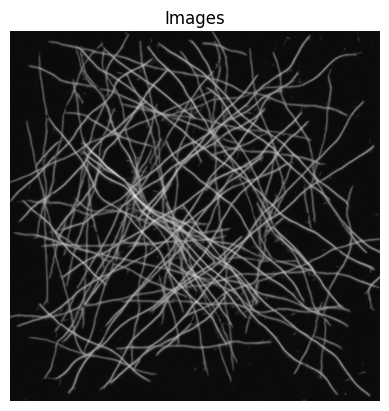

In [7]:
images_path = sn2nunet.images_path
tif_files = [f for f in os.listdir(images_path) if f.endswith('.tif')]
images_last = tifffile.imread(os.path.join(images_path, tif_files[-1]))

plt.imshow(np.squeeze(images_last), cmap='gray')
plt.title('Images')
plt.axis('off') 
plt.show()

## Display the loss curve during training.

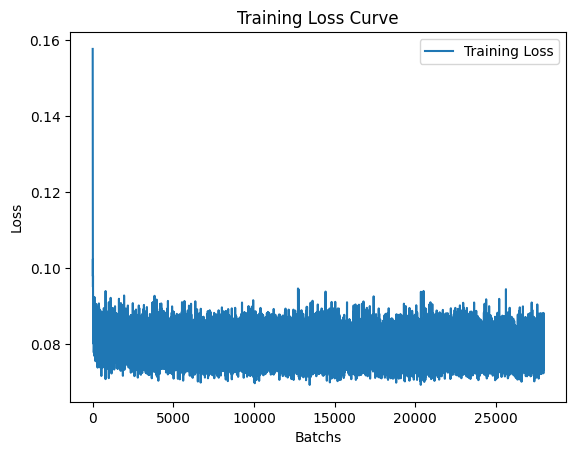

In [9]:
def plot_loss_curve(loss_history):
    plt.plot(loss_history, label='Training Loss')
    plt.title('Training Loss Curve')
    plt.xlabel('Batchs')
    plt.ylabel('Loss')
#     plt.axis('off') 
    plt.legend()
    plt.show()

parent_path = sn2nunet.parent_dir
tif_files = [f for f in os.listdir(parent_path) if f.endswith('loss.txt')]
file_path = os.path.join(parent_path, tif_files[0])
with open(file_path, 'r') as f:
    loss_history = [float(line.strip()) for line in f if line.strip()]
plot_loss_curve(loss_history)